### Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scikitplot.metrics import plot_roc_curve as prc
from scikitplot.metrics import plot_lift_curve as plc
from scikitplot.metrics import plot_cumulative_gain as pcg
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting background for visualizations
sns.set()

### Importing the dataset in python

In [4]:
demo_df = pd.read_csv("Demographic data.csv")
credit_df = pd.read_csv("Credit Bureau data.csv")

### Inspecting the dataset

#### 1. Demographic data

In [5]:
# Inspecting the head
demo_df.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession  Type of residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [6]:
# Inspecting the tail
demo_df.tail()

Application ID  Age Gender Marital Status (at the time of application)  \
71290       254036864   44      M                                     Married   
71291       375231276   24      M                                      Single   
71292        32481239   33      M                                     Married   
71293       704812159   52      M                                     Married   
71294        37493797   54      M                                     Married   

       No of dependents  Income     Education Profession  Type of residence  \
71290               3.0    15.0  Professional         SAL            Rented   
71291               1.0     4.5      Bachelor         SAL             Owned   
71292               4.0     6.0      Bachelor     SE_PROF            Rented   
71293               3.0     4.5      Bachelor          SE            Rented   
71294               3.0    42.0      Bachelor          SE            Rented   

       No of months in current residence  No of months in current company  \
71290                                  6                                3   
71291                                 20                                7   
71292                                 37                               25   
71293                                 76                               57   
71294                                 96                               29   

       Performance Tag  
71290              0.0  
71291              1.0  
71292              0.0  
71293              0.0  
71294              0.0

In [7]:
# Inspecting the shape
demo_df.shape

(71295, 12)

In [8]:
# Inspecting the data types
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [9]:
# Inspecting the numerical data in the dataset
demo_df.describe()

Application ID           Age  No of dependents        Income  \
count    7.129500e+04  71295.000000      71292.000000  71295.000000   
mean     4.989601e+08     44.943039          2.865188     27.195224   
std      2.885905e+08      9.939211          1.382319     15.514626   
min      1.004500e+05     -3.000000          1.000000     -0.500000   
25%      2.483719e+08     37.000000          2.000000     14.000000   
50%      4.975698e+08     45.000000          3.000000     27.000000   
75%      7.495868e+08     53.000000          4.000000     40.000000   
max      1.000084e+09     65.000000          5.000000     60.000000   

       No of months in current residence  No of months in current company  \
count                       71295.000000                     71295.000000   
mean                           34.563420                        33.958244   
std                            36.759758                        20.410824   
min                             6.000000                         3.000000   
25%                             6.000000                        16.000000   
50%                            11.000000                        34.000000   
75%                            60.000000                        51.000000   
max                           126.000000                       133.000000   

       Performance Tag  
count     69870.000000  
mean          0.042193  
std           0.201030  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

From the above, following data inconsistencies can be noted
    1. Min age < 0
    2. Min income < 0
The above needs to be addressed as part of data cleaning process

In [10]:
# Inspecting the column names
demo_df.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [11]:
# Removing trailing spaces from the column names 
demo_df.columns = demo_df.columns.str.strip()

In [12]:
# Reinspecting the column names
demo_df.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

#### 2. Credit bureau data

In [13]:
# Inspecting the head
credit_df.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

In [14]:
# Inspecting the tail
credit_df.tail()

Application ID  No of times 90 DPD or worse in last 6 months  \
71290       254036864                                             1   
71291       375231276                                             0   
71292        32481239                                             0   
71293       704812159                                             2   
71294        37493797                                             2   

       No of times 60 DPD or worse in last 6 months  \
71290                                             2   
71291                                             1   
71292                                             1   
71293                                             2   
71294                                             3   

       No of times 30 DPD or worse in last 6 months  \
71290                                             4   
71291                                             2   
71292                                             2   
71293                                             4   
71294                                             4   

       No of times 90 DPD or worse in last 12 months  \
71290                                              1   
71291                                              0   
71292                                              1   
71293                                              3   
71294                                              3   

       No of times 60 DPD or worse in last 12 months  \
71290                                              3   
71291                                              1   
71292                                              3   
71293                                              4   
71294                                              4   

       No of times 30 DPD or worse in last 12 months  \
71290                                              6   
71291                                              2   
71292                                              2   
71293                                              5   
71294                                              5   

       Avgas CC Utilization in last 12 months  \
71290                                     NaN   
71291                                     NaN   
71292                                     NaN   
71293                                    62.0   
71294                                    33.0   

       No of trades opened in last 6 months  \
71290                                   3.0   
71291                                   4.0   
71292                                   1.0   
71293                                   3.0   
71294                                   2.0   

       No of trades opened in last 12 months  \
71290                                      9   
71291                                     11   
71292                                      8   
71293                                     10   
71294                                      5   

       No of PL trades opened in last 6 months  \
71290                                        3   
71291                                        3   
71292                                        1   
71293                                        3   
71294                                        2   

       No of PL trades opened in last 12 months  \
71290                                         5   
71291                                         6   
71292                                         5   
71293                                         5   
71294                                         3   

       No of Inquiries in last 6 months (excluding home & auto loans)  \
71290                                                  4                
71291                                                  2                
71292                                                  2                
71293                                                  4                
71294                                                  3           

In [15]:
# Inspecting the shape
credit_df.shape

(71295, 19)

In [16]:
# Inspecting the data types
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [17]:
# Inspecting the numerical data in the dataset
credit_df.describe()

Application ID  No of times 90 DPD or worse in last 6 months  \
count    7.129500e+04                                  71295.000000   
mean     4.989601e+08                                      0.270313   
std      2.885905e+08                                      0.534166   
min      1.004500e+05                                      0.000000   
25%      2.483719e+08                                      0.000000   
50%      4.975698e+08                                      0.000000   
75%      7.495868e+08                                      0.000000   
max      1.000084e+09                                      3.000000   

       No of times 60 DPD or worse in last 6 months  \
count                                  71295.000000   
mean                                       0.430535   
std                                        0.825334   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        5.000000   

       No of times 30 DPD or worse in last 6 months  \
count                                  71295.000000   
mean                                       0.577207   
std                                        1.074436   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        7.000000   

       No of times 90 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.450340   
std                                         0.808387   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         5.000000   

       No of times 60 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.655488   
std                                         1.089535   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         7.000000   

       No of times 30 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.800912   
std                                         1.331940   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         9.000000   

       Avgas CC Utilization in last 12 months  \
count                            70237.000000   
mean                                29.696926   
std                                 29.533308   
min                                  0.000000   
25%                                  8.000000   
50%                                 15.000000   
75%                                 46.000000   
max                                113.000000   

       No of trades opened in last 6 months  \
count                          71294.000000   
mean                               2.298048   
std                                2.070191   
min                                0.000000   
25%                                1.000000   
50%                                2.000000   
75%                                3.000000   
max                               12.00000

In [18]:
# Inspecting the column names
credit_df.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

In [19]:
# Removing trailing spaces from the column names 
credit_df.columns = credit_df.columns.str.strip()

In [20]:
# Reinspecting the column names
credit_df.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

### Data cleaning

### 1. Demographic Data

#### Checking for dupticate records in the dataset

In [21]:
# Identifying duplicate records in 'Application Id' column
demo_df[demo_df['Application ID'].duplicated()]

Application ID  Age Gender Marital Status (at the time of application)  \
27586       765011468   38      M                                     Married   
42637       653287861   40      M                                     Married   
59022       671989187   57      M                                     Married   

       No of dependents  Income     Education Profession Type of residence  \
27586               4.0     4.5  Professional        SAL            Rented   
42637               5.0    32.0           Phd         SE            Rented   
59022               4.0     7.0  Professional         SE            Rented   

       No of months in current residence  No of months in current company  \
27586                                  6                               72   
42637                                 45                               46   
59022                                 42                                3   

       Performance Tag  
27586              0.0  
42637              1.0  
59022              0.0

In [22]:
# Creating a list of duplicate 'Application ID'
dup_id = demo_df[demo_df['Application ID'].duplicated()].loc[:,'Application ID'].tolist()

In [23]:
# Inspecting the dupicate id cases
demo_df[demo_df['Application ID'].isin(dup_id)].sort_values(by = 'Application ID')

Application ID  Age Gender Marital Status (at the time of application)  \
5243        653287861   26      M                                     Married   
42637       653287861   40      M                                     Married   
48602       671989187   27      M                                     Married   
59022       671989187   57      M                                     Married   
24386       765011468   57      M                                      Single   
27586       765011468   38      M                                     Married   

       No of dependents  Income     Education Profession    Type of residence  \
5243                3.0    25.0      Bachelor        SAL               Rented   
42637               5.0    32.0           Phd         SE               Rented   
48602               2.0    35.0  Professional        SAL  Living with Parents   
59022               4.0     7.0  Professional         SE               Rented   
24386               4.0     4.5      Bachelor        SAL     Company provided   
27586               4.0     4.5  Professional        SAL               Rented   

       No of months in current residence  No of months in current company  \
5243                                 112                               58   
42637                                 45                               46   
48602                                108                                7   
59022                                 42                                3   
24386                                  6                               56   
27586                                  6                               72   

       Performance Tag  
5243               0.0  
42637              1.0  
48602              0.0  
59022              0.0  
24386              0.0  
27586              0.0

In [24]:
# verifying if crdit bureu data also has these duplicate ids
credit_df[credit_df['Application ID'].isin(dup_id)].sort_values(by = 'Application ID')

Application ID  No of times 90 DPD or worse in last 6 months  \
5243        653287861                                             0   
42637       653287861                                             1   
48602       671989187                                             1   
59022       671989187                                             0   
24386       765011468                                             0   
27586       765011468                                             0   

       No of times 60 DPD or worse in last 6 months  \
5243                                              0   
42637                                             1   
48602                                             2   
59022                                             1   
24386                                             0   
27586                                             0   

       No of times 30 DPD or worse in last 6 months  \
5243                                              0   
42637                                             1   
48602                                             3   
59022                                             2   
24386                                             0   
27586                                             0   

       No of times 90 DPD or worse in last 12 months  \
5243                                               0   
42637                                              2   
48602                                              2   
59022                                              0   
24386                                              0   
27586                                              0   

       No of times 60 DPD or worse in last 12 months  \
5243                                               0   
42637                                              2   
48602                                              2   
59022                                              2   
24386                                              0   
27586                                              0   

       No of times 30 DPD or worse in last 12 months  \
5243                                               0   
42637                                              2   
48602                                              3   
59022                                              3   
24386                                              0   
27586                                              0   

       Avgas CC Utilization in last 12 months  \
5243                                     15.0   
42637                                   113.0   
48602                                    63.0   
59022                                    76.0   
24386                                    11.0   
27586                                    11.0   

       No of trades opened in last 6 months  \
5243                                    0.0   
42637                                   2.0   
48602                                   2.0   
59022                                   3.0   
24386                                   1.0   
27586                                   1.0   

       No of trades opened in last 12 months  \
5243                                       0   
42637                                      5   
48602                                      6   
59022                                      7   
24386                                      2   
27586                                      3   

       No of PL trades opened in last 6 months  \
5243                                         0   
42637                                        1   
48602                                        1   
59022                                        1   
24386                                        0   
27586                                        0   

       No of PL trades opened in last 12 months  \
5243                                          0   
42637                                         3   
48602                                      

Since there is not way to map these credit bureau data to demographic data for the cases with duplicate application ids, we will drop them from both data sets.

In [25]:
# Dropping duplicate application id instances
demo_df_clean = demo_df[~demo_df['Application ID'].isin(dup_id)].copy()
# Dropping duplicate application id instances
credit_df_clean = credit_df[~credit_df['Application ID'].isin(dup_id)].copy()

In [26]:
demo_df_clean.shape

(71289, 12)

In [27]:
credit_df_clean.shape

(71289, 19)

##### Addressing the data quality issues identified at the time of data inspection

In [28]:
# Inspecting records where age is less than or equal to 0
demo_df_clean[demo_df_clean['Age']<=0]

Application ID  Age Gender Marital Status (at the time of application)  \
9111        964427213    0      M                                     Married   
16315       634180637   -3      M                                     Married   
20752       590303560    0      M                                     Married   
29929       492869740    0      M                                      Single   
34548       932483616    0      M                                     Married   
35606       666398799    0      F                                     Married   
44090       790296430    0      M                                      Single   
50153       463622314    0      M                                     Married   
55558       441104387    0      M                                      Single   
55578       862922520    0    NaN                                     Married   
56153       380153306    0      M                                     Married   
62096       783195548    0      M                                     Married   
63966       331033631    0      M                                     Married   
65230       809393409    0      M                                      Single   
65458       325992471    0      M                                     Married   
66896       977872820    0      M                                     Married   
67602       915848904    0      M                                     Married   
68043       852875477    0      M                                         NaN   
68440       585528536    0      F                                     Married   
69026       848965588    0      F                                     Married   

       No of dependents  Income     Education Profession Type of residence  \
9111                3.0    19.0  Professional    SE_PROF            Rented   
16315               2.0    53.0       Masters    SE_PROF            Rented   
20752               4.0    31.0       Masters    SE_PROF            Rented   
29929               2.0    18.0       Masters    SE_PROF            Rented   
34548               2.0    42.0       Masters         SE            Rented   
35606               5.0    47.0      Bachelor    SE_PROF            Rented   
44090               4.0    43.0  Professional        SAL             Owned   
50153               3.0     7.0       Masters        SAL             Owned   
55558               2.0    26.0  Professional    SE_PROF            Rented   
55578               3.0    59.0      Bachelor         SE             Owned   
56153               4.0    41.0      Bachelor        SAL  Company provided   
62096               3.0    30.0           Phd    SE_PROF            Rented   
63966               5.0    37.0  Professional        SAL            Rented   
65230               1.0    34.0           Phd        SAL            Rented   
65458               1.0    36.0  Professional        SAL             Owned   
66896               2.0    45.0  Professional        SAL            Rented   
67602               2.0    15.0           Phd    SE_PROF            Rented   
68043               1.0     5.0           Phd        NaN             Owned   
68440               3.0    25.0      Bachelor        SAL             Owned   
69026               NaN    59.0       Masters        SAL            Rented   

       No of months in current residence  No of months in current company  \
9111                                   6                               41   
16315                                  6                               37   
20752                                  6                               47   
29929                                  6                               66   
34548                                  6                               64   
35606                                  6                               16   
44090                                 73                               10   
50153                                 90          

In [29]:
# inspecting the count of invalid entries in the Age column
len(demo_df_clean[demo_df_clean['Age']<=0])

20

In [30]:
invalid_age=demo_df_clean[demo_df_clean['Age']<=0]
application_id_age=invalid_age['Application ID'].tolist()
print("number of erroneous values {}".format((invalid_age.shape[0]/demo_df_clean.shape[0])*100))
print("No of Application id with age less than 0 are {} " .format(len(application_id_age)))

number of erroneous values 0.028054819116553747
No of Application id with age less than 0 are 20 


Since the count is small, these records can be deleted as these entries appear to be incorrect

In [31]:
# Filetring out invalid entries from age
demo_df_clean = demo_df_clean[~demo_df_clean['Application ID'].isin(application_id_age)]
credit_df_clean = credit_df_clean[~credit_df_clean['Application ID'].isin(application_id_age)]

In [32]:
demo_df_clean.shape

(71269, 12)

In [33]:
# inspecting records where income is less than or equal to 0
demo_df_clean[demo_df_clean['Income'] <= 0]

Application ID  Age Gender Marital Status (at the time of application)  \
964         450723469   34      M                                     Married   
1058         24806681   22      M                                      Single   
1222        729552057   40      M                                     Married   
1270        307736934   15      M                                     Married   
1278        805216817   32      M                                     Married   
1288        547253197   64      M                                     Married   
1343        373963488   48      M                                     Married   
1463         60246058   35      M                                     Married   
1565        861750337   52      M                                     Married   
1620        342846642   51      M                                     Married   
1731        671827529   41      M                                     Married   
1742        949700642   63      M                                      Single   
1755        445625202   46      F                                     Married   
1838        492426616   42      M                                      Single   
1864        856382859   34      M                                      Single   
1906         28529247   44      M                                     Married   
2001        376543424   35      M                                     Married   
2036        894546185   64      M                                     Married   
2043        281925114   32      M                                     Married   
2092        442521933   59      F                                     Married   
2126         72233026   65      M                                     Married   
2167        960040452   41      M                                     Married   
2223        129176358   45      M                                     Married   
2228        211825480   65      M                                     Married   
2246        730568473   41      M                                     Married   
2255        113089921   48      M                                     Married   
2381        909433618   54      M                                     Married   
2423        872069864   39      M                                     Married   
2528        220535428   42      F                                     Married   
2592        677808152   45      M                                      Single   
...               ...  ...    ...                                         ...   
4139        998321323   43      M                                     Married   
4205        472741744   38      F                                     Married   
4213        562002069   35      M                                      Single   
4232        167737137   42      M                                     Married   
4259        621161091   33      F                                     Married   
4272        456708069   20      M                                     Married   
4279        151708319   45      F                                     Married   
4313        180723350   49      M                                     Married   
4330        563817048   26      F                                     Married   
4355        113741159   31      F                                     Married   
4395        552549350   19      F                                     Married   
4418         98920562   43      M                                     Married   
4522        335154728   39      M                                     Married   
4533        395613862   53      M                                     Married   
4624        278797628   48      M                                     Married   
4642        226478216   32      M                                     Married   
4681        315581350   40      M                                     Married   
4684        182508594   37      M     

In [34]:
invalid_income=demo_df_clean[demo_df_clean['Income']<=0]
application_id_Income=invalid_income['Application ID'].tolist()
print("number of erroneous values {}".format((invalid_income.shape[0]/demo_df_clean.shape[0])*100))
print("No of Application id with income less than 0 are {} " .format(len(application_id_Income)))

number of erroneous values 0.15013540248916077
No of Application id with income less than 0 are 107 


In [35]:
# Inspecting thec count of invalid enteries in 'income' column
len(demo_df_clean[demo_df_clean['Income']<=0])

107

Since the count is small, these records can be deleted as these entries appear to be incorrect

In [36]:
# Filtering out invalid entries from 'income' colum
demo_df_clean = demo_df_clean[~demo_df_clean['Application ID'].isin(application_id_Income)]
credit_df_clean = credit_df_clean[~credit_df_clean['Application ID'].isin(application_id_Income)]

In [37]:
demo_df_clean.shape

(71162, 12)

In [38]:
credit_df_clean.shape

(71162, 19)

### Inspecting missing values

In [39]:
# Inspecting null values in the data set 
round(demo_df_clean.isnull().sum()/len(demo_df_clean)*100,2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

Since 'Performance tag' is the dependent variable which indicates the status of default, the same cannot be imputed and accordingly al the null values in 'Performance Tag' will have to be dropped

In [40]:
#Inspecting the count of null values in Performance tag
demo_df_clean['Performance Tag'].isnull().sum()

1425

In [41]:
credit_df_clean['Performance Tag'].isnull().sum()

1425

In [42]:
rejected_demo=demo_df_clean[demo_df_clean['Performance Tag'].isnull()]

In [43]:
rejected_credit=credit_df_clean[credit_df_clean['Performance Tag'].isnull()]

There are 1425 records with no performance tag in both datasets which indicates that the applicant is not given credit card.
Only 1.99 % of the obs has NA values for - 'perfromance tag'. 
Since Performance.Tag is the target variables, rows with NA's are removed and saved separately for future use.

In [44]:
# flitering out null values from performance tag
demo_df_clean = demo_df_clean[~(demo_df_clean['Performance Tag'].isnull())]
credit_df_clean=credit_df_clean[~(credit_df_clean['Performance Tag'].isnull())]

In [45]:
demo_df_clean.shape

(69737, 12)

In [46]:
# Reinspecting null values
round(demo_df_clean.isnull().sum()/len(demo_df_clean)*100,2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                0.00
dtype: float64

In [47]:
#Inspecting the count of missing values
demo_df_clean.isnull().sum()

Application ID                                   0
Age                                              0
Gender                                           1
Marital Status (at the time of application)      5
No of dependents                                 2
Income                                           0
Education                                      118
Profession                                      11
Type of residence                                8
No of months in current residence                0
No of months in current company                  0
Performance Tag                                  0
dtype: int64

In [48]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
demo_df_clean['target']=demo_df_clean['Performance Tag'].astype(np.int64)
demo_df_clean.target.replace([1,0], [0,1], inplace=True)
demo_df_clean.drop(["Performance Tag"], axis = 1, inplace = True) 

### Creating woe buckets for Demographic

In [49]:
from scorecardpy import woebin
from scorecardpy import woebin_ply

In [50]:
demo_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69737 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 69737 non-null int64
Age                                            69737 non-null int64
Gender                                         69736 non-null object
Marital Status (at the time of application)    69732 non-null object
No of dependents                               69735 non-null float64
Income                                         69737 non-null float64
Education                                      69619 non-null object
Profession                                     69726 non-null object
Type of residence                              69729 non-null object
No of months in current residence              69737 non-null int64
No of months in current company                69737 non-null int64
target                                         69737 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.9+ MB


In [51]:
##Converting No of dependents to String
demo_df_clean['No of dependents']=demo_df_clean['No of dependents'].astype(str)

In [52]:
##Binning Categorical Demographic Data
cat_demo_data = demo_df_clean.select_dtypes('object')
cat_demo_data['target'] = demo_df_clean['target']
cat_demo_data.nunique().sort_values(ascending=False)
cat_combine_demo_data_bin = woebin(cat_demo_data, y="target", stop_limit=0.01)

## 1. Gender

In [53]:
temp_gender = cat_combine_demo_data_bin['Gender']
temp_gender

variable      bin  count  count_distr  good    bad   badprob       woe  \
0   Gender  missing      1     0.000014     0      1  1.000000 -3.015808   
1   Gender        F  16481     0.236331   718  15763  0.956435 -0.032218   
2   Gender        M  53255     0.763655  2227  51028  0.958182  0.010550   

     bin_iv  total_iv   breaks  is_special_values  
0  0.000876   0.00121  missing               True  
1  0.000249   0.00121        F              False  
2  0.000085   0.00121        M              False

imputing the null value in gender column with the max count for that column i.e. M

In [54]:
# Imputing null value
demo_df_clean['Gender'].fillna('M', inplace = True)

## 2. Marital Status (at the time of application)

In [55]:
temp_marital_status = cat_combine_demo_data_bin['Marital Status (at the time of application)']
temp_marital_status

variable      bin  count  count_distr  \
0  Marital Status (at the time of application)  missing      5     0.000072   
1  Marital Status (at the time of application)   Single  10300     0.147698   
2  Marital Status (at the time of application)  Married  59432     0.852231   

   good    bad   badprob       woe    bin_iv  total_iv   breaks  \
0     0      5  1.000000 -1.406371  0.000324  0.000423  missing   
1   445   9855  0.956796 -0.023509  0.000083  0.000423   Single   
2  2500  56932  0.957935  0.004398  0.000016  0.000423  Married   

   is_special_values  
0               True  
1              False  
2              False

imputing the null values with Married

In [56]:
demo_df_clean['Marital Status (at the time of application)'].fillna('Married', inplace = True)

## 3. Education

In [57]:
temp_education = cat_combine_demo_data_bin['Education']
temp_education

variable                bin  count  count_distr  good    bad   badprob  \
0  Education            missing    118     0.001692     5    113  0.957627   
1  Education  Others%,%Bachelor  17400     0.249509   749  16651  0.956954   
2  Education            Masters  23443     0.336163   998  22445  0.957429   
3  Education       Professional  24321     0.348753  1010  23311  0.958472   
4  Education                Phd   4455     0.063883   183   4272  0.958923   

        woe        bin_iv  total_iv             breaks  is_special_values  
0 -0.003525  2.105410e-08  0.000283            missing               True  
1 -0.019988  1.006002e-04  0.000283  Others%,%Bachelor              False  
2 -0.008405  2.383734e-05  0.000283            Masters              False  
3  0.017501  1.059605e-04  0.000283       Professional              False  
4  0.028877  5.257115e-05  0.000283                Phd              False

Replacing Other with Bachelor as others as less than 5% observation and imputing null values with Masters

In [58]:
#Imputing null values
demo_df_clean['Education'].fillna('Masters', inplace = True)

In [59]:
#Replacing others with Bachelor
demo_df_clean['Education'].replace({'Others':'Bachelor'}, inplace = True)

# 4. Profession

In [60]:
temp_profession =cat_combine_demo_data_bin['Profession']
temp_profession

variable      bin  count  count_distr  good    bad   badprob       woe  \
0  Profession  missing     11     0.000158     0     11  1.000000 -0.617913   
1  Profession       SE  13904     0.199378   640  13264  0.953970 -0.089828   
2  Profession  SE_PROF  16225     0.232660   677  15548  0.958274  0.012847   
3  Profession      SAL  39597     0.567805  1628  37969  0.958886  0.028249   

     bin_iv  total_iv   breaks  is_special_values  
0  0.000087  0.002249  missing               True  
1  0.001677  0.002249       SE              False  
2  0.000038  0.002249  SE_PROF              False  
3  0.000447  0.002249      SAL              False

Imputing nullvalues with SAL as it has the highest non-event percenatage and null has only non-events

In [61]:
#Imputing missing values
demo_df_clean['Profession'].fillna('SAL', inplace = True)

# 5. Type of residence

In [62]:
temp_type_of_residence = cat_combine_demo_data_bin['Type of residence']
temp_type_of_residence

variable                                             bin  count  \
0  Type of residence                                         missing      8   
1  Type of residence  Company provided%,%Living with Parents%,%Owned  17341   
2  Type of residence                                 Rented%,%Others  52388   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv  \
0     0.000115     0      8  1.000000 -0.936367  0.000174   0.00028   
1     0.248663   745  16596  0.957038 -0.017636  0.000078   0.00028   
2     0.751222  2200  50188  0.958006  0.006150  0.000028   0.00028   

                                           breaks  is_special_values  
0                                         missing               True  
1  Company provided%,%Living with Parents%,%Owned              False  
2                                 Rented%,%Others              False

Combining 'company provided' and 'living with parents' with 'Owned' residence type
(as 'company provided' and 'living with parents' individully and combined together constitute less than 5%)

Combining 'Others' and 'null' with 'Rented'
(as 'Others' and 'null' individully and combined together constitute less than 5%)

In [63]:
# Replacing the values
demo_df_clean['Type of residence'].replace(['Company provided', 'Living with Parents'],'Owned', inplace = True)
demo_df_clean['Type of residence'].replace('Others', 'Rented', inplace = True)

In [64]:
# Imputing missing values
demo_df_clean['Type of residence'].fillna('Rented', inplace = True)

## 6. No of dependents

In [65]:
temp_no_of_dependents =cat_combine_demo_data_bin['No of dependents']
temp_no_of_dependents

variable        bin  count  count_distr  good    bad   badprob  \
0  No of dependents        3.0  15613     0.223884   695  14918  0.955486   
1  No of dependents        1.0  15195     0.217890   667  14528  0.956104   
2  No of dependents        5.0  11853     0.169967   501  11352  0.957732   
3  No of dependents        4.0  11974     0.171702   494  11480  0.958744   
4  No of dependents  2.0%,%nan  15102     0.216556   588  14514  0.961065   

        woe        bin_iv  total_iv     breaks  is_special_values  
0 -0.055063  6.961614e-04  0.002653        3.0              False  
1 -0.040431  3.628515e-04  0.002653        1.0              False  
2 -0.000931  1.475034e-07  0.002653        5.0              False  
3  0.024352  1.006925e-04  0.002653        4.0              False  
4  0.084668  1.493623e-03  0.002653  2.0%,%nan              False

Imputing null values with 2 as it has the highest no of non events

In [66]:
#imputing missing value
demo_df_clean['No of dependents'].fillna(2, inplace = True)

In [67]:
demo_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69737 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 69737 non-null int64
Age                                            69737 non-null int64
Gender                                         69737 non-null object
Marital Status (at the time of application)    69737 non-null object
No of dependents                               69737 non-null object
Income                                         69737 non-null float64
Education                                      69737 non-null object
Profession                                     69737 non-null object
Type of residence                              69737 non-null object
No of months in current residence              69737 non-null int64
No of months in current company                69737 non-null int64
target                                         69737 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.9+ MB


In [68]:
# Binning Numerical Demographic Data
num_demo_data = demo_df_clean.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
num_combine_demo_data_bin = woebin(num_demo_data, y="target", stop_limit=0.01)

Binning on 69737 rows and 6 columns in 00:00:14


# 7. Age

In [69]:
num_combine_demo_data_bin['Age']

variable          bin  count  count_distr  good    bad   badprob       woe  \
0      Age  [-inf,34.0)  10049     0.144099   413   9636  0.958901  0.028339   
1      Age  [34.0,42.0)  16801     0.240919   762  16039  0.954646 -0.074643   
2      Age  [42.0,44.0)   4715     0.067611   204   4511  0.956734 -0.025320   
3      Age  [44.0,46.0)   4506     0.064614   171   4335  0.962051  0.111339   
4      Age  [46.0,50.0)   9081     0.130218   398   8683  0.956172 -0.038804   
5      Age  [50.0,56.0)  13520     0.193871   503  13017  0.962796  0.131947   
6      Age  [56.0,61.0)   6248     0.089594   294   5954  0.952945 -0.113236   
7      Age   [61.0,inf)   4817     0.069074   200   4617  0.958480  0.017709   

     bin_iv  total_iv breaks  is_special_values  
0  0.000114  0.006919   34.0              False  
1  0.001389  0.006919   42.0              False  
2  0.000044  0.006919   44.0              False  
3  0.000761  0.006919   46.0              False  
4  0.000200  0.006919   50.0              False  
5  0.003179  0.006919   56.0              False  
6  0.001210  0.006919   61.0              False  
7  0.000021  0.006919    inf              False

## 8.Income

In [70]:
demo_df_clean['Income'].describe()

count    69737.000000
mean        27.450120
std         15.449159
min          1.000000
25%         14.000000
50%         27.000000
75%         40.000000
max         60.000000
Name: Income, dtype: float64

In [71]:
temp_income=num_combine_demo_data_bin['Income']
temp_income

variable          bin  count  count_distr  good    bad   badprob       woe  \
0   Income   [-inf,9.0)  10104     0.144887   585   9519  0.942102 -0.332041   
1   Income   [9.0,24.0)  20141     0.288814   926  19215  0.954024 -0.088902   
2   Income  [24.0,32.0)  10848     0.155556   471  10377  0.956582 -0.028985   
3   Income  [32.0,39.0)   9506     0.136312   345   9161  0.963707  0.157692   
4   Income  [39.0,45.0)   7937     0.113813   251   7686  0.968376  0.300228   
5   Income  [45.0,50.0)   4739     0.067955   179   4560  0.962228  0.116218   
6   Income   [50.0,inf)   6462     0.092662   188   6274  0.970907  0.386253   

     bin_iv  total_iv breaks  is_special_values  
0  0.018636  0.045757    9.0              False  
1  0.002378  0.045757   24.0              False  
2  0.000132  0.045757   32.0              False  
3  0.003155  0.045757   39.0              False  
4  0.008960  0.045757   45.0              False  
5  0.000871  0.045757   50.0              False  
6  0.011625  0.045757    inf              False

# 9.No of months in current residence

In [72]:
demo_df_clean['No of months in current residence'].describe()

count    69737.000000
mean        34.515351
std         36.789319
min          6.000000
25%          6.000000
50%         10.000000
75%         60.000000
max        126.000000
Name: No of months in current residence, dtype: float64

In [73]:
num_combine_demo_data_bin['No of months in current residence']

variable          bin  count  count_distr  good  \
0  No of months in current residence   [-inf,8.0)  33933     0.486585  1070   
1  No of months in current residence   [8.0,34.0)   9456     0.135595   642   
2  No of months in current residence  [34.0,56.0)   7366     0.105625   405   
3  No of months in current residence  [56.0,76.0)   5868     0.084145   257   
4  No of months in current residence  [76.0,92.0)   4420     0.063381   224   
5  No of months in current residence   [92.0,inf)   8694     0.124668   347   

     bad   badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  32863  0.968467  0.303214  0.039021  0.094518    8.0              False  
1   8814  0.932107 -0.501966  0.043187  0.094518   34.0              False  
2   6961  0.945018 -0.277283  0.009234  0.094518   56.0              False  
3   5611  0.956203 -0.038066  0.000124  0.094518   76.0              False  
4   4196  0.949321 -0.191234  0.002532  0.094518   92.0              False  
5   8347  0.960087  0.058858  0.000420  0.094518    inf              False

## 10.No of months in current company

In [74]:
demo_df_clean.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'target'],
      dtype='object')

In [75]:
demo_df_clean['No of months in current company'].describe()

count    69737.000000
mean        34.185411
std         20.355813
min          3.000000
25%         16.000000
50%         34.000000
75%         51.000000
max        133.000000
Name: No of months in current company, dtype: float64

In [76]:
num_combine_demo_data_bin['No of months in current company']

variable          bin  count  count_distr  good  \
0  No of months in current company   [-inf,4.0)   4747     0.068070   182   
1  No of months in current company    [4.0,8.0)   3886     0.055724   231   
2  No of months in current company   [8.0,22.0)  13691     0.196323   695   
3  No of months in current company  [22.0,38.0)  16105     0.230939   667   
4  No of months in current company  [38.0,50.0)  12354     0.177151   469   
5  No of months in current company  [50.0,54.0)   4129     0.059208   118   
6  No of months in current company  [54.0,64.0)   9178     0.131609   322   
7  No of months in current company   [64.0,inf)   5647     0.080976   261   

     bad   badprob       woe    bin_iv  total_iv breaks  is_special_values  
0   4565  0.961660  0.100693  0.000659  0.032684    4.0              False  
1   3655  0.940556 -0.360041  0.008539  0.032684    8.0              False  
2  12996  0.949237 -0.192989  0.007993  0.032684   22.0              False  
3  15438  0.958584  0.020323  0.000094  0.032684   38.0              False  
4  11885  0.962037  0.110955  0.002073  0.032684   50.0              False  
5   4011  0.971422  0.404637  0.008086  0.032684   54.0              False  
6   8856  0.964916  0.192824  0.004484  0.032684   64.0              False  
7   5386  0.953781 -0.094437  0.000754  0.032684    inf              False

In [77]:
cat_demo_data = demo_df_clean.select_dtypes('object')
cat_demo_data['target'] = demo_df_clean['target']
cat_demo_data.nunique().sort_values(ascending=False)
cat_combine_demo_data_bin = woebin(cat_demo_data, y="target", stop_limit=0.01)

In [78]:
# Binning Numerical Demographic Data
num_demo_data = demo_df_clean.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
num_demo_data=num_demo_data.drop(['Application ID'], axis=1)
num_combine_demo_data_bin = woebin(num_demo_data, y="target", stop_limit=0.01)

Binning on 69737 rows and 5 columns in 00:00:11


In [79]:
num_demo_data_woe = woebin_ply(num_demo_data, num_combine_demo_data_bin)
cat_demo_data_woe = woebin_ply(cat_demo_data, cat_combine_demo_data_bin)

In [80]:
demo_data_woe=pd.merge(left=num_demo_data_woe, right=cat_demo_data_woe.drop(columns='target'),
                     left_index=True, right_index=True)

In [81]:
demo_data_woe.head()

target  No of months in current residence_woe  \
0       1                               0.058858   
1       1                               0.058858   
2       1                               0.058858   
3       1                               0.058858   
4       1                               0.058858   

   No of months in current company_woe  Income_woe   Age_woe  Education_woe  \
0                             0.192824    0.300228 -0.038804      -0.019988   
1                             0.110955    0.386253  0.028339       0.017501   
2                             0.110955    0.116218  0.028339      -0.019988   
3                             0.404637    0.386253 -0.025320      -0.019988   
4                             0.110955    0.300228 -0.074643       0.017501   

   Type of residence_woe  Marital Status (at the time of application)_woe  \
0               0.006003                                         0.004180   
1               0.006003                                         0.004180   
2               0.006003                                        -0.023815   
3               0.006003                                         0.004180   
4               0.006003                                         0.004180   

   No of dependents_woe  Profession_woe  Gender_woe  
0              0.084668        0.028233   -0.032523  
1              0.024352        0.012542    0.010264  
2              0.084668        0.012542    0.010264  
3             -0.040431       -0.090134    0.010264  
4             -0.000931        0.028233   -0.032523

In [82]:
all_demo_combine_bin = dict(cat_combine_demo_data_bin, **num_combine_demo_data_bin)

In [83]:
del_by_iv = []
iv_list = {}
for feature, df in all_demo_combine_bin.items():
    iv = df['total_iv'].iloc[0]
    iv_list[feature + '_woe'] = iv
df_iv_list=pd.DataFrame(list(iv_list.items()),columns = ['Variable', 'IV'])
print("Demographics IV")
df_iv_list.sort_values(by='IV', ascending=False)

Demographics IV


Variable        IV
6            No of months in current residence_woe  0.094518
8                                       Income_woe  0.045757
7              No of months in current company_woe  0.032684
9                                          Age_woe  0.006919
3                             No of dependents_woe  0.002653
4                                   Profession_woe  0.002172
5                                       Gender_woe  0.000334
0                                    Education_woe  0.000283
1                            Type of residence_woe  0.000108
2  Marital Status (at the time of application)_woe  0.000100

In [84]:
demo_df_clean.isnull().sum()

Application ID                                 0
Age                                            0
Gender                                         0
Marital Status (at the time of application)    0
No of dependents                               0
Income                                         0
Education                                      0
Profession                                     0
Type of residence                              0
No of months in current residence              0
No of months in current company                0
target                                         0
dtype: int64

In [85]:
print(demo_df_clean.shape)
print(credit_df_clean.shape)

(69737, 12)
(69737, 19)


## 2. Credit Bureau data

In [86]:
credit_df_clean.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1021
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [87]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
credit_df_clean['target']=credit_df_clean['Performance Tag'].astype(np.int64)
credit_df_clean.target.replace([1,0], [0,1], inplace=True)
credit_df_clean.drop(["Performance Tag"], axis = 1, inplace = True) 

In [88]:
credit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69737 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     69737 non-null int64
No of times 90 DPD or worse in last 6 months                       69737 non-null int64
No of times 60 DPD or worse in last 6 months                       69737 non-null int64
No of times 30 DPD or worse in last 6 months                       69737 non-null int64
No of times 90 DPD or worse in last 12 months                      69737 non-null int64
No of times 60 DPD or worse in last 12 months                      69737 non-null int64
No of times 30 DPD or worse in last 12 months                      69737 non-null int64
Avgas CC Utilization in last 12 months                             68716 non-null float64
No of trades opened in last 6 months                               69736 non-null float64
No of trades opened in last 12 months                              69737 non-null int64
No of P

In [89]:
print(demo_df_clean.shape)
print(credit_df_clean.shape)

(69737, 12)
(69737, 19)


### WOE and IV of Credit Beaureu Data

In [90]:
# Binning Numerical Demographic Data
num_data_credit = credit_df_clean.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
num_combine_credit_data_bin = woebin(num_data_credit, y="target", stop_limit=0.01)

## 1. No of times 90 DPD or worse in last 6 months

In [91]:
credit_df_clean['No of times 90 DPD or worse in last 6 months'].value_counts()

0    54544
1    13211
2     1774
3      208
Name: No of times 90 DPD or worse in last 6 months, dtype: int64

In [92]:
temp_90DPD_or_more_6m=num_combine_credit_data_bin['No of times 90 DPD or worse in last 6 months']
temp_90DPD_or_more_6m

variable         bin  count  \
0  No of times 90 DPD or worse in last 6 months  [-inf,1.0)  54544   
1  No of times 90 DPD or worse in last 6 months   [1.0,inf)  15193   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  \
0     0.782139  1792  52752  0.967146  0.260795  0.047284  0.160044    1.0   
1     0.217861  1153  14040  0.924110 -0.621931  0.112760  0.160044    inf   

   is_special_values  
0              False  
1              False

## 2. No of times 60 DPD or worse in last 6 months

In [93]:
credit_df_clean['No of times 60 DPD or worse in last 6 months'].value_counts()

0    51752
1    11124
2     4913
3     1468
4      410
5       70
Name: No of times 60 DPD or worse in last 6 months, dtype: int64

In [94]:
temp_60DPD_or_more_6m = num_combine_credit_data_bin['No of times 60 DPD or worse in last 6 months']
temp_60DPD_or_more_6m

variable         bin  count  \
0  No of times 60 DPD or worse in last 6 months  [-inf,1.0)  51752   
1  No of times 60 DPD or worse in last 6 months   [1.0,2.0)  11124   
2  No of times 60 DPD or worse in last 6 months   [2.0,inf)   6861   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  \
0     0.742102  1580  50172  0.969470  0.336558  0.072247   0.20928    1.0   
1     0.159514   783  10341  0.929612 -0.540735  0.060049   0.20928    2.0   
2     0.098384   582   6279  0.915173 -0.742979  0.076984   0.20928    inf   

   is_special_values  
0              False  
1              False  
2              False

## 3. No of times 30 DPD or worse in last 6 months

In [95]:
credit_df_clean['No of times 30 DPD or worse in last 6 months'].value_counts()

0    49982
1     9493
2     5895
3     2828
4     1044
5      384
6       96
7       15
Name: No of times 30 DPD or worse in last 6 months, dtype: int64

In [96]:
temp_30DPD_or_more_6m = num_combine_credit_data_bin['No of times 30 DPD or worse in last 6 months']
temp_30DPD_or_more_6m

variable         bin  count  \
0  No of times 30 DPD or worse in last 6 months  [-inf,1.0)  49982   
1  No of times 30 DPD or worse in last 6 months   [1.0,2.0)   9493   
2  No of times 30 DPD or worse in last 6 months   [2.0,3.0)   5895   
3  No of times 30 DPD or worse in last 6 months   [3.0,inf)   4367   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  \
0     0.716721  1453  48529  0.970930  0.387057  0.090258   0.24313    1.0   
1     0.136126   622   8871  0.934478 -0.463872  0.036363   0.24313    2.0   
2     0.084532   466   5429  0.920950 -0.666150  0.051262   0.24313    3.0   
3     0.062621   404   3963  0.907488 -0.838133  0.065247   0.24313    inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False

## 4.No of times 90 DPD or worse in last 12 months 

In [97]:
credit_df_clean['No of times 90 DPD or worse in last 12 months'].value_counts()

0    50373
1    11660
2     6154
3     1243
4      271
5       36
Name: No of times 90 DPD or worse in last 12 months, dtype: int64

In [98]:
temp_90DPD_or_more_12m = num_combine_credit_data_bin['No of times 90 DPD or worse in last 12 months']
temp_90DPD_or_more_12m

variable         bin  count  \
0  No of times 90 DPD or worse in last 12 months  [-inf,1.0)  50373   
1  No of times 90 DPD or worse in last 12 months   [1.0,2.0)  11660   
2  No of times 90 DPD or worse in last 12 months   [2.0,inf)   7704   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  \
0     0.722328  1508  48865  0.970063  0.356803  0.078334  0.213784    1.0   
1     0.167200   796  10864  0.931732 -0.507864  0.054664  0.213784    2.0   
2     0.110472   641   7063  0.916796 -0.721879  0.080786  0.213784    inf   

   is_special_values  
0              False  
1              False  
2              False

## 5.No of times 60 DPD or worse in last 12 months 

In [99]:
credit_df_clean['No of times 60 DPD or worse in last 12 months'].value_counts()

0    45752
1    12809
2     6412
3     3203
4     1045
5      398
6      111
7        7
Name: No of times 60 DPD or worse in last 12 months, dtype: int64

In [100]:
temp_60DPD_or_more_12m = num_combine_credit_data_bin['No of times 60 DPD or worse in last 12 months']
temp_60DPD_or_more_12m

variable         bin  count  \
0  No of times 60 DPD or worse in last 12 months  [-inf,1.0)  45752   
1  No of times 60 DPD or worse in last 12 months   [1.0,2.0)  12809   
2  No of times 60 DPD or worse in last 12 months   [2.0,3.0)   6412   
3  No of times 60 DPD or worse in last 12 months   [3.0,inf)   4764   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  \
0     0.656065  1376  44376  0.969925  0.352044  0.069408  0.187297    1.0   
1     0.183676   663  12146  0.948240 -0.213494  0.009240  0.187297    2.0   
2     0.091945   482   5930  0.924828 -0.611639  0.045802  0.187297    3.0   
3     0.068314   424   4340  0.910999 -0.795578  0.062847  0.187297    inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False

## 6.No of times 30 DPD or worse in last 12 months 

In [101]:
credit_df_clean['No of times 30 DPD or worse in last 12 months'].value_counts()

0    44743
1    11467
2     6113
3     4134
4     1922
5      852
6      375
7      107
8       23
9        1
Name: No of times 30 DPD or worse in last 12 months, dtype: int64

In [102]:
temp_30DPD_or_more_12m = num_combine_credit_data_bin['No of times 30 DPD or worse in last 12 months']
temp_30DPD_or_more_12m

variable         bin  count  \
0  No of times 30 DPD or worse in last 12 months  [-inf,1.0)  44743   
1  No of times 30 DPD or worse in last 12 months   [1.0,2.0)  11467   
2  No of times 30 DPD or worse in last 12 months   [2.0,3.0)   6113   
3  No of times 30 DPD or worse in last 12 months   [3.0,inf)   7414   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  \
0     0.641596  1314  43429  0.970632  0.376577  0.076834  0.216964    1.0   
1     0.164432   518  10949  0.954827 -0.070446  0.000843  0.216964    2.0   
2     0.087658   451   5662  0.926223 -0.591409  0.040435  0.216964    3.0   
3     0.106314   662   6752  0.910709 -0.799146  0.098853  0.216964    inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False

## 7.Avgas CC Utilization in last 12 months  

In [103]:
credit_df_clean['Avgas CC Utilization in last 12 months'].describe()

count    68716.000000
mean        29.294953
std         29.525918
min          0.000000
25%          8.000000
50%         15.000000
75%         45.000000
max        113.000000
Name: Avgas CC Utilization in last 12 months, dtype: float64

In [104]:
temp_avgas_utili_12m = num_combine_credit_data_bin['Avgas CC Utilization in last 12 months']
temp_avgas_utili_12m

variable          bin  count  count_distr  \
0  Avgas CC Utilization in last 12 months      missing   1021     0.014641   
1  Avgas CC Utilization in last 12 months  [-inf,10.0)  21265     0.304931   
2  Avgas CC Utilization in last 12 months  [10.0,16.0)  14179     0.203321   
3  Avgas CC Utilization in last 12 months  [16.0,24.0)   6525     0.093566   
4  Avgas CC Utilization in last 12 months  [24.0,68.0)  18618     0.266974   
5  Avgas CC Utilization in last 12 months  [68.0,94.0)   4187     0.060040   
6  Avgas CC Utilization in last 12 months   [94.0,inf)   3942     0.056527   

   good    bad   badprob       woe    bin_iv  total_iv   breaks  \
0    48    973  0.952987 -0.112291  0.000194  0.320847  missing   
1   414  20851  0.980531  0.797817  0.136906  0.320847     10.0   
2   359  13820  0.974681  0.529075  0.044976  0.320847     16.0   
3   291   6234  0.955402 -0.057024  0.000312  0.320847     24.0   
4  1314  17304  0.929423 -0.543613  0.101714  0.320847     68.0   
5   329   3858  0.921423 -0.659628  0.035589  0.320847     94.0   
6   190   3752  0.951801 -0.138454  0.001155  0.320847      inf   

   is_special_values  
0               True  
1              False  
2              False  
3              False  
4              False  
5              False  
6              False

In [105]:
# Imputing missing values
credit_df_clean['Avgas CC Utilization in last 12 months'].fillna(-0.111429, inplace = True)

## 8.No of trades opened in last 6 months   

In [106]:
credit_df_clean['No of trades opened in last 6 months'].describe()

count    69736.000000
mean         2.287585
std          2.082522
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: No of trades opened in last 6 months, dtype: float64

In [107]:
temp_trade_opened_6m = num_combine_credit_data_bin['No of trades opened in last 6 months']
temp_trade_opened_6m

variable         bin  count  count_distr  good  \
0  No of trades opened in last 6 months     missing      1     0.000014     0   
1  No of trades opened in last 6 months  [-inf,1.0)  12149     0.174212   270   
2  No of trades opened in last 6 months   [1.0,2.0)  20056     0.287595   534   
3  No of trades opened in last 6 months   [2.0,3.0)  12106     0.173595   638   
4  No of trades opened in last 6 months   [3.0,5.0)  15692     0.225017  1035   
5  No of trades opened in last 6 months   [5.0,6.0)   3663     0.052526   212   
6  No of trades opened in last 6 months   [6.0,inf)   6070     0.087041   256   

     bad   badprob       woe        bin_iv  total_iv   breaks  \
0      1  1.000000 -3.015808  8.762054e-04  0.190274  missing   
1  11879  0.977776  0.662937  5.714369e-02  0.190274      1.0   
2  19522  0.973375  0.477733  5.303387e-02  0.190274      2.0   
3  11468  0.947299 -0.232191  1.041958e-02  0.190274      3.0   
4  14657  0.934043 -0.470652  6.207589e-02  0.190274      5.0   
5   3451  0.942124 -0.331336  6.724979e-03  0.190274      6.0   
6   5814  0.957825  0.001678  2.448011e-07  0.190274      inf   

   is_special_values  
0               True  
1              False  
2              False  
3              False  
4              False  
5              False  
6              False

In [108]:
# Imputing missing values
credit_df_clean['No of trades opened in last 6 months'].fillna(-3.016999, inplace = True)

## 9.No of trades opened in last 12 months   

In [109]:
credit_df_clean['No of trades opened in last 12 months'].describe()

count    69737.000000
mean         5.791474
std          5.096611
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         28.000000
Name: No of trades opened in last 12 months, dtype: float64

In [110]:
temp_trade_opened_12m = num_combine_credit_data_bin['No of trades opened in last 12 months']
temp_trade_opened_12m

variable         bin  count  count_distr  \
0  No of trades opened in last 12 months  [-inf,1.0)   4939     0.070823   
1  No of trades opened in last 12 months   [1.0,2.0)  11328     0.162439   
2  No of trades opened in last 12 months   [2.0,3.0)   9281     0.133086   
3  No of trades opened in last 12 months   [3.0,6.0)  14069     0.201744   
4  No of trades opened in last 12 months  [6.0,14.0)  23528     0.337382   
5  No of trades opened in last 12 months  [14.0,inf)   6592     0.094527   

   good    bad   badprob       woe    bin_iv  total_iv breaks  \
0   111   4828  0.977526  0.651183  0.022526   0.29707    1.0   
1   176  11152  0.984463  1.027416  0.110143   0.29707    2.0   
2   178   9103  0.980821  0.813101  0.061672   0.29707    3.0   
3   638  13431  0.954652 -0.074492  0.001158   0.29707    6.0   
4  1578  21950  0.932931 -0.488866  0.101289   0.29707   14.0   
5   264   6328  0.959951  0.055316  0.000282   0.29707    inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False  
4              False  
5              False

## 10.No of PL trades opened in last 6 months     

In [111]:
credit_df_clean['No of PL trades opened in last 6 months'].describe()

count    69737.000000
mean         1.191290
std          1.352994
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: No of PL trades opened in last 6 months, dtype: float64

In [112]:
temp_pl_trade_opened_6m = num_combine_credit_data_bin['No of PL trades opened in last 6 months']
temp_pl_trade_opened_6m

variable         bin  count  count_distr  \
0  No of PL trades opened in last 6 months  [-inf,1.0)  30969     0.444083   
1  No of PL trades opened in last 6 months   [1.0,2.0)  13539     0.194144   
2  No of PL trades opened in last 6 months   [2.0,4.0)  20503     0.294005   
3  No of PL trades opened in last 6 months   [4.0,inf)   4726     0.067769   

   good    bad   badprob       woe    bin_iv  total_iv breaks  \
0   697  30272  0.977494  0.649719  0.140700  0.220931    1.0   
1   691  12848  0.948962 -0.198671  0.008399  0.220931    2.0   
2  1304  19199  0.936400 -0.432053  0.067115  0.220931    4.0   
3   253   4473  0.946466 -0.249049  0.004717  0.220931    inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False

## 11.No of PL trades opened in last 12 months     

In [113]:
credit_df_clean['No of PL trades opened in last 12 months'].describe()

count    69737.000000
mean         2.366563
std          2.423762
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         12.000000
Name: No of PL trades opened in last 12 months, dtype: float64

In [114]:
temp_pl_trade_opened_12m = num_combine_credit_data_bin['No of PL trades opened in last 12 months']
temp_pl_trade_opened_12m

variable         bin  count  count_distr  \
0  No of PL trades opened in last 12 months  [-inf,1.0)  25717     0.368771   
1  No of PL trades opened in last 12 months   [1.0,2.0)   6638     0.095186   
2  No of PL trades opened in last 12 months   [2.0,3.0)   6828     0.097911   
3  No of PL trades opened in last 12 months   [3.0,6.0)  22209     0.318468   
4  No of PL trades opened in last 12 months   [6.0,7.0)   4019     0.057631   
5  No of PL trades opened in last 12 months   [7.0,inf)   4326     0.062033   

   good    bad   badprob       woe    bin_iv  total_iv breaks  \
0   455  25262  0.982307  0.895285  0.200293  0.297757    1.0   
1   247   6391  0.962790  0.131783  0.001557  0.297757    2.0   
2   366   6462  0.946397 -0.250414  0.006894  0.297757    3.0   
3  1433  20776  0.935477 -0.447446  0.078541  0.297757    6.0   
4   243   3776  0.939537 -0.378115  0.009823  0.297757    7.0   
5   201   4125  0.953537 -0.099958  0.000649  0.297757    inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False  
4              False  
5              False

## 12.No of Inquiries in last 6 months (excluding home & auto loans) 

In [115]:
credit_df_clean['No of Inquiries in last 6 months (excluding home & auto loans)'].describe()

count    69737.000000
mean         1.760414
std          1.985525
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: float64

In [116]:
temp_inquiries_last_6m = num_combine_credit_data_bin['No of Inquiries in last 6 months (excluding home & auto loans)']
temp_inquiries_last_6m

variable         bin  count  \
0  No of Inquiries in last 6 months (excluding ho...  [-inf,1.0)  24962   
1  No of Inquiries in last 6 months (excluding ho...   [1.0,2.0)  13172   
2  No of Inquiries in last 6 months (excluding ho...   [2.0,3.0)  12823   
3  No of Inquiries in last 6 months (excluding ho...   [3.0,4.0)   7248   
4  No of Inquiries in last 6 months (excluding ho...   [4.0,6.0)   7266   
5  No of Inquiries in last 6 months (excluding ho...   [6.0,inf)   4266   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  \
0     0.357945   525  24437  0.978968  0.718981  0.134880  0.205999    1.0   
1     0.188881   658  12514  0.950046 -0.176076  0.006351  0.205999    2.0   
2     0.183877   665  12158  0.948140 -0.215519  0.009435  0.205999    3.0   
3     0.103933   517   6731  0.928670 -0.555038  0.041504  0.205999    4.0   
4     0.104191   419   6847  0.942334 -0.327780  0.013033  0.205999    6.0   
5     0.061173   161   4105  0.962260  0.117082  0.000795  0.205999    inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False  
4              False  
5              False

## 13.No of Inquiries in last 12 months (excluding home & auto loans) 

In [117]:
credit_df_clean['No of Inquiries in last 12 months (excluding home & auto loans)'].describe()

count    69737.000000
mean         3.530034
std          3.612265
min          0.000000
25%          0.000000
50%          3.000000
75%          5.000000
max         20.000000
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: float64

In [118]:
temp_inquiries_last_6m = num_combine_credit_data_bin['No of Inquiries in last 12 months (excluding home & auto loans)']
temp_inquiries_last_6m

variable         bin  count  \
0  No of Inquiries in last 12 months (excluding h...  [-inf,1.0)  20476   
1  No of Inquiries in last 12 months (excluding h...   [1.0,2.0)   3898   
2  No of Inquiries in last 12 months (excluding h...   [2.0,4.0)  16875   
3  No of Inquiries in last 12 months (excluding h...   [4.0,5.0)   7108   
4  No of Inquiries in last 12 months (excluding h...   [5.0,9.0)  13870   
5  No of Inquiries in last 12 months (excluding h...   [9.0,inf)   7510   

   count_distr  good    bad   badprob       woe    bin_iv  total_iv breaks  \
0     0.293617   305  20171  0.985105  1.070215  0.212365  0.294731    1.0   
1     0.055896   155   3743  0.960236  0.062743  0.000214  0.294731    2.0   
2     0.241981   825  16050  0.951111 -0.153394  0.006111  0.294731    4.0   
3     0.101926   380   6728  0.946539 -0.247613  0.007008  0.294731    5.0   
4     0.198890   959  12911  0.930858 -0.521531  0.069017  0.294731    9.0   
5     0.107690   321   7189  0.957257 -0.012608  0.000017  0.294731    inf   

   is_special_values  
0              False  
1              False  
2              False  
3              False  
4              False  
5              False

## 14.Presence of open home loan    

In [119]:
credit_df_clean['Presence of open home loan'].describe()

count    69465.000000
mean         0.259296
std          0.438251
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Presence of open home loan, dtype: float64

In [120]:
temp_open_home_loan = num_combine_credit_data_bin['Presence of open home loan']
temp_open_home_loan

variable         bin  count  count_distr  good    bad  \
0  Presence of open home loan     missing    272       0.0039     8    264   
1  Presence of open home loan  [-inf,inf)  69465       0.9961  2937  66528   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.970588  0.375033  0.000464  0.000465  missing               True  
1  0.957720 -0.001240  0.000002  0.000465      inf              False

In [121]:
# Imputing missing values
credit_df_clean['Presence of open home loan'].fillna(1, inplace = True)

## 15.Outstanding Balance       

In [122]:
credit_df_clean['Outstanding Balance'].describe()

count    6.946500e+04
mean     1.252855e+06
std      1.285830e+06
min      0.000000e+00
25%      2.086150e+05
50%      7.741880e+05
75%      2.925498e+06
max      5.218801e+06
Name: Outstanding Balance, dtype: float64

In [123]:
temp_outstanding_bal = num_combine_credit_data_bin['Outstanding Balance']
temp_outstanding_bal

variable                    bin  count  count_distr  good  \
0  Outstanding Balance                missing    272     0.003900     8   
1  Outstanding Balance        [-inf,200000.0)  16172     0.231900   321   
2  Outstanding Balance    [200000.0,400000.0)   5657     0.081119   241   
3  Outstanding Balance    [400000.0,600000.0)   7119     0.102084   395   
4  Outstanding Balance   [600000.0,1500000.0)  20748     0.297518  1301   
5  Outstanding Balance  [1500000.0,3200000.0)  12055     0.172864   260   
6  Outstanding Balance        [3200000.0,inf)   7714     0.110616   419   

     bad   badprob       woe    bin_iv  total_iv     breaks  is_special_values  
0    264  0.970588  0.375033  0.000464  0.242664    missing               True  
1  15851  0.980151  0.778072  0.099843  0.242664   200000.0              False  
2   5416  0.957398 -0.009159  0.000007  0.242664   400000.0              False  
3   6724  0.944515 -0.286922  0.009599  0.242664   600000.0              False  
4  19447  0.937295 -0.416915  0.062791  0.242664  1500000.0              False  
5  11795  0.978432  0.693275  0.061222  0.242664  3200000.0              False  
6   7295  0.945683 -0.264401  0.008740  0.242664        inf              False

In [124]:
# Imputing missing values
credit_df_clean['Outstanding Balance'].fillna(0.000460, inplace = True)

## 16.Total No of Trades  

In [125]:
credit_df_clean['Total No of Trades'].describe()

count    69737.000000
mean         8.183059
std          7.155898
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         44.000000
Name: Total No of Trades, dtype: float64

In [126]:
temp_total_no_of_trade = num_combine_credit_data_bin['Total No of Trades']
temp_total_no_of_trade

variable         bin  count  count_distr  good    bad   badprob  \
0  Total No of Trades  [-inf,3.0)  10631     0.152444   191  10440  0.982034   
1  Total No of Trades   [3.0,4.0)   8581     0.123048   183   8398  0.978674   
2  Total No of Trades   [4.0,5.0)   7469     0.107102   205   7264  0.972553   
3  Total No of Trades   [5.0,6.0)   5708     0.081850   230   5478  0.959706   
4  Total No of Trades   [6.0,8.0)   9790     0.140385   507   9283  0.948212   
5  Total No of Trades  [8.0,16.0)  18319     0.262687  1275  17044  0.930400   
6  Total No of Trades  [16.0,inf)   9239     0.132483   354   8885  0.961684   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.879652  0.080445   0.24529    3.0              False  
1  0.704788  0.044821   0.24529    4.0              False  
2  0.446201  0.017467   0.24529    5.0              False  
3  0.048942  0.000192   0.24529    6.0              False  
4 -0.214045  0.007100   0.24529    8.0              False  
5 -0.528622  0.093966   0.24529   16.0              False  
6  0.101348  0.001299   0.24529    inf              False

## 17.Presence of open auto loan 

In [127]:
credit_df_clean['Presence of open auto loan'].describe()

count    69737.000000
mean         0.084761
std          0.278528
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Presence of open auto loan, dtype: float64

In [128]:
temp_auto_loan=num_combine_credit_data_bin['Presence of open auto loan']
temp_auto_loan

variable         bin  count  count_distr  good    bad  \
0  Presence of open auto loan  [-inf,inf)  69737          1.0  2945  66792   

   badprob  woe  bin_iv  total_iv breaks  is_special_values  
0  0.95777  0.0     0.0       0.0    inf              False

In [129]:
# Binning Numerical Demographic Data
num_data_credit = credit_df_clean.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
num_data_credit=num_data_credit.drop(['Application ID'], axis=1)
num_combine_credit_data_bin = woebin(num_data_credit, y="target", stop_limit=0.01)

In [130]:
num_credit_data_woe = woebin_ply(num_data_credit, num_combine_credit_data_bin)

In [131]:
credit_data_woe=num_credit_data_woe

In [132]:
credit_data_woe.head()

target  Avgas CC Utilization in last 12 months_woe  \
0       1                                    0.733726   
1       1                                    0.733726   
2       1                                    0.733726   
3       1                                    0.572977   
4       1                                    0.572977   

   No of Inquiries in last 12 months (excluding home & auto loans)_woe  \
0                                           1.070215                     
1                                           1.070215                     
2                                           1.070215                     
3                                           1.070215                     
4                                           1.070215                     

   No of times 90 DPD or worse in last 6 months_woe  \
0                                          0.260795   
1                                          0.260795   
2                                          0.260795   
3                                          0.260795   
4                                          0.260795   

   No of times 90 DPD or worse in last 12 months_woe  \
0                                           0.356803   
1                                           0.356803   
2                                           0.356803   
3                                           0.356803   
4                                           0.356803   

   No of times 30 DPD or worse in last 12 months_woe  \
0                                           0.376577   
1                                           0.376577   
2                                           0.376577   
3                                           0.376577   
4                                           0.376577   

   No of times 60 DPD or worse in last 12 months_woe  \
0                                           0.352044   
1                                           0.352044   
2                                           0.352044   
3                                           0.352044   
4                                           0.352044   

   No of PL trades opened in last 6 months_woe  \
0                                     0.649719   
1                                     0.649719   
2                                     0.649719   
3                                     0.649719   
4                                     0.649719   

   Presence of open home loan_woe  No of trades opened in last 12 months_woe  \
0                             0.0                                   0.813101   
1                             0.0                                   0.813101   
2                             0.0                                   0.651183   
3                             0.0                                   1.027416   
4                             0.0                                   1.027416   

   No of PL trades opened in last 12 months_woe  Outstanding Balance_woe  \
0                                      0.895285                 0.693275   
1                                      0.895285                 0.769974   
2                                      0.895285                 0.693275   
3                                      0.895285                -0.264401   
4                                      0.895285                 0.693275   

   No of trades opened in last 6 months_woe  Total No of Trades_woe  \
0                                  0.477427                0.446201   
1                                  0.477427                0.048942   
2                                  0.662715                0.879652   
3                                  0.477427                0.446201   
4                                  0.662715                0.446201   

   No of times 60 DPD or worse in last 6 months_woe  \
0                                          0.336558   
1                                          0.336558   
2                                         

In [133]:
all_Credit_combine_bin = dict(**num_combine_credit_data_bin)

In [134]:
del_by_iv = []
iv_list = {}
for feature, df in all_Credit_combine_bin.items():
    iv = df['total_iv'].iloc[0]
    iv_list[feature + '_woe'] = iv
df_iv_list=pd.DataFrame(list(iv_list.items()),columns = ['Variable', 'IV'])
print("Credit Beaureu Data IV")
df_iv_list.sort_values(by='IV', ascending=False)

Credit Beaureu Data IV


Variable        IV
11         Avgas CC Utilization in last 12 months_woe  0.307859
5        No of PL trades opened in last 12 months_woe  0.297757
4           No of trades opened in last 12 months_woe  0.297070
0   No of Inquiries in last 12 months (excluding h...  0.294731
9                              Total No of Trades_woe  0.245290
10   No of times 30 DPD or worse in last 6 months_woe  0.243130
6                             Outstanding Balance_woe  0.242113
2         No of PL trades opened in last 6 months_woe  0.220931
14  No of times 30 DPD or worse in last 12 months_woe  0.216964
13  No of times 90 DPD or worse in last 12 months_woe  0.213784
8    No of times 60 DPD or worse in last 6 months_woe  0.209280
15  No of Inquiries in last 6 months (excluding ho...  0.205999
7            No of trades opened in last 6 months_woe  0.189444
1   No of times 60 DPD or worse in last 12 months_woe  0.187297
12   No of times 90 DPD or worse in last 6 months_woe  0.160044
3                      Presence of open home loan_woe  0.000000
16                     Presence of open auto loan_woe  0.000000

In [135]:
credit_df_clean.isnull().sum()

Application ID                                                     0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 6 months                               0
No of trades opened in last 12 months                              0
No of PL trades opened in last 6 months                            0
No of PL trades opened in last 12 months                           0
No of Inquiries in last 6 months (excluding home & auto loans)     0
No of Inquiries in last 12 months (excluding home & auto loans)    0
Presence of open home loan        

### Univaritate Analysis 

#### Demographic Data

In [136]:
demo_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69737 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 69737 non-null int64
Age                                            69737 non-null int64
Gender                                         69737 non-null object
Marital Status (at the time of application)    69737 non-null object
No of dependents                               69737 non-null object
Income                                         69737 non-null float64
Education                                      69737 non-null object
Profession                                     69737 non-null object
Type of residence                              69737 non-null object
No of months in current residence              69737 non-null int64
No of months in current company                69737 non-null int64
target                                         69737 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 9.4+ MB


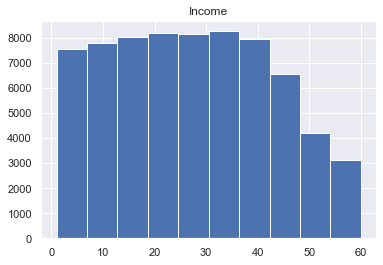

In [137]:
##1.Income
demo_df_clean.hist(column='Income')
plt.show()

Most applicants are in 15 to 40 income range.

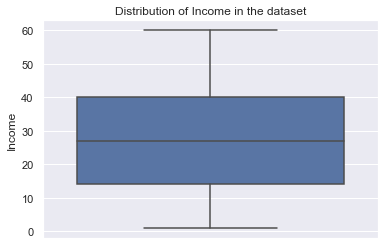

In [138]:
sns.boxplot(data = demo_df_clean, x = 'Income', orient='v')
plt.title('Distribution of Income in the dataset')
plt.show()

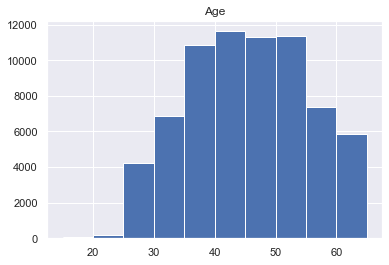

In [139]:
##2.Age
demo_df_clean.hist(column='Age')
plt.show()

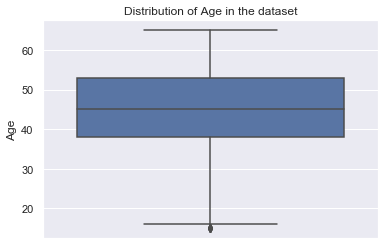

In [140]:
sns.boxplot(data = demo_df_clean, x = 'Age', orient='v')
plt.title('Distribution of Age in the dataset')
plt.show()

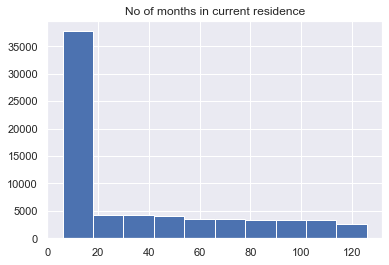

In [141]:
##3.No of months in current residence
demo_df_clean.hist(column='No of months in current residence')
plt.show()

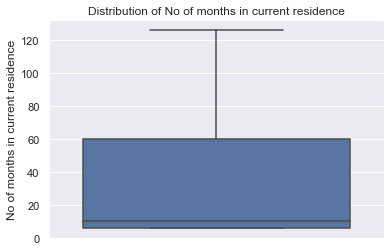

In [142]:
sns.boxplot(data = demo_df_clean, x = 'No of months in current residence', orient='v')
plt.title('Distribution of No of months in current residence')
plt.show()

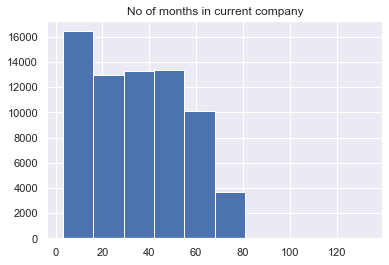

In [143]:
##4.No of months in current company'
demo_df_clean.hist(column='No of months in current company')
plt.show()

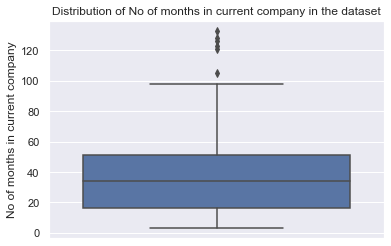

In [144]:
sns.boxplot(data = demo_df_clean, x = 'No of months in current company', orient='v')
plt.title('Distribution of No of months in current company in the dataset')
plt.show()

Most applicants are new job holders with 0-5yr experience. <br>
Population size is low in high experience category.<br>
Some outliers do exist.

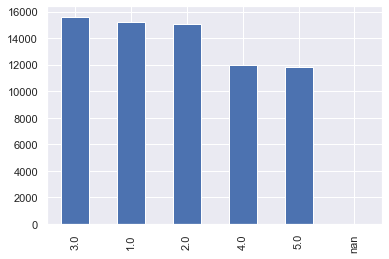

In [145]:
##5.No of dependents
demo_df_clean['No of dependents'].value_counts().plot(kind='bar')
plt.show()

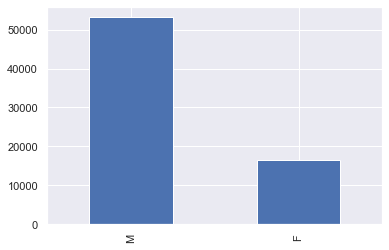

In [146]:
## 6.Gender
demo_df_clean['Gender'].value_counts().plot(kind='bar')
plt.show()

There are more male applicants than Female applicants.

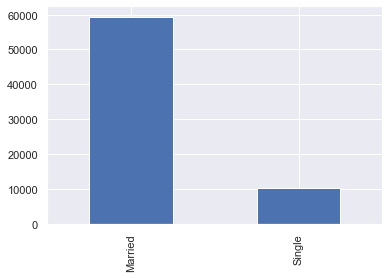

In [147]:
## 7.Marital Status (at the time of application)
demo_df_clean['Marital Status (at the time of application)'].value_counts().plot(kind='bar')
plt.show()

There are more married Applicants than Single applicants.

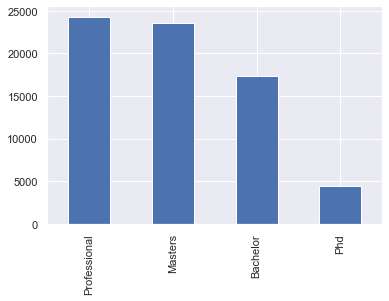

In [148]:
## 8.Education
demo_df_clean['Education'].value_counts().plot(kind='bar')
plt.show()

Most Applicants have Professional education or masters education

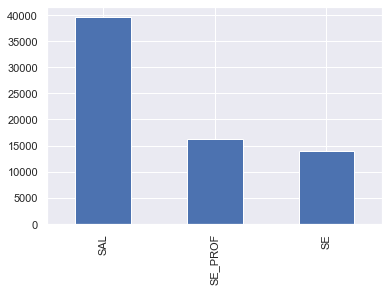

In [149]:
## 9.Profession
demo_df_clean['Profession'].value_counts().plot(kind='bar')
plt.show()

Most applicants have profession SAL(salaried)

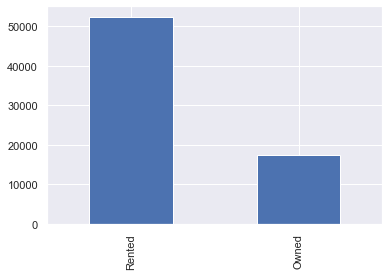

In [150]:
## 10.Type of residence
demo_df_clean['Type of residence'].value_counts().plot(kind='bar')
plt.show()

Most applicants have rented Type of residence

#### Credit bureau data data 

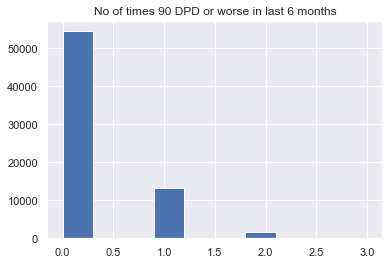

In [151]:
##1.No of times 90 DPD or worse in last 6 months
credit_df_clean.hist(column='No of times 90 DPD or worse in last 6 months')
plt.show()

Most people have no such overdues <br>
Among the very less people who have  90 days overdue, <br>
Repeating offenders population size is very very small.

In [152]:
##2.No of times 60 DPD or worse in last 6 months
credit_df_clean['No of times 60 DPD or worse in last 6 months'].describe()

count    69737.000000
mean         0.392102
std          0.772138
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: No of times 60 DPD or worse in last 6 months, dtype: float64

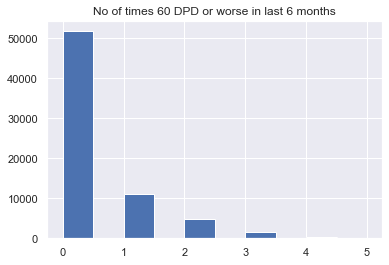

In [153]:
credit_df_clean.hist(column='No of times 60 DPD or worse in last 6 months')
plt.show()

Most people have no such overdues  <br>
Repeating offenders population size keep on decreasing with occurances of overdue.<br>
Compared to 90 days overdues, population size is higher

In [154]:
#3.No of times 30 DPD or worse in last 6 months
credit_df_clean['No of times 30 DPD or worse in last 6 months'].describe()

count    69737.000000
mean         0.524026
std          1.000960
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: No of times 30 DPD or worse in last 6 months, dtype: float64

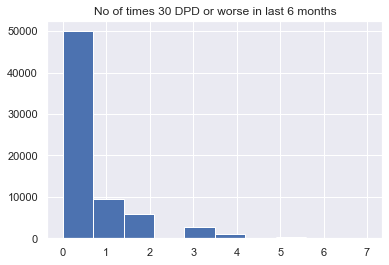

In [155]:
credit_df_clean.hist(column='No of times 30 DPD or worse in last 6 months')
plt.show()

Most people have no such overdues  <br>
Repeating offenders population size keep on decreasing with occurances of overdue.<br>

In [156]:
#4.No of times 90 DPD or worse in last 12 months
credit_df_clean['No of times 90 DPD or worse in last 12 months'].describe()

count    69737.000000
mean         0.415289
std          0.763692
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: No of times 90 DPD or worse in last 12 months, dtype: float64

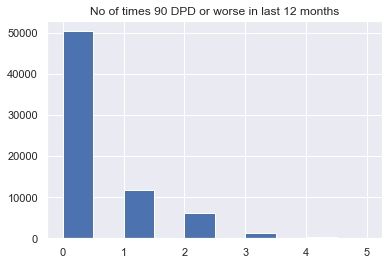

In [157]:
credit_df_clean.hist(column='No of times 90 DPD or worse in last 12 months')
plt.show()

Most people have no such overdues <br>
Among the very less people who have  90 days overdue, repeating offenders population size is very very small.<br>

In [158]:
#5.No of times 60 DPD or worse in last 12 months
credit_df_clean['No of times 60 DPD or worse in last 12 months'].describe()

count    69737.000000
mean         0.604084
std          1.022046
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: No of times 60 DPD or worse in last 12 months, dtype: float64

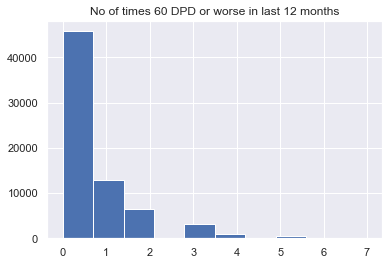

In [159]:
credit_df_clean.hist(column='No of times 60 DPD or worse in last 12 months')
plt.show()

Most people have no such overdues <br> 
Repeating offenders population size keep on decreasing with occurances of overdue.<br>
Compared to 90 days overdues, population size is higher<br>

In [160]:
##6.No of times 30 DPD or worse in last 12 months
credit_df_clean['No of times 30 DPD or worse in last 12 months'].describe()

count    69737.000000
mean         0.734689
std          1.243494
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: No of times 30 DPD or worse in last 12 months, dtype: float64

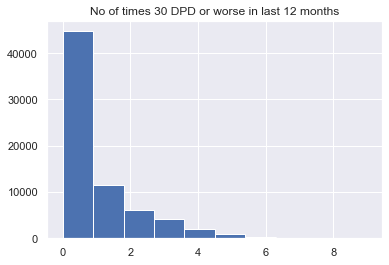

In [161]:
credit_df_clean.hist(column='No of times 30 DPD or worse in last 12 months')
plt.show()

Most people have no such overdues  <br>
Repeating offenders population size keep on decreasing with occurances of overdue.<br>

In [162]:
##7.Avgas CC Utilization in last 12 months
credit_df_clean['Avgas CC Utilization in last 12 months'].describe()

count    69737.000000
mean        28.864422
std         29.521032
min         -0.111429
25%          8.000000
50%         14.000000
75%         45.000000
max        113.000000
Name: Avgas CC Utilization in last 12 months, dtype: float64

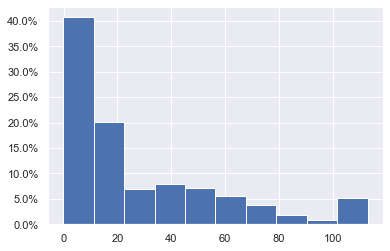

In [163]:
from matplotlib.ticker import PercentFormatter
plt.hist(credit_df_clean['Avgas CC Utilization in last 12 months'], weights=np.ones(len(credit_df_clean)) / len(credit_df_clean))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

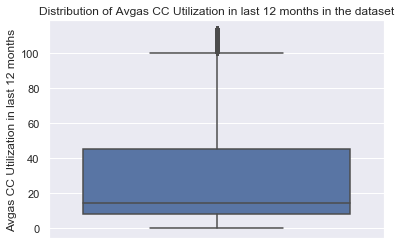

In [164]:
sns.boxplot(data = credit_df_clean, x = 'Avgas CC Utilization in last 12 months', orient='v')
plt.title('Distribution of Avgas CC Utilization in last 12 months in the dataset')
plt.show()

most applicants are utilizing only upto 20% of card upper limit, <br>
population size with proper 25 to 40 % card utilization is similar <br>
Left skewed ....outliers do exist.

In [165]:
#8.No of trades opened in last 6 months
credit_df_clean['No of trades opened in last 6 months'].describe()

count    69737.000000
mean         2.287509
std          2.082604
min         -3.016999
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: No of trades opened in last 6 months, dtype: float64

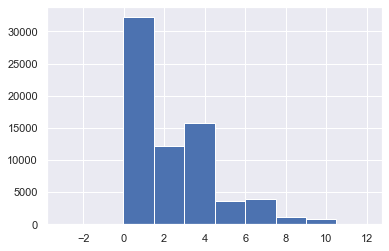

In [166]:
plt.hist(credit_df_clean['No of trades opened in last 6 months'])
plt.show()

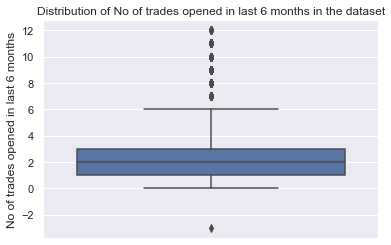

In [167]:
sns.boxplot(data = credit_df_clean, x = 'No of trades opened in last 6 months', orient='v')
plt.title('Distribution of No of trades opened in last 6 months in the dataset')
plt.show()

most applicants have 0-4 trades opened in last 6 mon.<br>
Outlier do exist.

In [168]:
#9.No of trades opened in last 12 months
credit_df_clean['No of trades opened in last 12 months'].describe()

count    69737.000000
mean         5.791474
std          5.096611
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         28.000000
Name: No of trades opened in last 12 months, dtype: float64

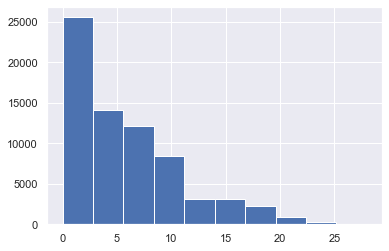

In [169]:
plt.hist(credit_df_clean['No of trades opened in last 12 months'])
plt.show()

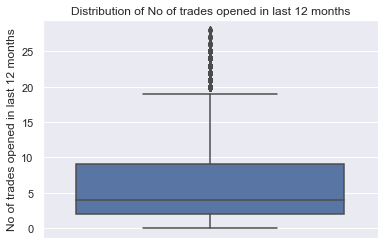

In [170]:
sns.boxplot(data = credit_df_clean, x = 'No of trades opened in last 12 months', orient='v')
plt.title('Distribution of No of trades opened in last 12 months')
plt.show()

Most applicants have 0-10 trades opened in last 12 mon.<br>
Outlier do exist.

In [171]:
#10.Total No of Trades
credit_df_clean['Total No of Trades'].describe()

count    69737.000000
mean         8.183059
std          7.155898
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         44.000000
Name: Total No of Trades, dtype: float64

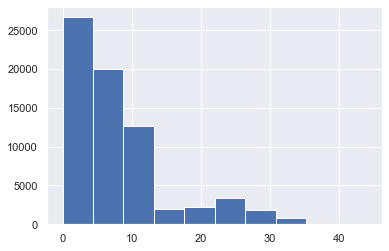

In [172]:
plt.hist(credit_df_clean['Total No of Trades'])
plt.show()

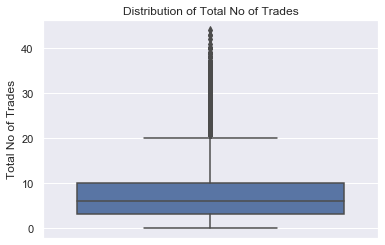

In [173]:
sns.boxplot(data = credit_df_clean, x = 'Total No of Trades', orient='v')
plt.title('Distribution of Total No of Trades')
plt.show()

most applicants have 0-10 trades in total<br>
Outlier are there.

In [174]:
##11.No of PL trades opened in last 6 months
credit_df_clean['No of PL trades opened in last 6 months'].describe()

count    69737.000000
mean         1.191290
std          1.352994
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: No of PL trades opened in last 6 months, dtype: float64

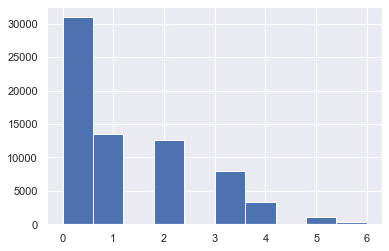

In [175]:
plt.hist(credit_df_clean['No of PL trades opened in last 6 months'])
plt.show()

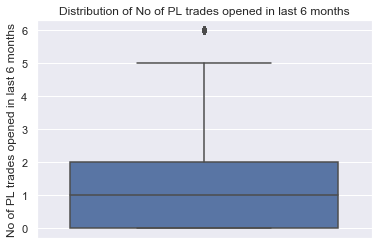

In [176]:
sns.boxplot(data = credit_df_clean, x = 'No of PL trades opened in last 6 months', orient='v')
plt.title('Distribution of No of PL trades opened in last 6 months')
plt.show()

most applicants have 0-3 trades opened in last 6 mon.<br>
Outlier might be there.

In [177]:
##12.No of PL trades opened in last 12 months
credit_df_clean['No of PL trades opened in last 12 months'].describe()

count    69737.000000
mean         2.366563
std          2.423762
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         12.000000
Name: No of PL trades opened in last 12 months, dtype: float64

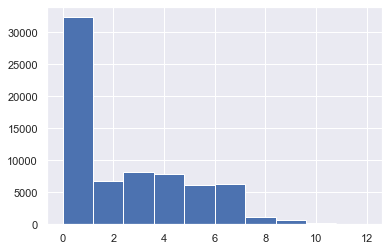

In [178]:
plt.hist(credit_df_clean['No of PL trades opened in last 12 months'])
plt.show()

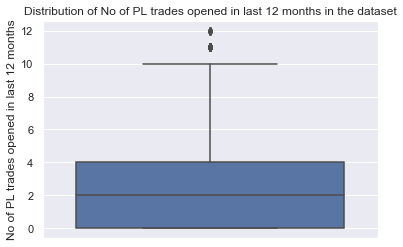

In [179]:
sns.boxplot(data = credit_df_clean, x = 'No of PL trades opened in last 12 months', orient='v')
plt.title('Distribution of No of PL trades opened in last 12 months in the dataset')
plt.show()

Most applicants have 0-6 PL opened in last 12 mon.<br>
Very few Outlier are there.

In [180]:
##13.No of Inquiries in last 6 months (excluding home & auto loans)
credit_df_clean['No of Inquiries in last 6 months (excluding home & auto loans)'].describe()

count    69737.000000
mean         1.760414
std          1.985525
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: float64

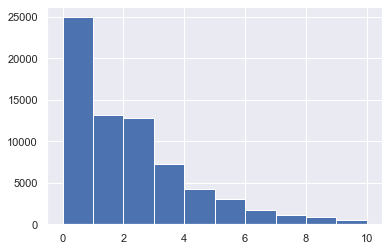

In [181]:
plt.hist(credit_df_clean['No of Inquiries in last 6 months (excluding home & auto loans)'])
plt.show()

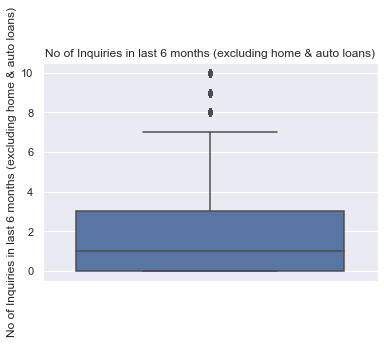

In [182]:
sns.boxplot(data = credit_df_clean, x = 'No of Inquiries in last 6 months (excluding home & auto loans)', orient='v')
plt.title('No of Inquiries in last 6 months (excluding home & auto loans)')
plt.show()

Most applicants have 0-4 trades opened in last 6 mon.<br>
Outlier might be there.

In [183]:
##14.No of Inquiries in last 12 months (excluding home & auto loans)
credit_df_clean['No of Inquiries in last 12 months (excluding home & auto loans)'].describe()

count    69737.000000
mean         3.530034
std          3.612265
min          0.000000
25%          0.000000
50%          3.000000
75%          5.000000
max         20.000000
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: float64

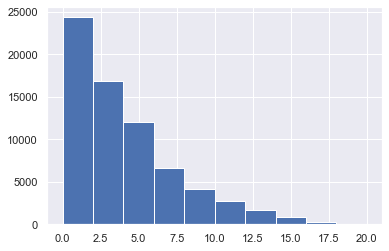

In [184]:
plt.hist(credit_df_clean['No of Inquiries in last 12 months (excluding home & auto loans)'])
plt.show()

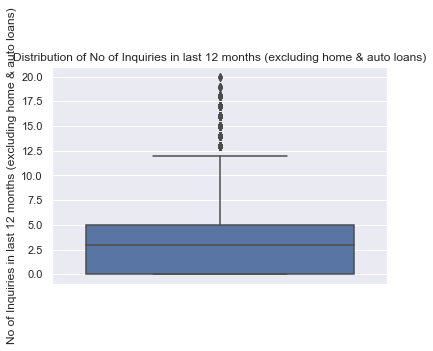

In [185]:
sns.boxplot(data = credit_df_clean, x = 'No of Inquiries in last 12 months (excluding home & auto loans)', orient='v')
plt.title('Distribution of No of Inquiries in last 12 months (excluding home & auto loans)')
plt.show()

Most applicants have 0-5 trades opened in last 12 mon.<br>
Outlier are present.

In [186]:
#15.Outstanding Balance
credit_df_clean['Outstanding Balance'].describe()

count    6.973700e+04
mean     1.247968e+06
std      1.285693e+06
min      0.000000e+00
25%      2.067570e+05
50%      7.727050e+05
75%      2.923977e+06
max      5.218801e+06
Name: Outstanding Balance, dtype: float64

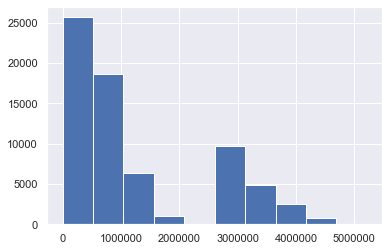

In [187]:
plt.hist(credit_df_clean['Outstanding Balance'])
plt.show()

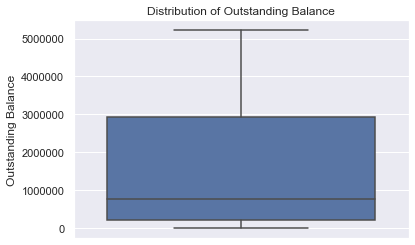

In [188]:
sns.boxplot(data = credit_df_clean, x = 'Outstanding Balance', orient='v')
plt.title('Distribution of Outstanding Balance')
plt.show()

0-200000 range higher no of applicants<br>
300k upwards lower no of applicants<br>
Most applicants are starting to repay their loans

In [189]:
##16.Presence of open auto loan
credit_df_clean['Presence of open auto loan'].describe()

count    69737.000000
mean         0.084761
std          0.278528
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Presence of open auto loan, dtype: float64

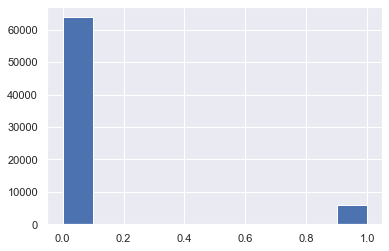

In [190]:
plt.hist(credit_df_clean['Presence of open auto loan'])
plt.show()

There are more people without a auto loan

In [191]:
##17.Presence of open home loan
credit_df_clean['Presence of open home loan'].describe()

count    69737.000000
mean         0.262185
std          0.439826
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Presence of open home loan, dtype: float64

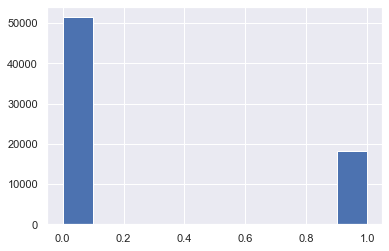

In [192]:
plt.hist(credit_df_clean['Presence of open home loan'])
plt.show()

There are more people without a home loan

## BIVARIATE ANALYSIS

#### Demographic data 

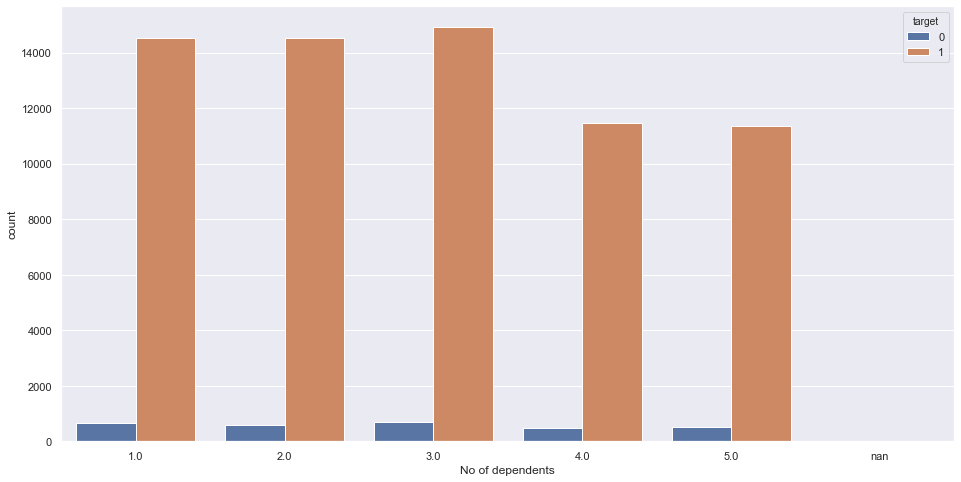

In [193]:
## No of dependents vs target
plt.figure(figsize=(16,8))
sns.countplot(x='No of dependents',hue='target',data=demo_df_clean)
plt.show()

No significant pattern found in defaulter rates for differnt No of dependents values.

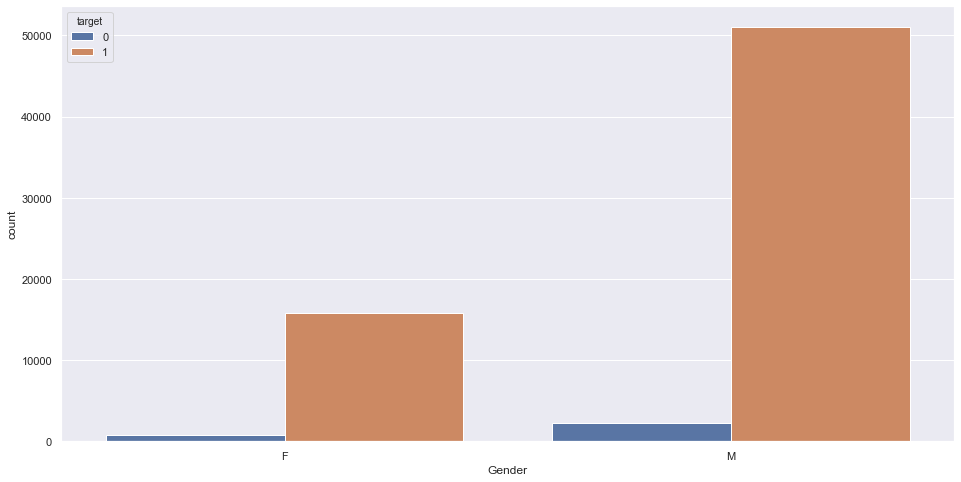

In [194]:
## Gender vs target
plt.figure(figsize=(16,8))
sns.countplot(x='Gender',hue='target',data=demo_df_clean)
plt.show()

No significant pattern found in defaulter rates for gender values

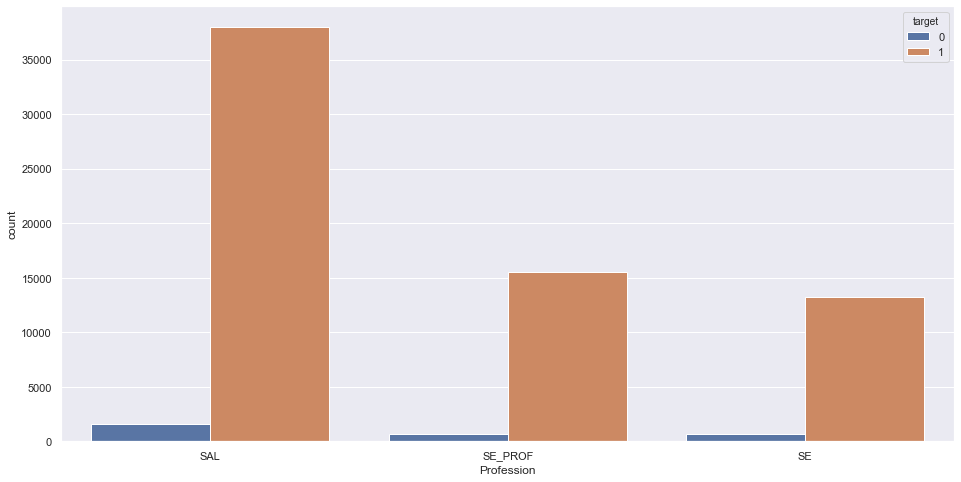

In [195]:
## Profession vs target
plt.figure(figsize=(16,8))
sns.countplot(x='Profession',hue='target',data=demo_df_clean)
plt.show()

No significant pattern found in defaulter rates for differnt professions

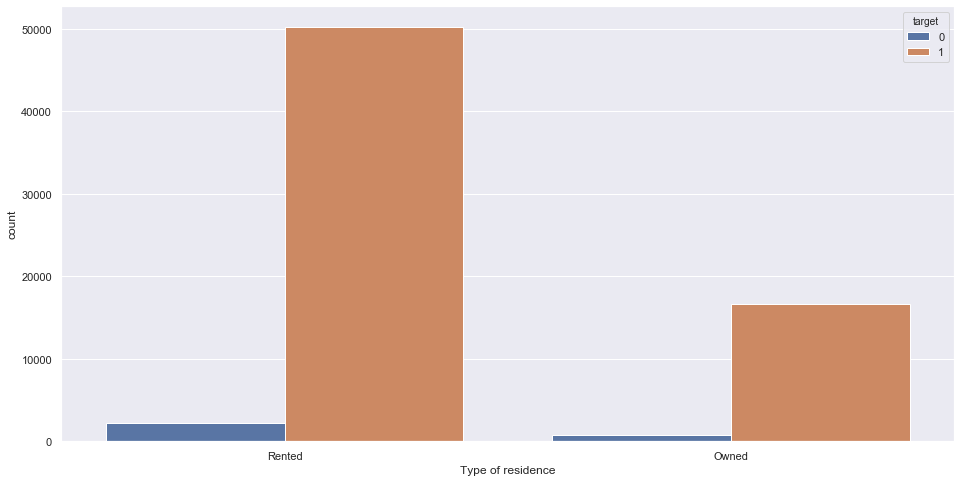

In [196]:
## Type of residence vs target
plt.figure(figsize=(16,8))
sns.countplot(x='Type of residence',hue='target',data=demo_df_clean)
plt.show()

No significant pattern found in defaulter rates for differnt residence type 

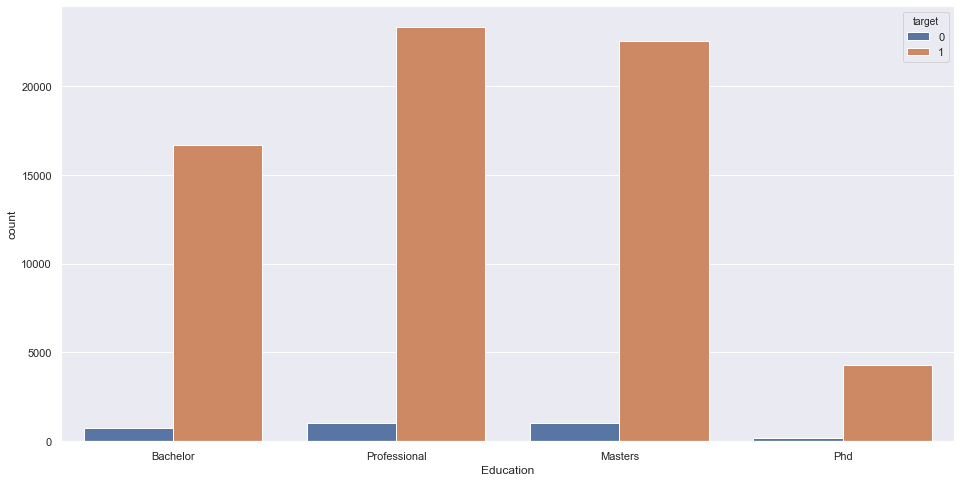

In [197]:
## Education vs target
plt.figure(figsize=(16,8))
sns.countplot(x='Education',hue='target',data=demo_df_clean)
plt.show()

No significant pattern found in defaulter rates for differnt Education except for 'others' type

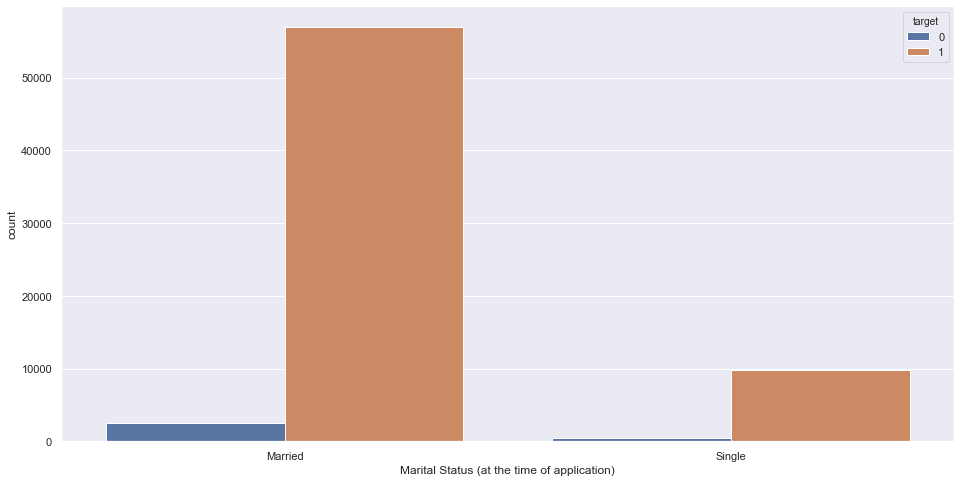

In [198]:
## Education vs target
plt.figure(figsize=(16,8))
sns.countplot(x='Marital Status (at the time of application)',hue='target',data=demo_df_clean)
plt.show()

No significant pattern found in defaulter rates for differnt marital status

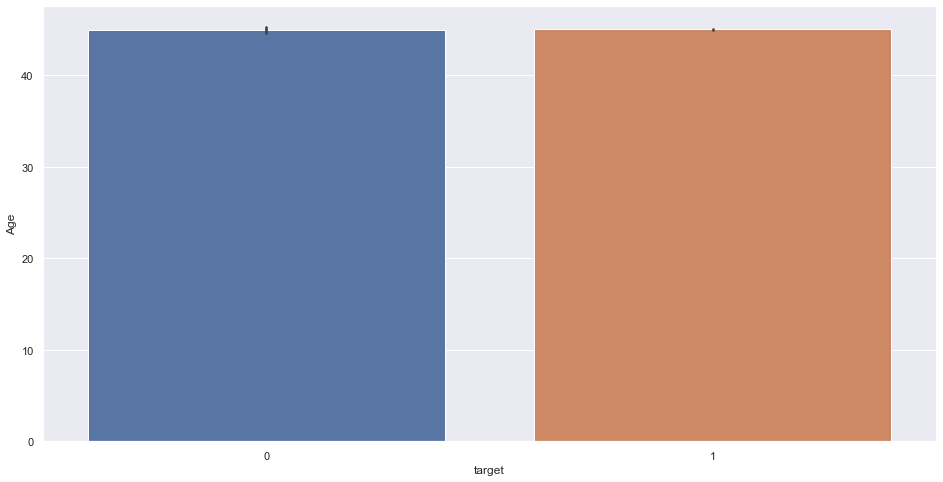

In [199]:
## Age vs target
plt.figure(figsize=(16,8))
sns.barplot(x='target',y='Age',data=demo_df_clean)
plt.show()

There is no difference in median values. 

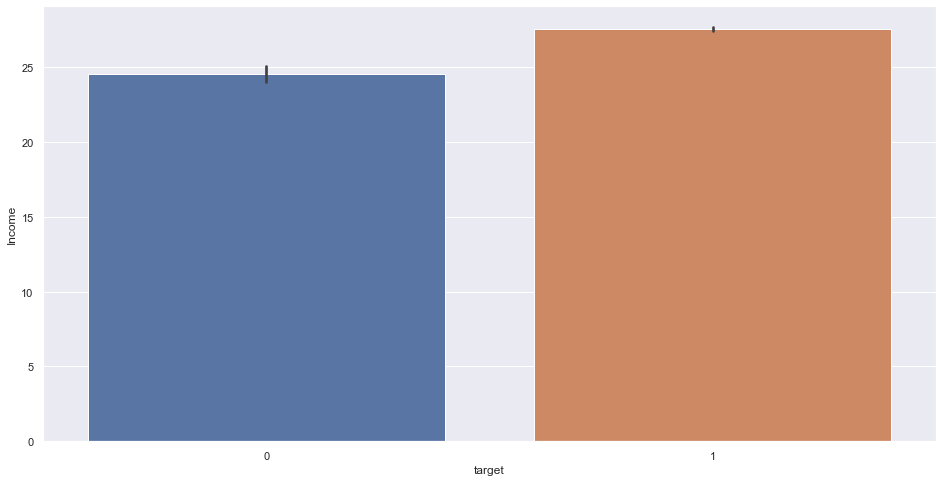

In [200]:
## Income vs target
plt.figure(figsize=(16,8))
sns.barplot(x='target',y='Income',data=demo_df_clean)
plt.show()

The median values for income of defaulters are lower than that of non defaulters

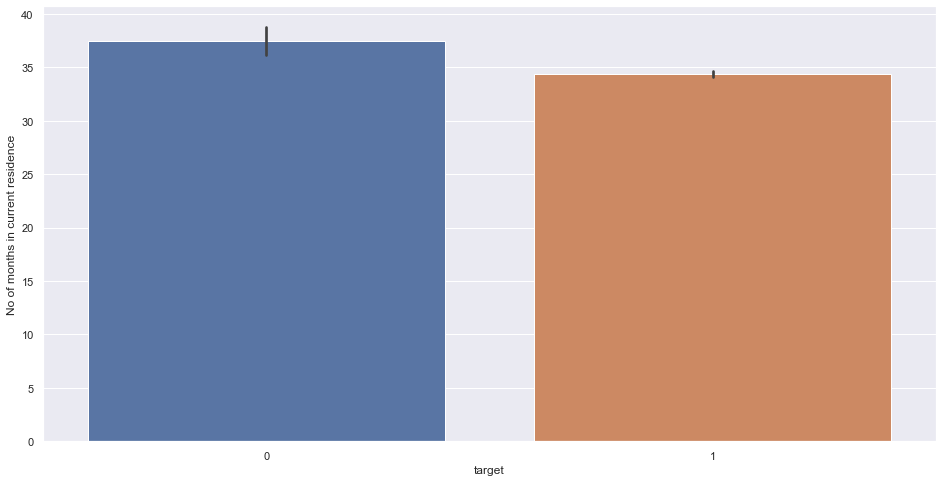

In [201]:
## No of months in current residence vs target
plt.figure(figsize=(16,8))
sns.barplot(x='target',y='No of months in current residence',data=demo_df_clean)
plt.show()

The median No of months in current company of non defaulters are slightly lower than that of defaulters

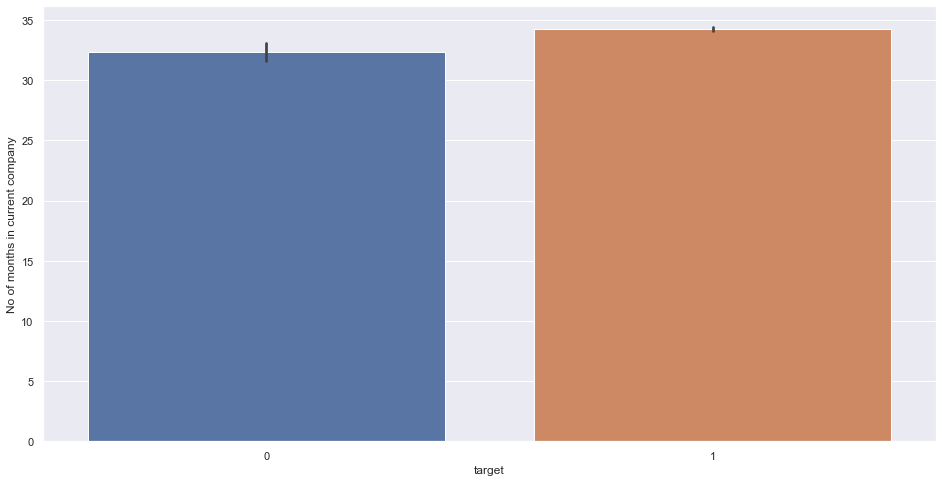

In [202]:
## No of months in current company vs target
plt.figure(figsize=(16,8))
sns.barplot(y='No of months in current company',x='target',data=demo_df_clean)
plt.show()

### Credit Beaureu Data

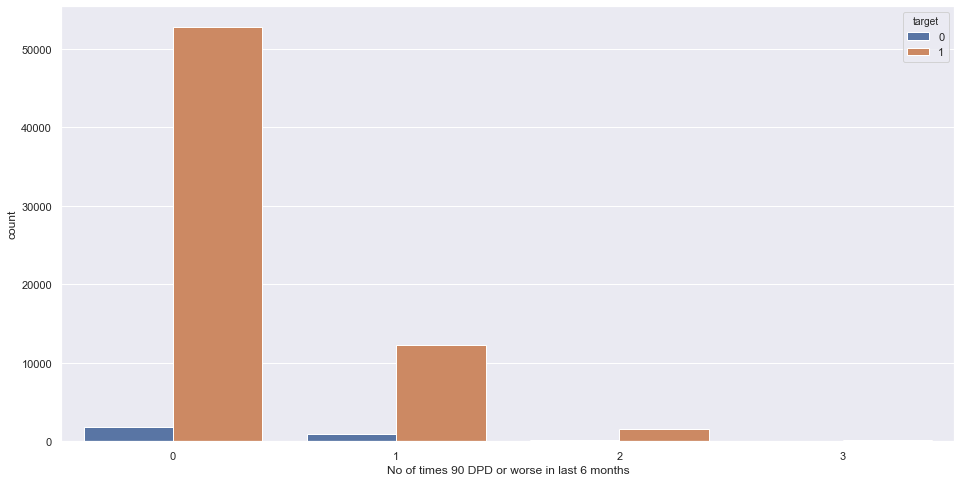

In [203]:
## No of times 90 DPD or worse in last 6 months vs target
plt.figure(figsize=(16,8))
sns.countplot(x='No of times 90 DPD or worse in last 6 months',hue='target',data=credit_df_clean)
plt.show()

No of defaulters are increasing with increase in No of times 90 DPD or worse in last 6 months

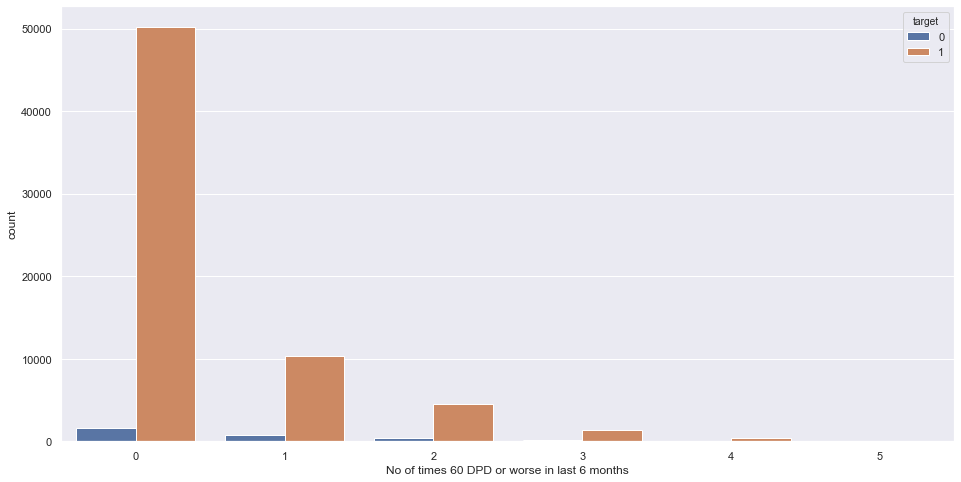

In [204]:
## No of times 60 DPD or worse in last 6 months vs target
plt.figure(figsize=(16,8))
sns.countplot(x='No of times 60 DPD or worse in last 6 months',hue='target',data=credit_df_clean)
plt.show()

No of defaulters are increasing for upto 3  times 60 DPD in last 6 months

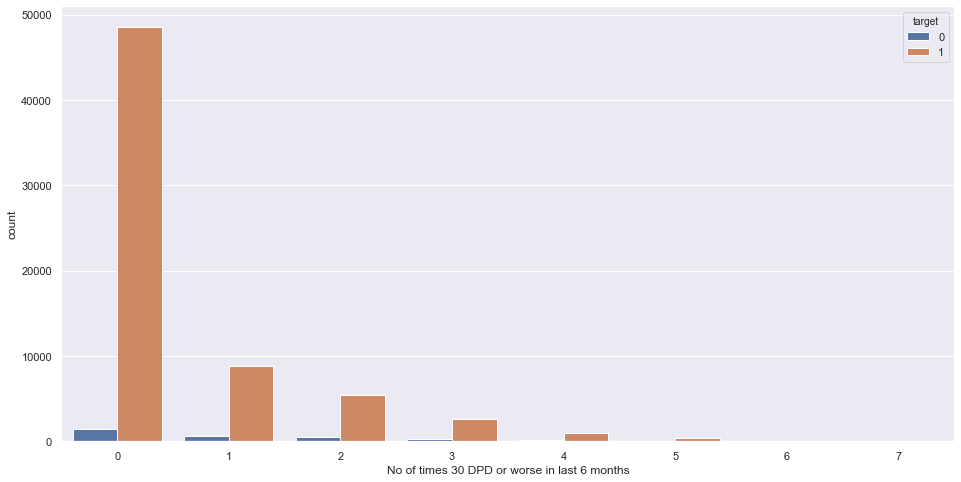

In [205]:
## No of times 30 DPD or worse in last 6 months vs target
plt.figure(figsize=(16,8))
sns.countplot(x='No of times 30 DPD or worse in last 6 months',hue='target',data=credit_df_clean)
plt.show()

No of defaulters are increasing for upto 5 times in 300 DPD in last 6 months

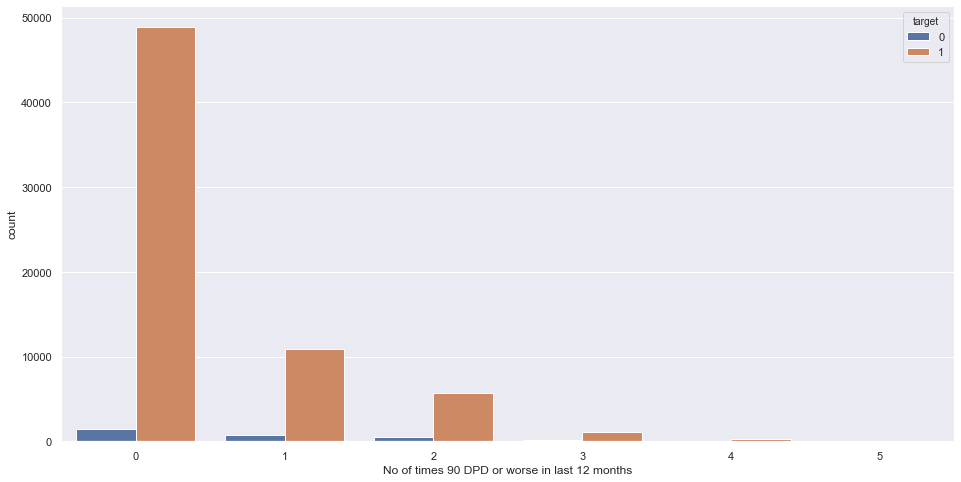

In [206]:
## No of times 90 DPD or worse in last 12 months' vs target
plt.figure(figsize=(16,8))
sns.countplot(x='No of times 90 DPD or worse in last 12 months',hue='target',data=credit_df_clean)
plt.show()

No of defaulters are increasing with increase in no.of.times 90 DPD in last 6 months

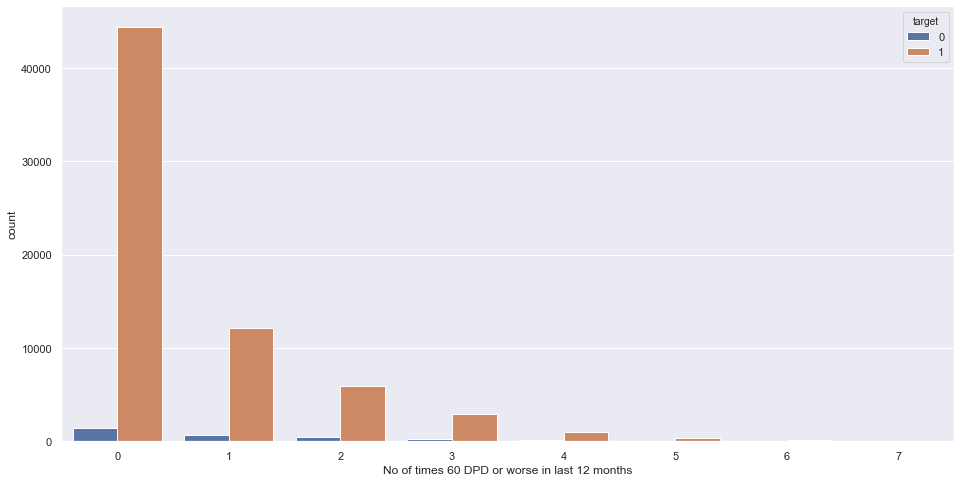

In [207]:
## No of times 60 DPD or worse in last 12 months' vs target
plt.figure(figsize=(16,8))
sns.countplot(x='No of times 60 DPD or worse in last 12 months',hue='target',data=credit_df_clean)
plt.show()

No of defaulters are increasing till 4 times 60 DPD or worse in last 12 months

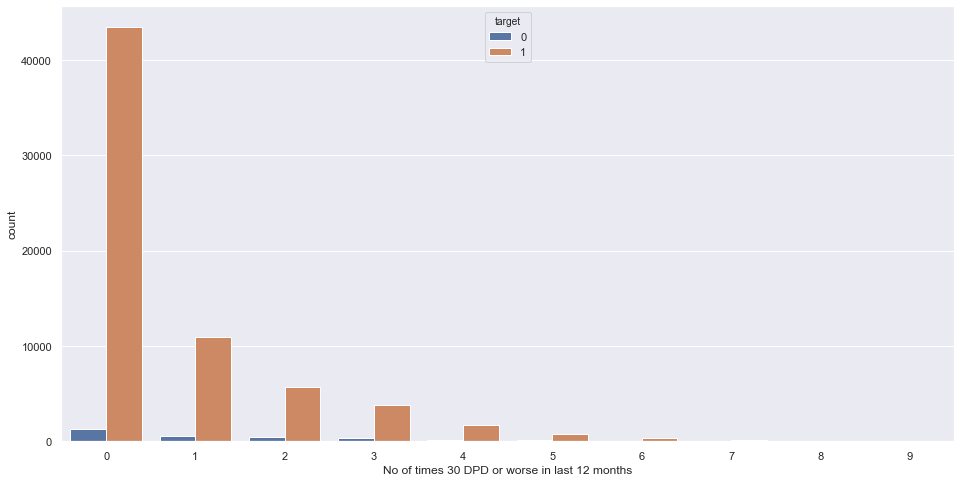

In [208]:
## No of times 30 DPD or worse in last 12 months' vs target
plt.figure(figsize=(16,8))
sns.countplot(x='No of times 30 DPD or worse in last 12 months',hue='target',data=credit_df_clean)
plt.show()

No of defaulters are increasing till 7.5 times 30 DPD in last 12 months

In [209]:
#Binning of values for Modified CC ultilization
Binned_CC_Utilization=pd.cut(credit_df_clean['Avgas CC Utilization in last 12 months'], bins = (0,10, 20, 30, 40, 50, 60,70,80,90,100,110,120),)

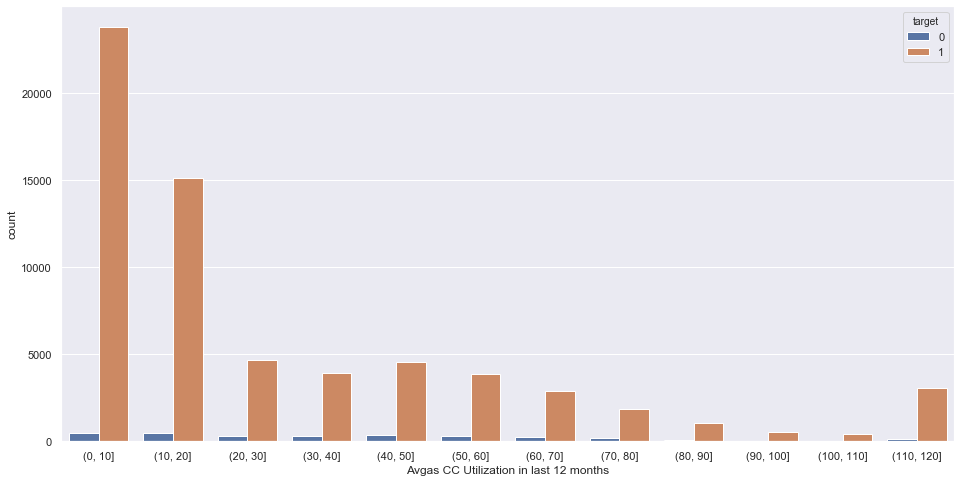

In [210]:
plt.figure(figsize=(16,8))
sns.countplot(x=Binned_CC_Utilization,hue='target',data=credit_df_clean)
plt.show()

There is no significant pattern found.

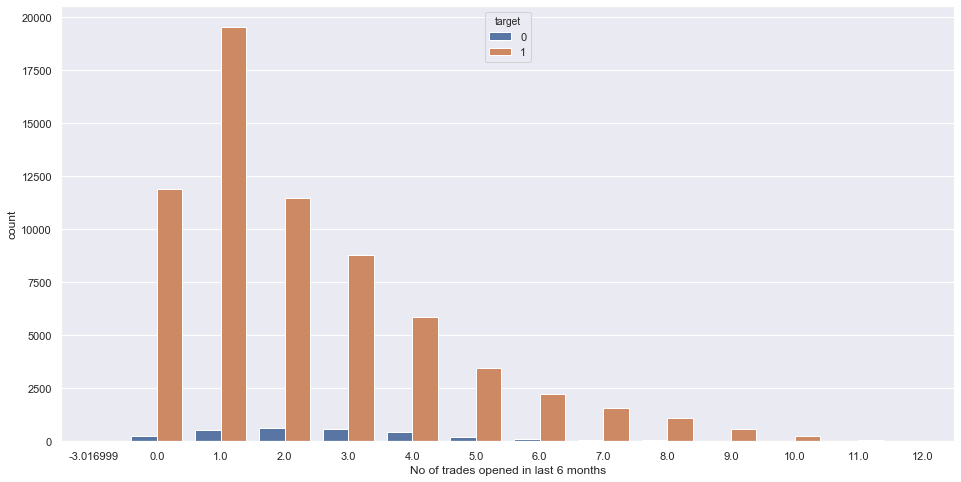

In [211]:
##No of trades opened in last 6 months vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='No of trades opened in last 6 months',hue='target',data=credit_df_clean)
plt.show()

Trades which are open 4 times in last 6 months tends to default more

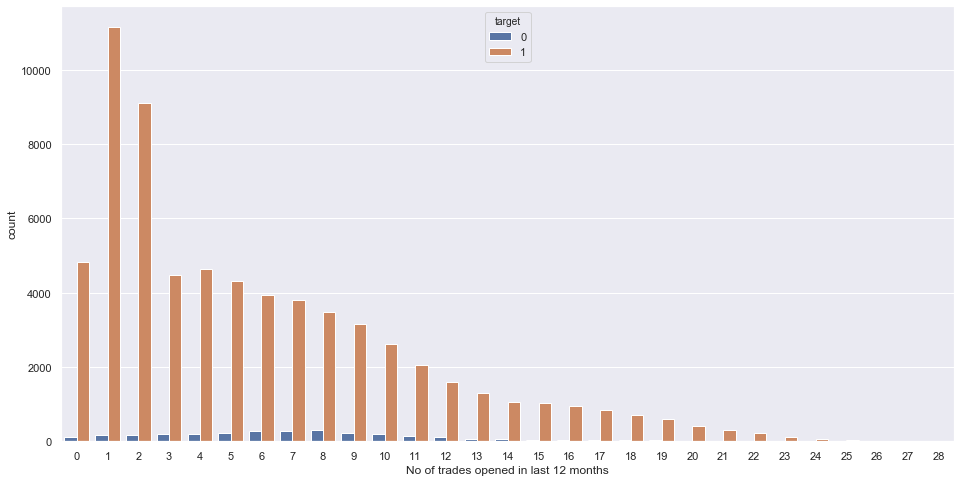

In [212]:
##No of trades opened in last 12 months vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='No of trades opened in last 12 months',hue='target',data=credit_df_clean)
plt.show()

No appropriate pattern found in no of defaulters with increase in No of trades opened in last 12 months

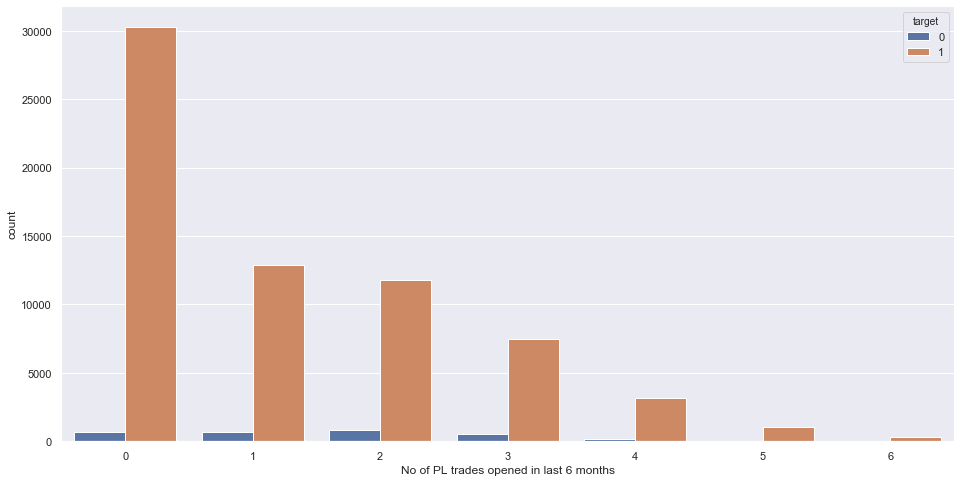

In [213]:
##No of PL trades opened in last 6 months vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='No of PL trades opened in last 6 months',hue='target',data=credit_df_clean)
plt.show()

No of defaulters increases till 4th month then decreases with increase in no of PL trades opened in last 6 months 

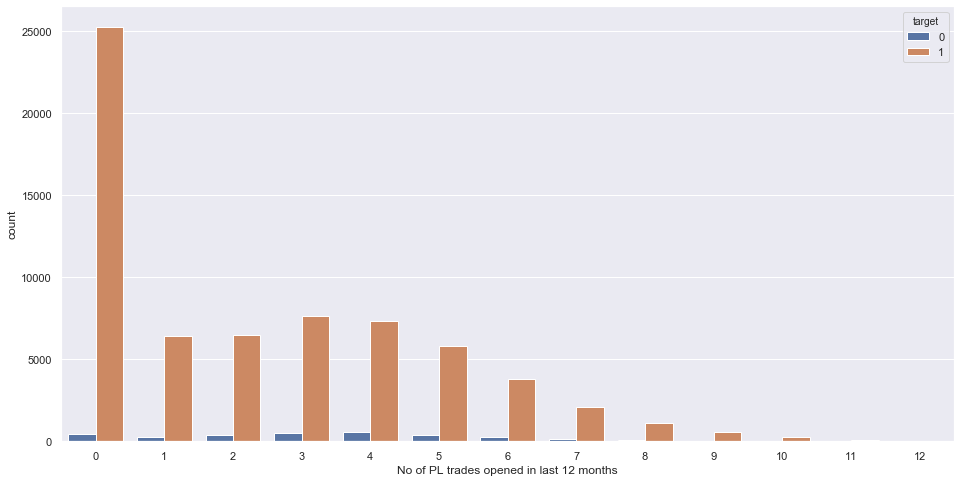

In [214]:
##No of PL trades opened in last 12 months vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='No of PL trades opened in last 12 months',hue='target',data=credit_df_clean)
plt.show()

No of defaulters increases till 6th month then decreases and suddenly increases in 12th month with increase in no of PL trades opened in last 12 months

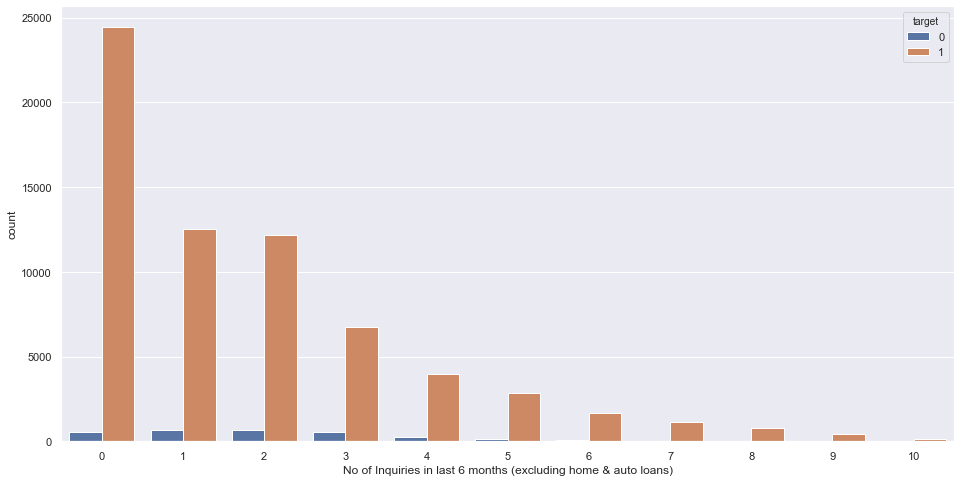

In [215]:
##No of Inquiries in last 6 months (excluding home & auto loans) vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='No of Inquiries in last 6 months (excluding home & auto loans)',hue='target',data=credit_df_clean)
plt.show()

No appropriate pattern found in no of defaulters 

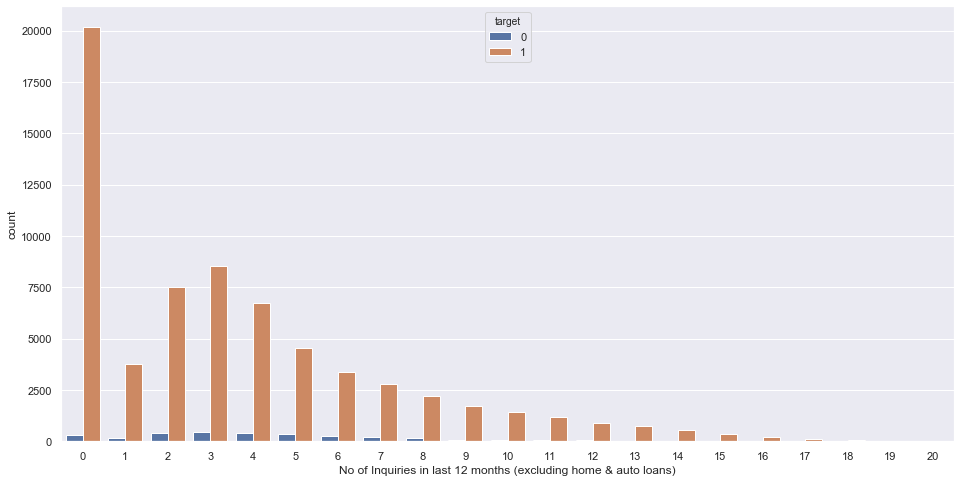

In [216]:
##No of Inquiries in last 12 months (excluding home & auto loans) vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='No of Inquiries in last 12 months (excluding home & auto loans)',hue='target',data=credit_df_clean)
plt.show()

No appropriate pattern found in no of defaulters 

In [217]:
# Binning outstanding balance
Binning_outstanding_Balance=pd.cut(credit_df_clean['Outstanding Balance'], bins =(0, 1000000, 2000000, 3000000, 4000000, 5000000 ,6000000))

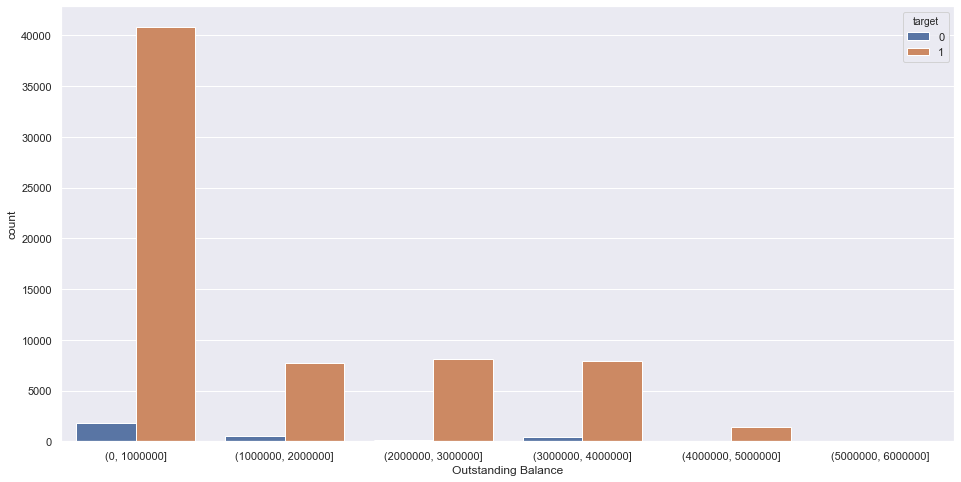

In [218]:
plt.figure(figsize=(16,8))
sns.countplot(x=Binning_outstanding_Balance,hue='target',data=credit_df_clean)
plt.show()

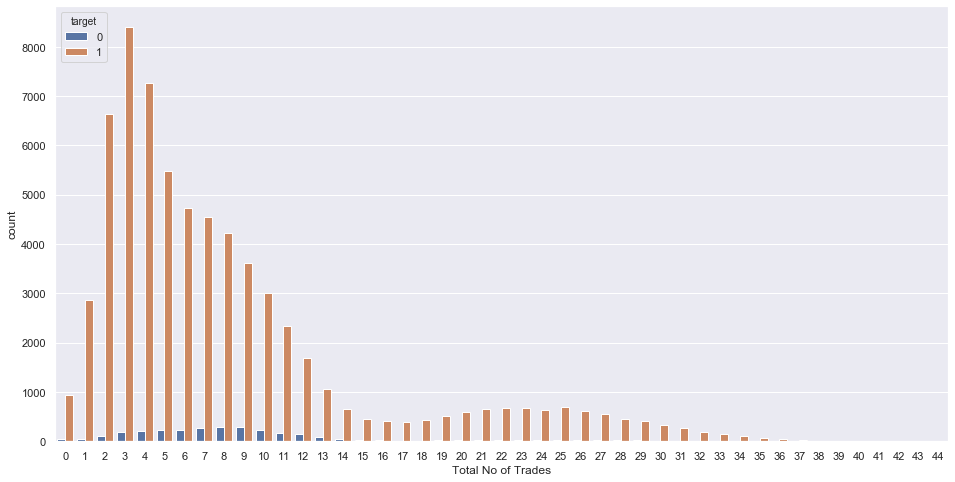

In [219]:
##Total No of Trades vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='Total No of Trades',hue='target',data=credit_df_clean)
plt.show()

People who opened 3-9 No of trades tend to defaut more  

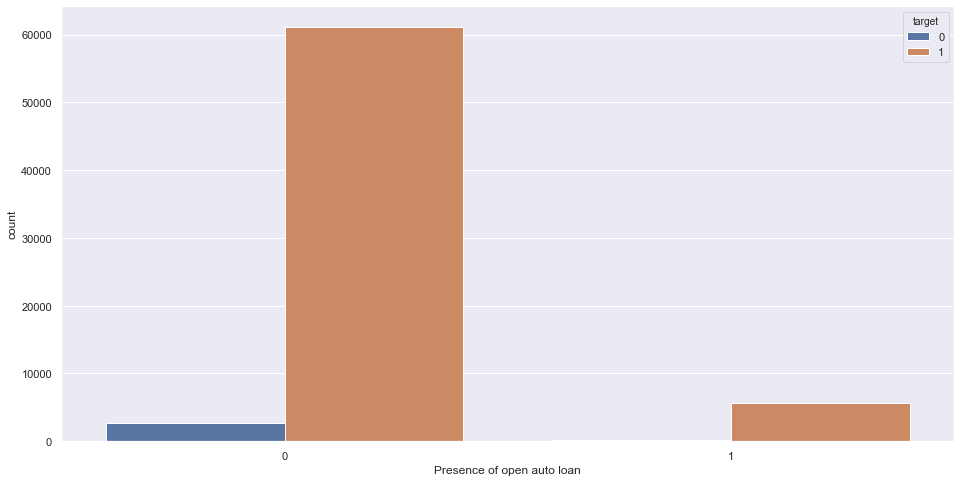

In [220]:
##Presence of open auto loan vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='Presence of open auto loan',hue='target',data=credit_df_clean)
plt.show()

No appropriate pattern found in no of defaulters 

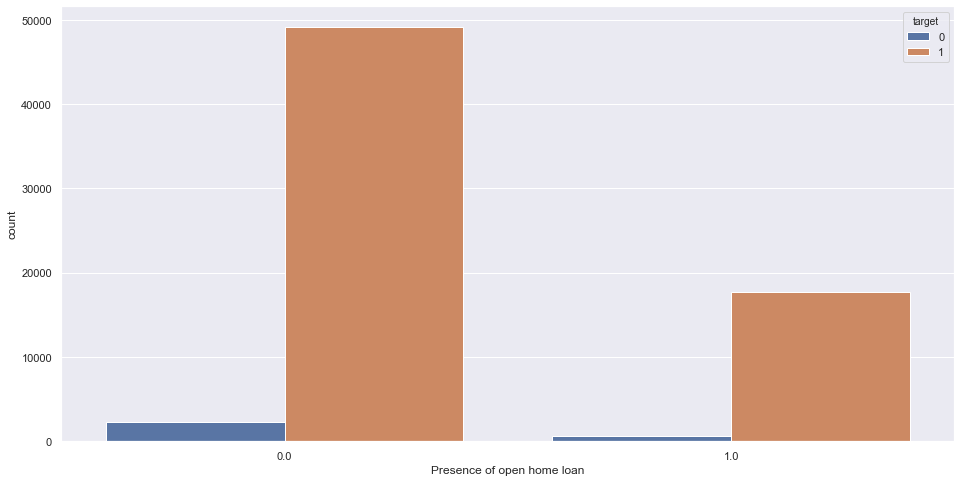

In [221]:
##Presence of open home loan vs Target
plt.figure(figsize=(16,8))
sns.countplot(x='Presence of open home loan',hue='target',data=credit_df_clean)
plt.show()

No appropriate pattern found in no of defaulters 

## Correlation plot

In [222]:
#Finding Correlation between Numerical Variables 
corr_data = pd.merge(demo_df_clean, credit_df_clean, on=['Application ID'], how='inner')
corr_data.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'target_x', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
   

In [223]:
#Removing application ID and Performance tag variables before checking correlation
corr_data.drop(["Application ID","target_y","target_x"], axis = 1, inplace = True) 
corr_data.head()

Age Gender Marital Status (at the time of application) No of dependents  \
0   48      F                                     Married              2.0   
1   31      M                                     Married              4.0   
2   32      M                                      Single              2.0   
3   43      M                                     Married              1.0   
4   35      F                                     Married              5.0   

   Income     Education Profession Type of residence  \
0    40.0      Bachelor        SAL            Rented   
1    55.0  Professional    SE_PROF            Rented   
2    46.0      Bachelor    SE_PROF            Rented   
3    53.0      Bachelor         SE            Rented   
4    44.0  Professional        SAL            Rented   

   No of months in current residence  No of months in current company  ...  \
0                                113                               56  ...   
1                                112                               46  ...   
2                                104                               49  ...   
3                                 94                               53  ...   
4                                112                               43  ...   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         1.0            2999395.0                   4   
1                         0.0               3078.0                   5   
2                         1.0            3004972.0                   2   
3                         1.0            3355373.0                   4   
4                         1.0            3014283.0                   4   

   Presence of open auto loan  
0                           0  
1                           0  
2                           0  
3                           1  
4                           0  

[5 rows x 27 columns]

In [224]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_data_numeric=corr_data.select_dtypes(include=numerics)

In [225]:
# Let's plot this correlation
cor = corr_data_numeric.corr()
cor

Age    Income  \
Age                                                 1.000000  0.058682   
Income                                              0.058682  1.000000   
No of months in current residence                  -0.067643 -0.089415   
No of months in current company                    -0.024464 -0.096487   
No of times 90 DPD or worse in last 6 months       -0.016879 -0.189808   
No of times 60 DPD or worse in last 6 months       -0.020340 -0.205410   
No of times 30 DPD or worse in last 6 months       -0.021123 -0.215961   
No of times 90 DPD or worse in last 12 months      -0.020938 -0.212374   
No of times 60 DPD or worse in last 12 months      -0.020336 -0.196017   
No of times 30 DPD or worse in last 12 months      -0.021754 -0.203907   
Avgas CC Utilization in last 12 months             -0.004196 -0.182884   
No of trades opened in last 6 months                0.016361 -0.142064   
No of trades opened in last 12 months               0.016660 -0.162563   
No of PL trades opened in last 6 months             0.012488 -0.180480   
No of PL trades opened in last 12 months            0.011809 -0.197499   
No of Inquiries in last 6 months (excluding hom...  0.012888 -0.144757   
No of Inquiries in last 12 months (excluding ho...  0.016602 -0.156809   
Presence of open home loan                         -0.009905  0.073330   
Outstanding Balance                                -0.006689  0.005150   
Total No of Trades                                  0.021780 -0.107984   
Presence of open auto loan                         -0.009877  0.033943   

                                                    No of months in current residence  \
Age                                                                         -0.067643   
Income                                                                      -0.089415   
No of months in current residence                                            1.000000   
No of months in current company                                             -0.076253   
No of times 90 DPD or worse in last 6 months                                 0.151465   
No of times 60 DPD or worse in last 6 months                                 0.147142   
No of times 30 DPD or worse in last 6 months                                 0.148493   
No of times 90 DPD or worse in last 12 months                                0.164020   
No of times 60 DPD or worse in last 12 months                                0.186629   
No of times 30 DPD or worse in last 12 months                                0.183690   
Avgas CC Utilization in last 12 months                                       0.266897   
No of trades opened in last 6 months                                        -0.053368   
No of trades opened in last 12 months                                       -0.037311   
No of PL trades opened in last 6 months                                      0.038148   
No of PL trades opened in last 12 months                                     0.042672   
No of Inquiries in last 6 months (excluding hom...                          -0.071555   
No of Inquiries in last 12 months (excluding ho...                          -0.081658   
Presence of open home loan                                                  -0.003344   
Outstanding Balance                                                          0.024699   
Total No of Trades                                                          -0.103568   
Presence of open auto loan                                                   0.010798   

                                                    No of months in current company  \
Age                                                                       -0.024464   
Income                                                                    -0.096487   
No of months in current residence                                         -0.076253   
No of months in current company                                            1.000000   
No of times 90 DPD or worse in las

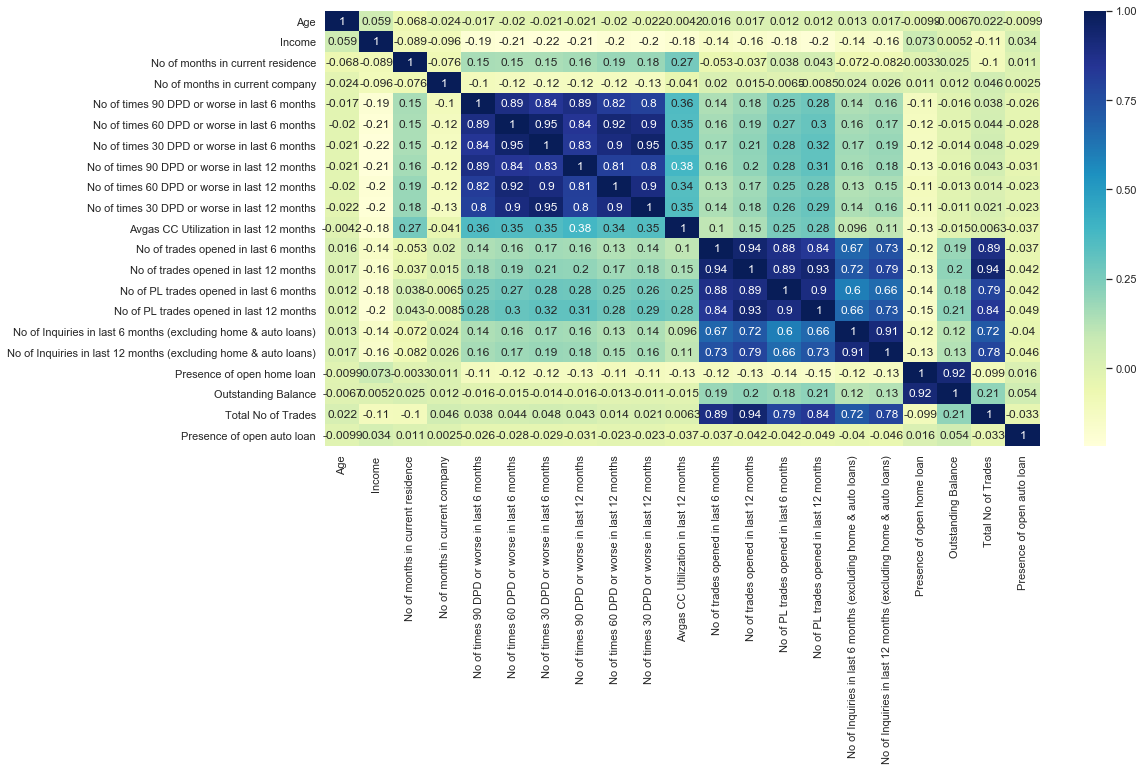

In [226]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Conclusions from EDA:

#### 1. Demographic variables are not very good predictors of defaulting. Only below 3 variables seems significant.
           1.Income
           2.No of months in current residence 
           3.No of months in current company

#### 2.Credit bureau dataset has many variables which seems like good predictors of defaulters.
        1.No of times 90 DPD or worse in last 6 months
        2.No of times 60 DPD or worse in last 6 months
        3.No of times 30 DPD or worse in last 6 months
        4.No of times 90 DPD or worse in last 12 months
        5.No of times 60 DPD or worse in last 12 months
        6.No of times 30 DPD or worse in last 12 months
        7.Avgas CC Utilization in last 12 months
        8.No of trades opened in last 6 months
        9.No of trades opened in last 12 months

#### 3. There is no correlation between numeric variables of demographic dataset.

#### 4. Few numeric variables of Credit bureau dataset show strong positive correlation with other variables.
        1.The 6 variables - No.of.times 90/60/30 DPD or worse in last 6/12 months are highy correlated among themselves.
        2.No of enquiries in last 6 months/12 months excluding home, auto loan variables are highly correlated.
        3.No. of trade opened in 6/12 months,total number of trades, no of PL trades in 6/12 months are correlated.

In [227]:
### Outlier treatment

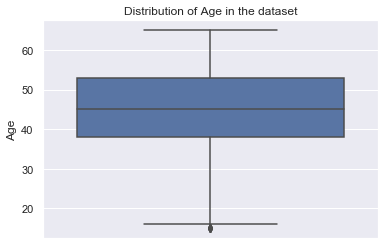

In [228]:
## 1.Age
sns.boxplot(data = demo_df_clean, x = 'Age', orient='v')
plt.title('Distribution of Age in the dataset')
plt.show()

In [229]:
demo_df_clean['Age'].quantile([0,1,0.01]) 

0.00    15.0
1.00    65.0
0.01    27.0
Name: Age, dtype: float64

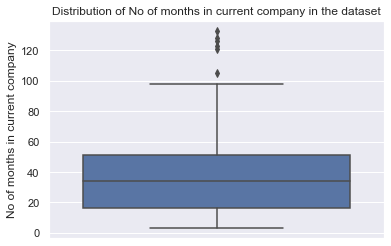

In [230]:
## 2.No of months in current company
sns.boxplot(data = demo_df_clean, x = 'No of months in current company', orient='v')
plt.title('Distribution of No of months in current company in the dataset')
plt.show()

In [231]:
demo_df_clean['No of months in current company'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01      3.0
0.02      3.0
0.04      3.0
0.05      3.0
0.10      6.0
0.00      3.0
0.40     27.0
0.50     34.0
0.60     41.0
0.94     66.0
0.95     68.0
0.96     69.0
0.99     74.0
1.00    133.0
Name: No of months in current company, dtype: float64

In [232]:
demo_df_clean["No of months in current company"] = np.where(demo_df_clean["No of months in current company"] >74, 74,demo_df_clean['No of months in current company'])

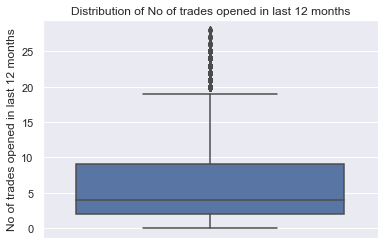

In [233]:
## 3.No of trades opened in last 12 months
sns.boxplot(data = credit_df_clean, x = 'No of trades opened in last 12 months', orient='v')
plt.title('Distribution of No of trades opened in last 12 months')
plt.show()

In [234]:
credit_df_clean["No of trades opened in last 12 months"] = np.where(credit_df_clean["No of trades opened in last 12 months"] >21,21,credit_df_clean['No of trades opened in last 12 months'])

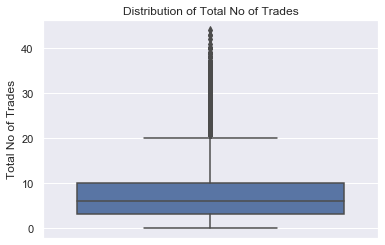

In [235]:
## 4.Total No of Trades
sns.boxplot(data = credit_df_clean, x = 'Total No of Trades', orient='v')
plt.title('Distribution of Total No of Trades')
plt.show()

In [236]:
credit_df_clean['Total No of Trades'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01     0.0
0.02     1.0
0.04     1.0
0.05     1.0
0.10     2.0
0.00     0.0
0.40     5.0
0.50     6.0
0.60     7.0
0.94    24.0
0.95    25.0
0.96    26.0
0.99    31.0
1.00    44.0
Name: Total No of Trades, dtype: float64

In [237]:
credit_df_clean["Total No of Trades"] = np.where(credit_df_clean["Total No of Trades"] >31,31,credit_df_clean['Total No of Trades'])

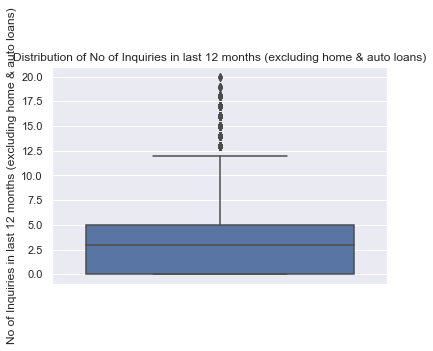

In [238]:
## 5.No of Inquiries in last 12 months (excluding home & auto loans)
sns.boxplot(data = credit_df_clean, x = 'No of Inquiries in last 12 months (excluding home & auto loans)', orient='v')
plt.title('Distribution of No of Inquiries in last 12 months (excluding home & auto loans)')
plt.show()

In [239]:
credit_df_clean['No of Inquiries in last 12 months (excluding home & auto loans)'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01     0.0
0.02     0.0
0.04     0.0
0.05     0.0
0.10     0.0
0.00     0.0
0.40     2.0
0.50     3.0
0.60     4.0
0.94    11.0
0.95    11.0
0.96    12.0
0.99    15.0
1.00    20.0
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: float64

In [240]:
credit_df_clean["No of Inquiries in last 12 months (excluding home & auto loans)"] = np.where(credit_df_clean["No of Inquiries in last 12 months (excluding home & auto loans)"] >15,15,credit_df_clean['No of Inquiries in last 12 months (excluding home & auto loans)'])

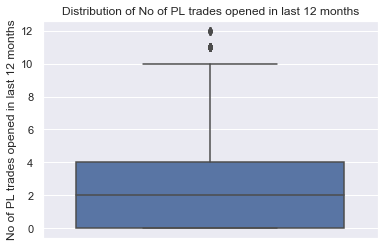

In [241]:
## 6.No of PL trades opened in last 12 months
sns.boxplot(data = credit_df_clean, x = 'No of PL trades opened in last 12 months', orient='v')
plt.title('Distribution of No of PL trades opened in last 12 months')
plt.show()

In [242]:
credit_df_clean['No of PL trades opened in last 12 months'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01     0.0
0.02     0.0
0.04     0.0
0.05     0.0
0.10     0.0
0.00     0.0
0.40     1.0
0.50     2.0
0.60     3.0
0.94     7.0
0.95     7.0
0.96     7.0
0.99     9.0
1.00    12.0
Name: No of PL trades opened in last 12 months, dtype: float64

In [243]:
credit_df_clean["No of PL trades opened in last 12 months"] = np.where(credit_df_clean["No of PL trades opened in last 12 months"] >9,9,credit_df_clean['No of PL trades opened in last 12 months'])

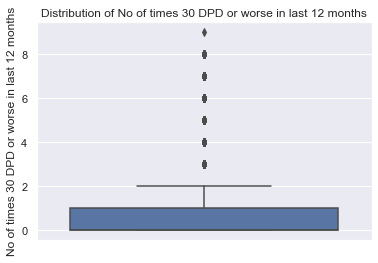

In [244]:
## 7.No of times 30 DPD or worse in last 12 months
sns.boxplot(data = credit_df_clean, x = 'No of times 30 DPD or worse in last 12 months', orient='v')
plt.title('Distribution of No of times 30 DPD or worse in last 12 months')
plt.show()

In [245]:
credit_df_clean["No of times 30 DPD or worse in last 12 months"] = np.where(credit_df_clean["No of times 30 DPD or worse in last 12 months"] >5,5,credit_df_clean['No of times 30 DPD or worse in last 12 months'])

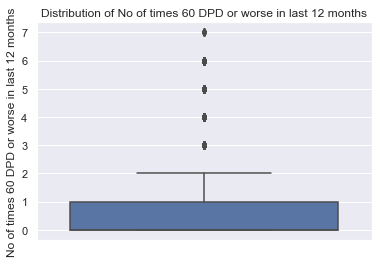

In [246]:
## 7.No of times 60 DPD or worse in last 12 months
sns.boxplot(data = credit_df_clean, x = 'No of times 60 DPD or worse in last 12 months', orient='v')
plt.title('Distribution of No of times 60 DPD or worse in last 12 months')
plt.show()

In [247]:
credit_df_clean['No of times 60 DPD or worse in last 12 months'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.2,0.3,0.4,0.5,0.6,0.90,0.94,0.95,0.96,0.99,1]) 

0.01    0.0
0.02    0.0
0.04    0.0
0.05    0.0
0.10    0.0
0.00    0.0
0.20    0.0
0.30    0.0
0.40    0.0
0.50    0.0
0.60    0.0
0.90    2.0
0.94    3.0
0.95    3.0
0.96    3.0
0.99    4.0
1.00    7.0
Name: No of times 60 DPD or worse in last 12 months, dtype: float64

In [248]:
credit_df_clean["No of times 60 DPD or worse in last 12 months"] = np.where(credit_df_clean["No of times 60 DPD or worse in last 12 months"] >2,2,credit_df_clean['No of times 60 DPD or worse in last 12 months'])

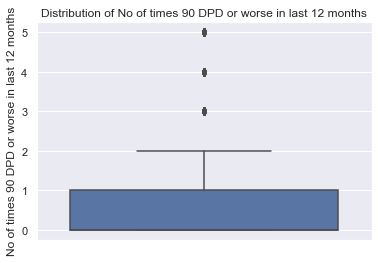

In [249]:
## 7.No of times 90 DPD or worse in last 12 months
sns.boxplot(data = credit_df_clean, x = 'No of times 90 DPD or worse in last 12 months', orient='v')
plt.title('Distribution of No of times 90 DPD or worse in last 12 months')
plt.show()

In [250]:
credit_df_clean['No of times 90 DPD or worse in last 12 months'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01    0.0
0.02    0.0
0.04    0.0
0.05    0.0
0.10    0.0
0.00    0.0
0.40    0.0
0.50    0.0
0.60    0.0
0.94    2.0
0.95    2.0
0.96    2.0
0.99    3.0
1.00    5.0
Name: No of times 90 DPD or worse in last 12 months, dtype: float64

In [251]:
credit_df_clean["No of times 90 DPD or worse in last 12 months"] = np.where(credit_df_clean["No of times 90 DPD or worse in last 12 months"] >2,2,credit_df_clean['No of times 90 DPD or worse in last 12 months'])

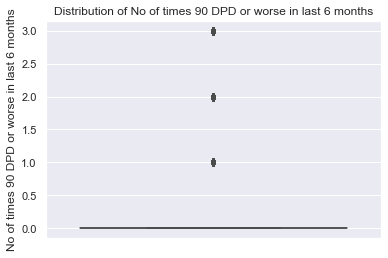

In [252]:
## 8.No of times 90 DPD or worse in last 6 months
sns.boxplot(data = credit_df_clean, x = 'No of times 90 DPD or worse in last 6 months', orient='v')
plt.title('Distribution of No of times 90 DPD or worse in last 6 months')
plt.show()

In [253]:
credit_df_clean['No of times 90 DPD or worse in last 6 months'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01    0.0
0.02    0.0
0.04    0.0
0.05    0.0
0.10    0.0
0.00    0.0
0.40    0.0
0.50    0.0
0.60    0.0
0.94    1.0
0.95    1.0
0.96    1.0
0.99    2.0
1.00    3.0
Name: No of times 90 DPD or worse in last 6 months, dtype: float64

In [254]:
credit_df_clean["No of times 90 DPD or worse in last 6 months"] = np.where(credit_df_clean["No of times 90 DPD or worse in last 6 months"] >1,1,credit_df_clean['No of times 90 DPD or worse in last 6 months'])

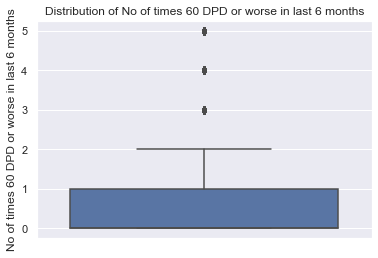

In [255]:
## 9.No of times 60 DPD or worse in last 6 months
sns.boxplot(data = credit_df_clean, x = 'No of times 60 DPD or worse in last 6 months', orient='v')
plt.title('Distribution of No of times 60 DPD or worse in last 6 months')
plt.show()

In [256]:
credit_df_clean['No of times 60 DPD or worse in last 6 months'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01    0.0
0.02    0.0
0.04    0.0
0.05    0.0
0.10    0.0
0.00    0.0
0.40    0.0
0.50    0.0
0.60    0.0
0.94    2.0
0.95    2.0
0.96    2.0
0.99    3.0
1.00    5.0
Name: No of times 60 DPD or worse in last 6 months, dtype: float64

In [257]:
credit_df_clean["No of times 60 DPD or worse in last 6 months"] = np.where(credit_df_clean["No of times 60 DPD or worse in last 6 months"] >2,2,credit_df_clean['No of times 60 DPD or worse in last 6 months'])

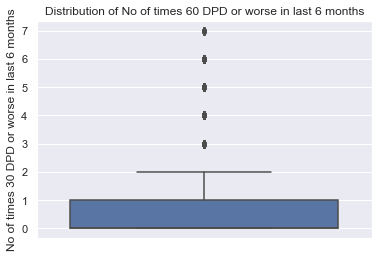

In [258]:
## 9.No of times 30 DPD or worse in last 6 months
sns.boxplot(data = credit_df_clean, x = 'No of times 30 DPD or worse in last 6 months', orient='v')
plt.title('Distribution of No of times 60 DPD or worse in last 6 months')
plt.show()

In [259]:
credit_df_clean['No of times 30 DPD or worse in last 6 months'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.90,0.91,0.92,0.94,0.95,0.96,0.99,1]) 

0.01    0.0
0.02    0.0
0.04    0.0
0.05    0.0
0.10    0.0
0.00    0.0
0.40    0.0
0.50    0.0
0.60    0.0
0.90    2.0
0.91    2.0
0.92    2.0
0.94    3.0
0.95    3.0
0.96    3.0
0.99    4.0
1.00    7.0
Name: No of times 30 DPD or worse in last 6 months, dtype: float64

In [260]:
credit_df_clean["No of times 30 DPD or worse in last 6 months"] = np.where(credit_df_clean["No of times 30 DPD or worse in last 6 months"] >2,2,credit_df_clean['No of times 30 DPD or worse in last 6 months'])

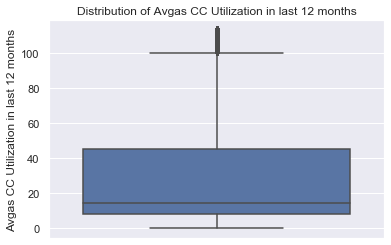

In [261]:
## 10.Avgas CC Utilization in last 12 months
sns.boxplot(data = credit_df_clean, x = 'Avgas CC Utilization in last 12 months', orient='v')
plt.title('Distribution of Avgas CC Utilization in last 12 months')
plt.show()

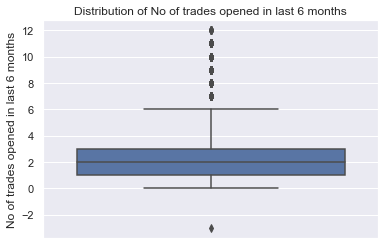

In [262]:
## 11.No of trades opened in last 6 months
sns.boxplot(data = credit_df_clean, x = 'No of trades opened in last 6 months', orient='v')
plt.title('Distribution of No of trades opened in last 6 months')
plt.show()

In [263]:
credit_df_clean['No of trades opened in last 6 months'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.90,0.91,0.92,0.94,0.95,0.96,0.99,1]) 

0.01     0.000000
0.02     0.000000
0.04     0.000000
0.05     0.000000
0.10     0.000000
0.00    -3.016999
0.40     1.000000
0.50     2.000000
0.60     2.000000
0.90     5.000000
0.91     5.000000
0.92     6.000000
0.94     6.000000
0.95     7.000000
0.96     7.000000
0.99     9.000000
1.00    12.000000
Name: No of trades opened in last 6 months, dtype: float64

In [264]:
credit_df_clean["No of trades opened in last 6 months"] = np.where(credit_df_clean["No of trades opened in last 6 months"] >7,7,credit_df_clean['No of trades opened in last 6 months'])

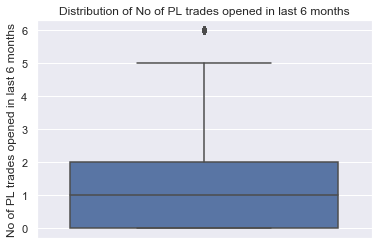

In [265]:
## 12.No of PL trades opened in last 6 months
sns.boxplot(data = credit_df_clean, x = 'No of PL trades opened in last 6 months', orient='v')
plt.title('Distribution of No of PL trades opened in last 6 months')
plt.show()

In [266]:
credit_df_clean['No of PL trades opened in last 6 months'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01    0.0
0.02    0.0
0.04    0.0
0.05    0.0
0.10    0.0
0.00    0.0
0.40    0.0
0.50    1.0
0.60    1.0
0.94    4.0
0.95    4.0
0.96    4.0
0.99    5.0
1.00    6.0
Name: No of PL trades opened in last 6 months, dtype: float64

In [267]:
credit_df_clean["No of PL trades opened in last 6 months"] = np.where(credit_df_clean["No of PL trades opened in last 6 months"] >4,4,credit_df_clean['No of PL trades opened in last 6 months'])

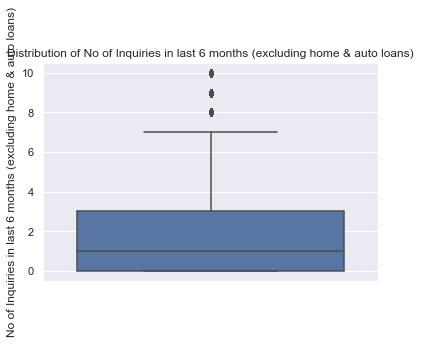

In [268]:
## 13.No of Inquiries in last 6 months (excluding home & auto loans)
sns.boxplot(data = credit_df_clean, x = 'No of Inquiries in last 6 months (excluding home & auto loans)', orient='v')
plt.title('Distribution of No of Inquiries in last 6 months (excluding home & auto loans)')
plt.show()

In [269]:
credit_df_clean['No of Inquiries in last 6 months (excluding home & auto loans)'].quantile([0.01,0.02,0.04,0.05,0.1,0,0.4,0.5,0.6,0.94,0.95,0.96,0.99,1]) 

0.01     0.0
0.02     0.0
0.04     0.0
0.05     0.0
0.10     0.0
0.00     0.0
0.40     1.0
0.50     1.0
0.60     2.0
0.94     6.0
0.95     6.0
0.96     6.0
0.99     8.0
1.00    10.0
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: float64

In [270]:
credit_df_clean["No of Inquiries in last 6 months (excluding home & auto loans)"] = np.where(credit_df_clean["No of Inquiries in last 6 months (excluding home & auto loans)"] >6,6,credit_df_clean['No of Inquiries in last 6 months (excluding home & auto loans)'])

In [271]:
#Now we will check to see if all the application id were present in both the data
credit_df_clean['Application ID'].isin(demo_df_clean['Application ID']).value_counts()

True    69737
Name: Application ID, dtype: int64

In [272]:
# Taking backup of the datasets
credit_bf_model =credit_df_clean.copy()
demo_bf_model = demo_df_clean.copy()

### Model Building and Evaluation for Demographic data

In [273]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import statsmodels.api as sm

### Creating WOE Dataframe of Demographic

In [274]:
##Binning Categorical Demographic Data
cat_data_demo = demo_df_clean.select_dtypes('object')
cat_data_demo['target'] = demo_df_clean['target']
cat_data_demo.nunique().sort_values(ascending=False)
cat_combine_demo_data_bin = woebin(cat_data_demo, y="target", stop_limit=0.01)

In [275]:
# Binning Numerical Demographic Data
num_demo_data = demo_df_clean.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
num_combine_demo_data_bin = woebin(num_demo_data, y="target", stop_limit=0.01)

Binning on 69737 rows and 6 columns in 00:00:16


In [276]:
num_demo_data_woe = woebin_ply(num_demo_data, num_combine_demo_data_bin)
cat_demo_data_woe = woebin_ply(cat_demo_data, cat_combine_demo_data_bin)

In [277]:
demo_iv_list = {}
all_combine_demo_bin = dict(cat_combine_demo_data_bin, **num_combine_demo_data_bin)

In [278]:
del_by_iv = []
iv_list_demo = {}
for feature, df in all_combine_demo_bin.items():
    iv = df['total_iv'].iloc[0]
    iv_list_demo[feature + '_woe'] = iv
df_iv_demo_list=pd.DataFrame(list(iv_list_demo.items()),columns = ['Variable', 'IV'])
df_iv_demo_list.sort_values(by='IV', ascending=False)

Variable        IV
9             No of months in current residence_woe  0.094518
7                                        Income_woe  0.045757
6               No of months in current company_woe  0.033358
8                                           Age_woe  0.006919
3                              No of dependents_woe  0.002653
10                               Application ID_woe  0.002322
4                                    Profession_woe  0.002172
5                                        Gender_woe  0.000334
0                                     Education_woe  0.000283
1                             Type of residence_woe  0.000108
2   Marital Status (at the time of application)_woe  0.000100

In [279]:
demo_data_woe=pd.merge(left=num_demo_data_woe, right=cat_demo_data_woe.drop(columns='target'),
                     left_index=True, right_index=True)

In [280]:
demo_data_woe.head()

target  No of months in current company_woe  Income_woe   Age_woe  \
0       1                             0.194051    0.300228 -0.038804   
1       1                             0.110955    0.386253  0.028339   
2       1                             0.110955    0.116218  0.028339   
3       1                             0.404637    0.386253 -0.025320   
4       1                             0.110955    0.300228 -0.074643   

   No of months in current residence_woe  Application ID_woe  Education_woe  \
0                               0.058858           -0.014641      -0.019988   
1                               0.058858           -0.089762       0.017501   
2                               0.058858           -0.014641      -0.019988   
3                               0.058858           -0.089762      -0.019988   
4                               0.058858            0.082503       0.017501   

   Type of residence_woe  Marital Status (at the time of application)_woe  \
0               0.006003                                         0.004180   
1               0.006003                                         0.004180   
2               0.006003                                        -0.023815   
3               0.006003                                         0.004180   
4               0.006003                                         0.004180   

   No of dependents_woe  Profession_woe  Gender_woe  
0              0.084668        0.028233   -0.032523  
1              0.024352        0.012542    0.010264  
2              0.084668        0.012542    0.010264  
3             -0.040431       -0.090134    0.010264  
4             -0.000931        0.028233   -0.032523

In [281]:
demo_data_woe.columns

Index(['target', 'No of months in current company_woe', 'Income_woe',
       'Age_woe', 'No of months in current residence_woe',
       'Application ID_woe', 'Education_woe', 'Type of residence_woe',
       'Marital Status (at the time of application)_woe',
       'No of dependents_woe', 'Profession_woe', 'Gender_woe'],
      dtype='object')

In [282]:
demo_data_woe['target'].value_counts()

1    66792
0     2945
Name: target, dtype: int64

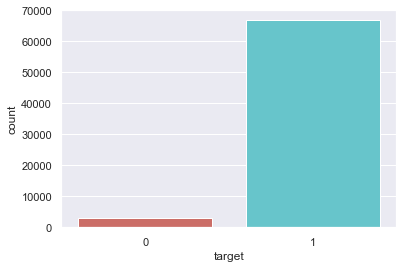

In [283]:
sns.countplot(x='target',data=demo_data_woe, palette='hls')
plt.show()

In [284]:
len(demo_data_woe[demo_data_woe['target']==0])/len(demo_data_woe[demo_data_woe['target']==1])*100

4.4092106839142415

##### Only around 4.4% of observations are under default category. The data is highly imbalanced and hence class balancing is to be performed.

### Looking at Correlations

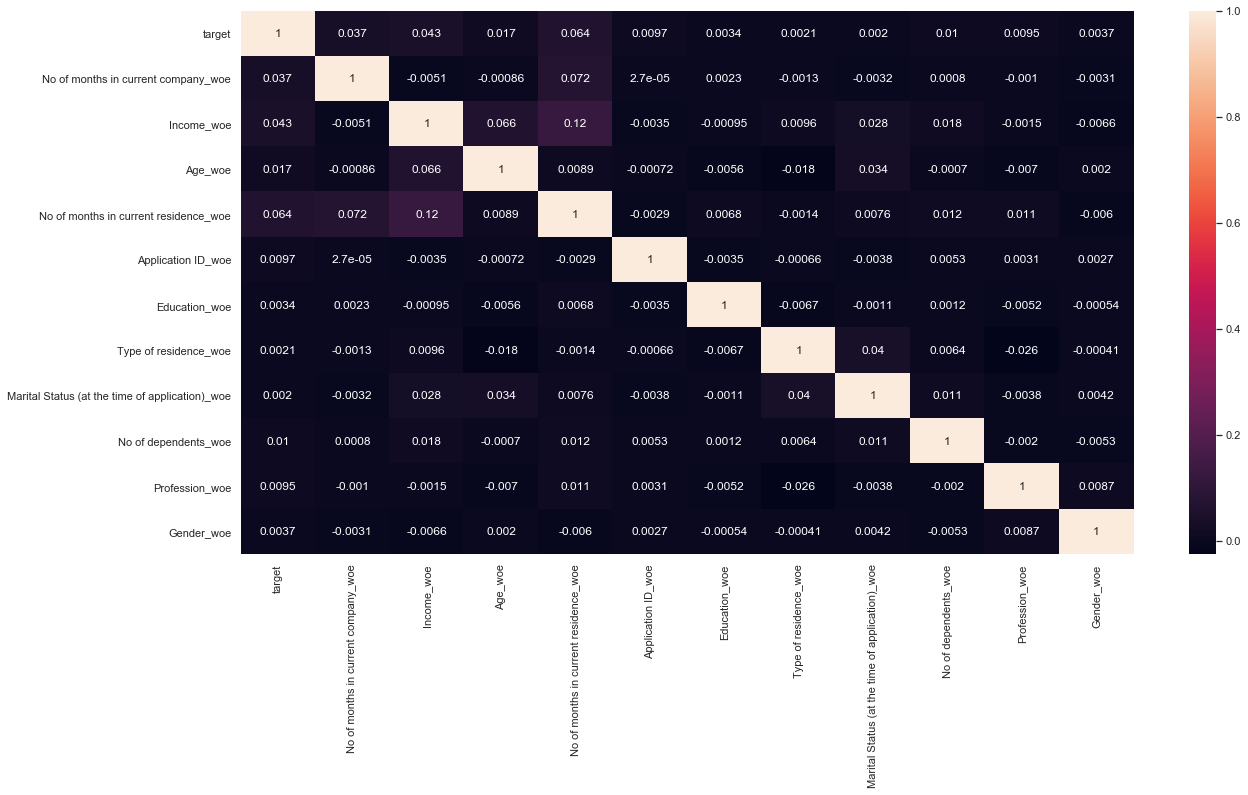

In [285]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(demo_data_woe.corr(),annot = True)
plt.show()

### Test-Train Split

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
# Putting feature variable to X
X = demo_data_woe.drop(['target','Application ID_woe'], axis=1)

X.head()

No of months in current company_woe  Income_woe   Age_woe  \
0                             0.194051    0.300228 -0.038804   
1                             0.110955    0.386253  0.028339   
2                             0.110955    0.116218  0.028339   
3                             0.404637    0.386253 -0.025320   
4                             0.110955    0.300228 -0.074643   

   No of months in current residence_woe  Education_woe  \
0                               0.058858      -0.019988   
1                               0.058858       0.017501   
2                               0.058858      -0.019988   
3                               0.058858      -0.019988   
4                               0.058858       0.017501   

   Type of residence_woe  Marital Status (at the time of application)_woe  \
0               0.006003                                         0.004180   
1               0.006003                                         0.004180   
2               0.006003                                        -0.023815   
3               0.006003                                         0.004180   
4               0.006003                                         0.004180   

   No of dependents_woe  Profession_woe  Gender_woe  
0              0.084668        0.028233   -0.032523  
1              0.024352        0.012542    0.010264  
2              0.084668        0.012542    0.010264  
3             -0.040431       -0.090134    0.010264  
4             -0.000931        0.028233   -0.032523

In [288]:
# Putting response variable to y
y = demo_data_woe['target']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [289]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [290]:
X_train.head()

No of months in current company_woe  Income_woe   Age_woe  \
18046                             0.110955   -0.028985  0.028339   
61397                             0.110955   -0.028985 -0.074643   
30040                            -0.120225   -0.332041 -0.074643   
21392                             0.020323   -0.088902  0.111339   
7653                              0.020323   -0.028985  0.028339   

       No of months in current residence_woe  Education_woe  \
18046                               0.303214      -0.019988   
61397                               0.058858       0.017501   
30040                               0.303214      -0.008380   
21392                               0.303214      -0.008380   
7653                                0.058858      -0.008380   

       Type of residence_woe  Marital Status (at the time of application)_woe  \
18046               0.006003                                          0.00418   
61397               0.006003                                          0.00418   
30040               0.006003                                          0.00418   
21392               0.006003                                          0.00418   
7653                0.006003                                          0.00418   

       No of dependents_woe  Profession_woe  Gender_woe  
18046              0.084668        0.012542    0.010264  
61397             -0.000931        0.012542    0.010264  
30040             -0.055063        0.028233   -0.032523  
21392              0.024352        0.028233    0.010264  
7653              -0.055063       -0.090134    0.010264

### Feature Scaling

In [291]:
from sklearn.preprocessing import StandardScaler

In [292]:
num_col=X.columns
num_col

Index(['No of months in current company_woe', 'Income_woe', 'Age_woe',
       'No of months in current residence_woe', 'Education_woe',
       'Type of residence_woe',
       'Marital Status (at the time of application)_woe',
       'No of dependents_woe', 'Profession_woe', 'Gender_woe'],
      dtype='object')

In [293]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

X_train.head()

No of months in current company_woe  Income_woe   Age_woe  \
18046                             0.523510   -0.226152  0.299977   
61397                             0.523510   -0.226152 -0.929413   
30040                            -0.747949   -1.634646 -0.929413   
21392                             0.025044   -0.504623  1.290821   
7653                              0.025044   -0.226152  0.299977   

       No of months in current residence_woe  Education_woe  \
18046                               0.876328      -1.193567   
61397                               0.054830       1.035763   
30040                               0.876328      -0.503291   
21392                               0.876328      -0.503291   
7653                                0.054830      -0.503291   

       Type of residence_woe  Marital Status (at the time of application)_woe  \
18046               0.575939                                         0.415543   
61397               0.575939                                         0.415543   
30040               0.575939                                         0.415543   
21392               0.575939                                         0.415543   
7653                0.575939                                         0.415543   

       No of dependents_woe  Profession_woe  Gender_woe  
18046              1.613727        0.254179    0.555841  
61397             -0.038488        0.254179    0.555841  
30040             -1.083318        0.595318   -1.799077  
21392              0.449521        0.595318    0.555841  
7653              -1.083318       -1.978026    0.555841

In [294]:

X_test[num_col] = scaler.transform(X_test[num_col])

X_test.head()

No of months in current company_woe  Income_woe   Age_woe  \
22826                             0.523510    1.303916 -0.501576   
13012                             0.025044   -0.226152 -0.340608   
31295                            -1.148145    1.703728  1.536837   
4655                              0.467067   -0.226152  0.299977   
29901                             0.523510   -1.634646 -0.929413   

       No of months in current residence_woe  Education_woe  \
22826                               0.876328      -1.193567   
13012                               0.876328       1.035763   
31295                               0.876328      -1.193567   
4655                                0.054830       1.035763   
29901                               0.876328       1.035763   

       Type of residence_woe  Marital Status (at the time of application)_woe  \
22826               0.575939                                         0.415543   
13012               0.575939                                         0.415543   
31295               0.575939                                         0.415543   
4655                0.575939                                         0.415543   
29901               0.575939                                        -2.406487   

       No of dependents_woe  Profession_woe  Gender_woe  
22826              1.613727       -1.978026    0.555841  
13012             -0.038488        0.254179    0.555841  
31295             -0.800911        0.595318    0.555841  
4655               0.449521        0.595318    0.555841  
29901             -1.083318        0.595318    0.555841

### Model Building

#### parallel K-fold crossover, combined performance

In [295]:
from sklearn.model_selection import train_test_split, KFold

In [296]:
from sklearn.feature_selection import RFECV
from sklearn import metrics

In [297]:
params_lr = {'solver':'liblinear', 'n_jobs':-1,'random_state':0, 'class_weight':'balanced'}
scores_dict = {'validation': [], 'test': []}

In [298]:
lr = LogisticRegression(**params_lr)
rfecv = RFECV(estimator=lr, step=1, cv=KFold(5),scoring='roc_auc')
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
print("Max score of features : {0}".format(rfecv.grid_scores_.max()))

Optimal number of features : 5
Max score of features : 0.6109783928527286


In [299]:
train_pred = rfecv.predict_proba(X_train)[:,1]
test_pred = rfecv.predict_proba(X_test)[:,1]

In [300]:
# Predicting the Test set results
y_pred0 = rfecv.predict(X_test)

# Making the Confusion Matrix
cm0 = confusion_matrix(y_test, y_pred0)
print (cm0)

print (classification_report(y_test, y_pred0))
print("Accuracy:- ",metrics.accuracy_score(y_test, y_pred0))

[[  512   389]
 [ 7947 12074]]
              precision    recall  f1-score   support

           0       0.06      0.57      0.11       901
           1       0.97      0.60      0.74     20021

    accuracy                           0.60     20922
   macro avg       0.51      0.59      0.43     20922
weighted avg       0.93      0.60      0.72     20922

Accuracy:-  0.601567727750693


##### Metrics beyond simply accuracy

In [301]:
TP = cm0[1,1] # true positive 
TN = cm0[0,0] # true negatives
FP = cm0[0,1] # false positives
FN = cm0[1,0] # false negatives

In [302]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6030667798811248

In [303]:
# Let us calculate specificity
TN / float(TN+FP)

0.5682574916759157

In [304]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.43174250832408434


In [305]:
# positive predictive value 
print (TP / float(TP+FP))

0.9687876113295354


In [306]:
# Negative predictive value
print (TN / float(TN+ FN))

0.060527249083816057


In [307]:
y_pred1_prob = rfecv.predict_proba(X_test)

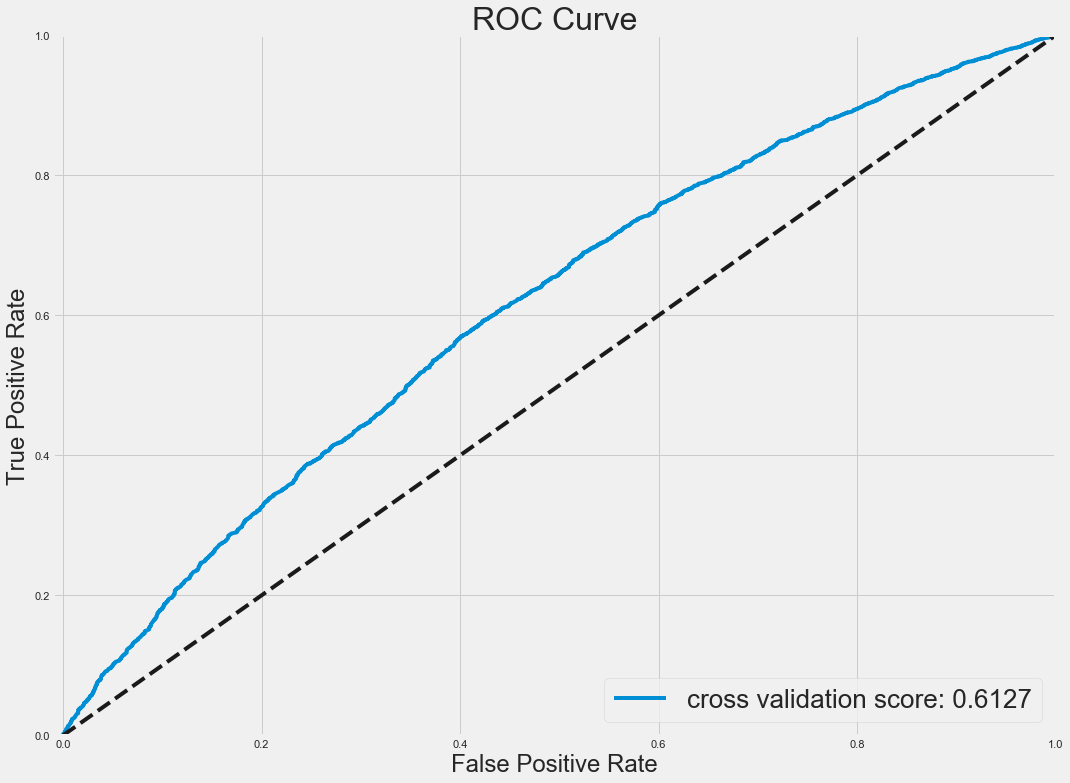

In [308]:
# %%
from sklearn.metrics import roc_curve
fpr, tpr, thresold = roc_curve(y_train, train_pred)
plt.style.use('fivethirtyeight')
def graph_roc_curve(fpr, tpr, y, predict):
    plt.figure(figsize=(16,12))
    plt.title('ROC Curve', fontsize=32)
    plt.plot(fpr, tpr, label='cross validation score: {:.4f}'.format(roc_auc_score(y, predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=24)
    plt.ylabel('True Positive Rate', fontsize=24)
    plt.legend(loc='lower right', prop={'size': 26})
graph_roc_curve(fpr, tpr, y_train, train_pred)

In [309]:
# %% Lift Curve
def graph_lift_curve(y_actual, y_predict):
    df = pd.DataFrame({0:1- y_predict, 1:y_predict}).values
    from matplotlib.ticker import FuncFormatter
    import scikitplot as skplt
    ax = skplt.metrics.plot_lift_curve(y_actual, df,
                                      figsize = (16,12),
                                      title_fontsize = 36,
                                      text_fontsize = 24)
    ax.legend(['Y = 0', 'Y = 1', 'Baseline'], loc = 'upper right', fontsize=36)
    ax.xaxis.set_ticks(np.arange(0, 11, 1.0)/10)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.xaxis.label.set_size(32)
    ax.yaxis.label.set_size(32)

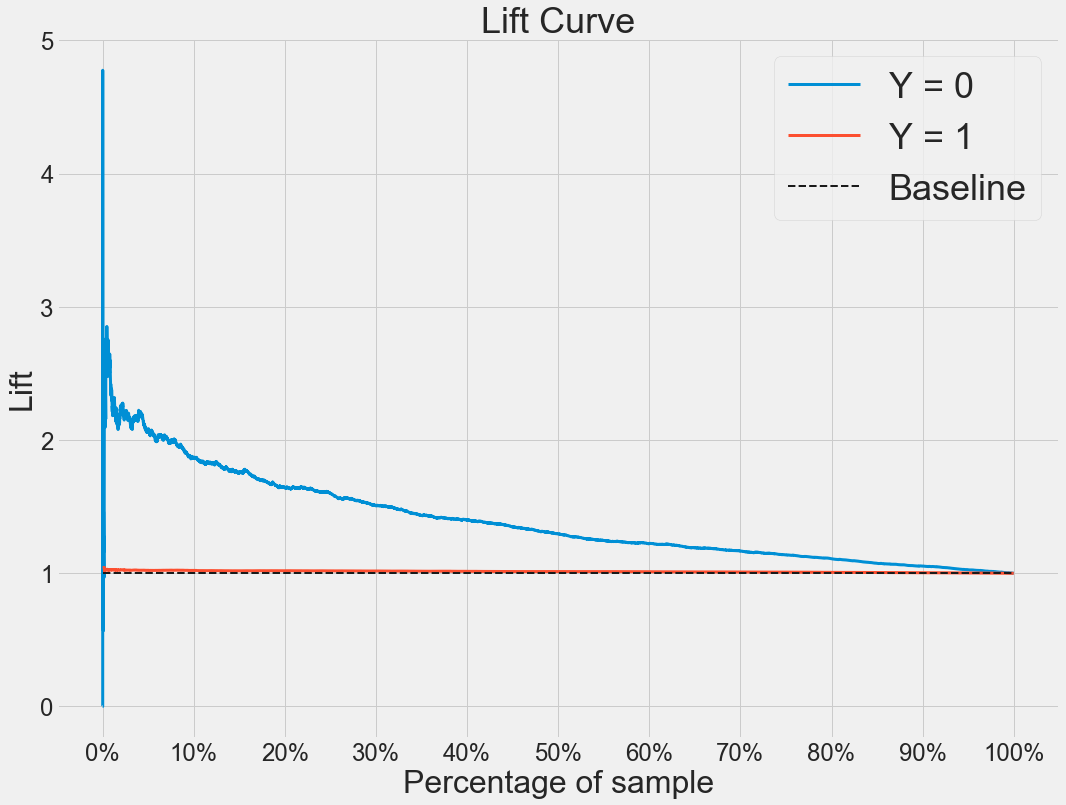

In [310]:
graph_lift_curve(y_train, train_pred)

<Figure size 864x648 with 0 Axes>

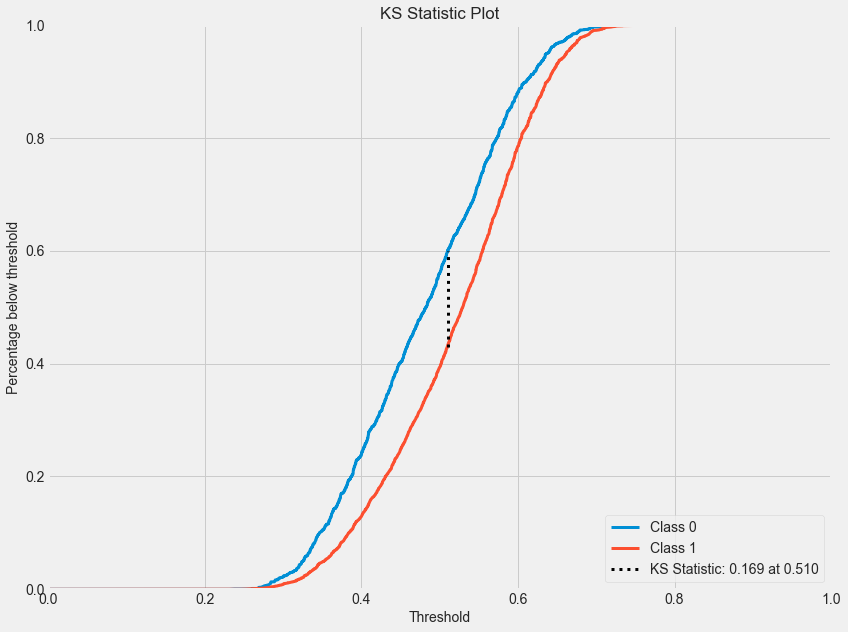

In [311]:
### K-S curve
import scikitplot as skplt
plt.figure(figsize=(12,9))
pred = rfecv.predict_proba(X_train)
fig, ax = plt.subplots(figsize=(12,9), tight_layout=True)
skplt.metrics.plot_ks_statistic(y_train, pred, ax=ax)
plt.show()

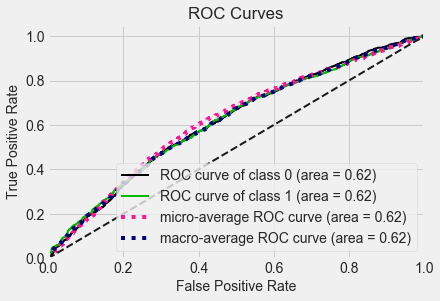

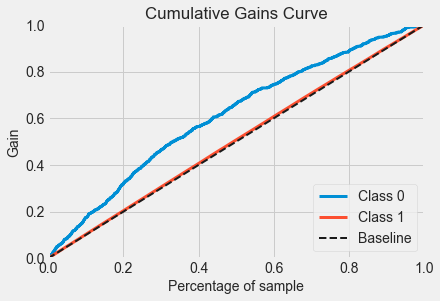

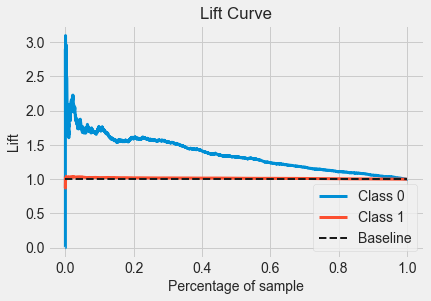

In [312]:
prc(y_test, y_pred1_prob)
pcg(y_test, y_pred1_prob)
plc(y_test, y_pred1_prob)

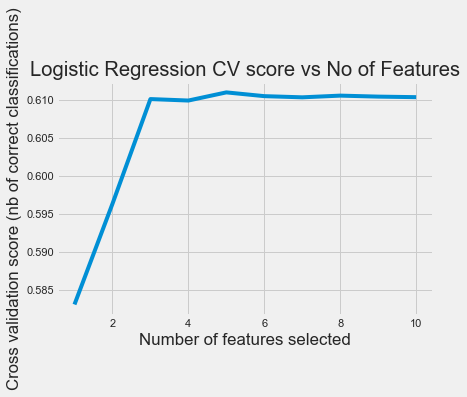

In [313]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [314]:
feature_importance = list(zip(X_train.columns, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['No of months in current company_woe', 'Income_woe', 'Age_woe', 'No of months in current residence_woe', 'Profession_woe']


Improtant Features Obtained By RFECV are :-
<br>'Age_woe' </br>
<br>'Income_woe'</br>
<br>'No of months in current company_woe' </br>
<br>'No of months in current residence_woe' </br> 
<br>'Profession_woe'</br>

#### We can do a comparison of the model with original features and the RFECV selected features to see if there is an improvement in the accuracy scores.

#### Creating Model by Selectiing Important Features

In [315]:
col_lr=['Age_woe', 'Income_woe', 'No of months in current company_woe', 'No of months in current residence_woe', 'Profession_woe']
lr_new = LogisticRegression(random_state=0, class_weight='balanced')
#rfecv_new = RFECV(estimator=lr, step=1, cv=KFold(5),scoring='roc_auc')
lr_new.fit(X_train[col_lr], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
train_pred = lr_new.predict_proba(X_train[col_lr])[:,1]
test_pred = lr_new.predict_proba(X_test[col_lr])[:,1]

In [317]:
# Predicting the Test set results
y_pred1 = lr_new.predict(X_test[col_lr])

# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred1)
print (cm1)
print (classification_report(y_test, y_pred1))
print("Accuracy:- ",metrics.accuracy_score(y_test, y_pred1))

[[  512   389]
 [ 7947 12074]]
              precision    recall  f1-score   support

           0       0.06      0.57      0.11       901
           1       0.97      0.60      0.74     20021

    accuracy                           0.60     20922
   macro avg       0.51      0.59      0.43     20922
weighted avg       0.93      0.60      0.72     20922

Accuracy:-  0.601567727750693


###### By observing the accuracy there is a slight increase in the accuracy after feeding the selected features to the model.

In [318]:
TP = cm1[1,1] # true positive 
TN = cm1[0,0] # true negatives
FP = cm1[0,1] # false positives
FN = cm1[1,0] # false negatives

In [319]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6030667798811248

In [320]:
# Let us calculate specificity
TN / float(TN+FP)

0.5682574916759157

In [321]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.43174250832408434


In [322]:
# positive predictive value 
print (TP / float(TP+FP))

0.9687876113295354


In [323]:
# Negative predictive value
print (TN / float(TN+ FN))

0.060527249083816057


In [324]:
y_pred1_prob = lr_new.predict_proba(X_test[col_lr])

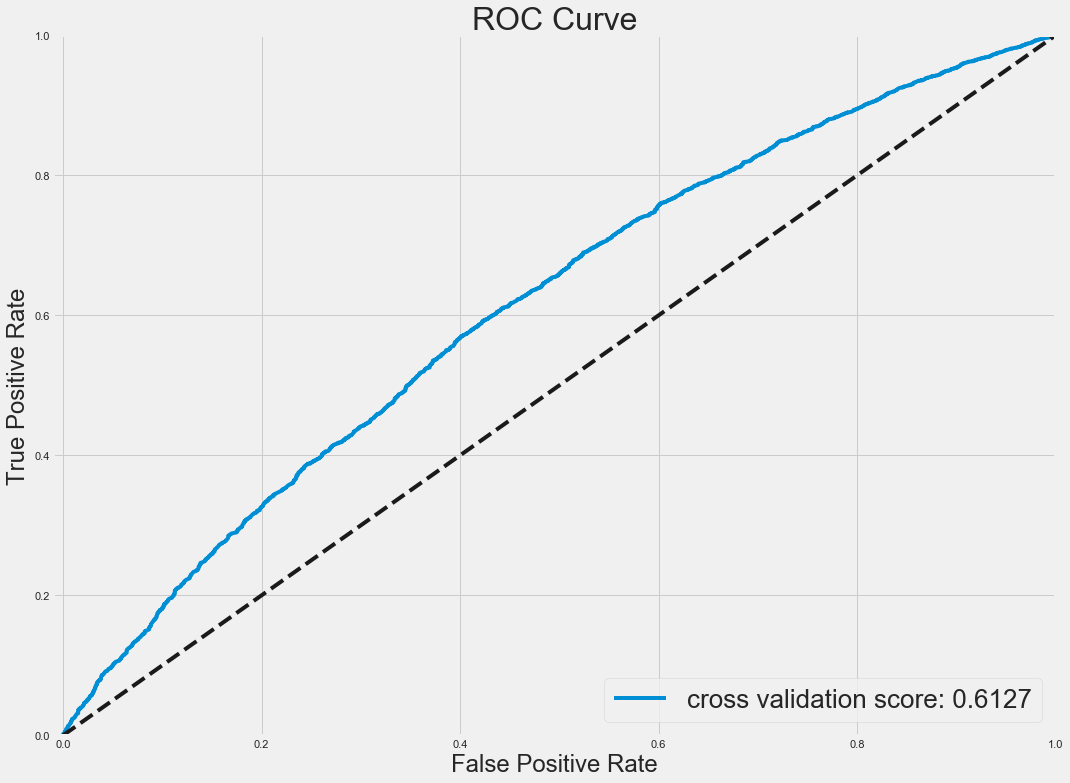

In [325]:
# %%
from sklearn.metrics import roc_curve
fpr, tpr, thresold = roc_curve(y_train, train_pred)
plt.style.use('fivethirtyeight')
def graph_roc_curve(fpr, tpr, y, predict):
    plt.figure(figsize=(16,12))
    plt.title('ROC Curve', fontsize=32)
    plt.plot(fpr, tpr, label='cross validation score: {:.4f}'.format(roc_auc_score(y, predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=24)
    plt.ylabel('True Positive Rate', fontsize=24)
    plt.legend(loc='lower right', prop={'size': 26})
graph_roc_curve(fpr, tpr, y_train, train_pred)

In [326]:
# %% Lift Curve
def graph_lift_curve(y_actual, y_predict):
    df = pd.DataFrame({0:1- y_predict, 1:y_predict}).values
    from matplotlib.ticker import FuncFormatter
    import scikitplot as skplt
    ax = skplt.metrics.plot_lift_curve(y_actual, df,
                                      figsize = (16,12),
                                      title_fontsize = 36,
                                      text_fontsize = 24)
    ax.legend(['Y = 0', 'Y = 1', 'Baseline'], loc = 'upper right', fontsize=36)
    ax.xaxis.set_ticks(np.arange(0, 11, 1.0)/10)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.xaxis.label.set_size(32)
    ax.yaxis.label.set_size(32)

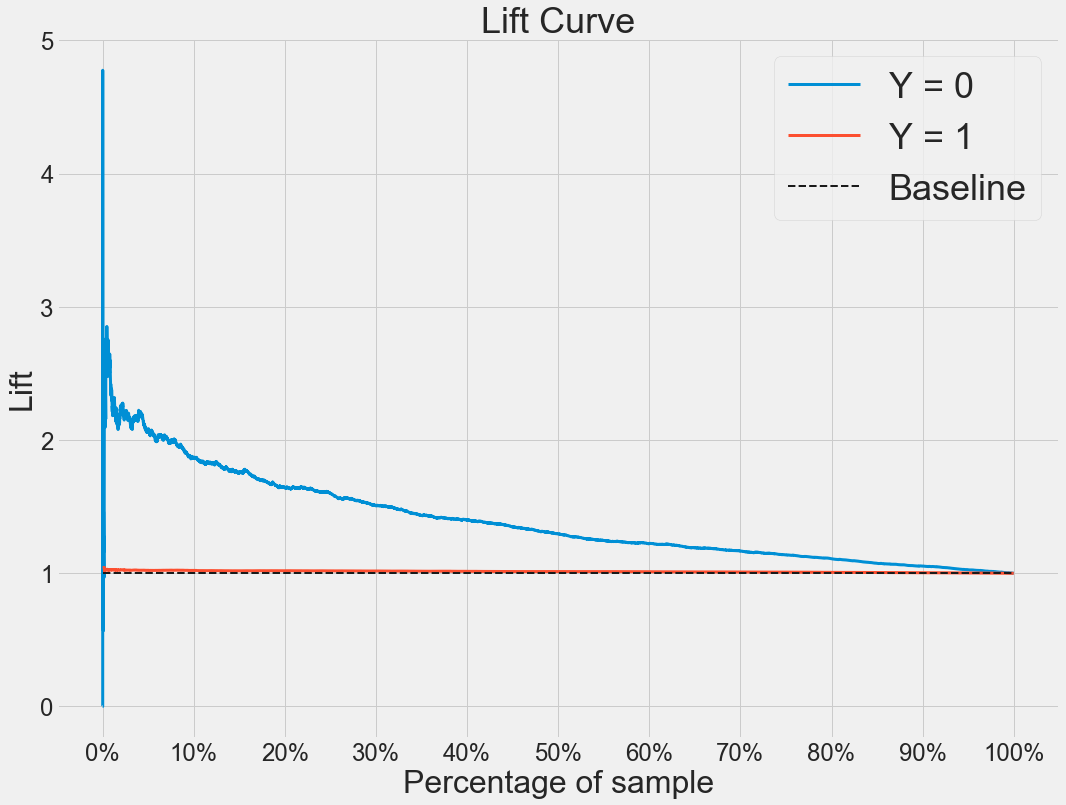

In [327]:
graph_lift_curve(y_train, train_pred)

<Figure size 864x648 with 0 Axes>

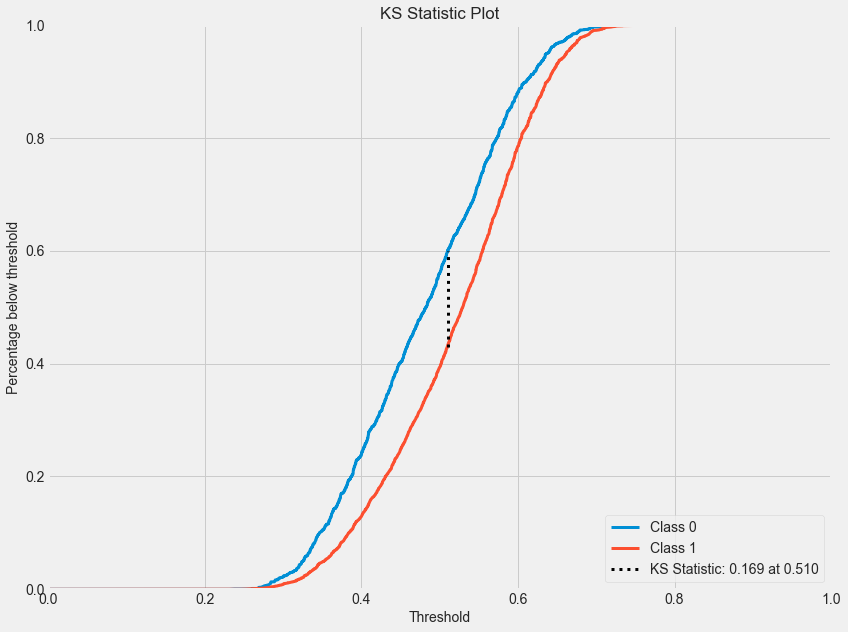

In [328]:
### K-S curve
import scikitplot as skplt
plt.figure(figsize=(12,9))
pred = lr_new.predict_proba(X_train[col_lr])
fig, ax = plt.subplots(figsize=(12,9), tight_layout=True)
skplt.metrics.plot_ks_statistic(y_train, pred, ax=ax)
plt.show()

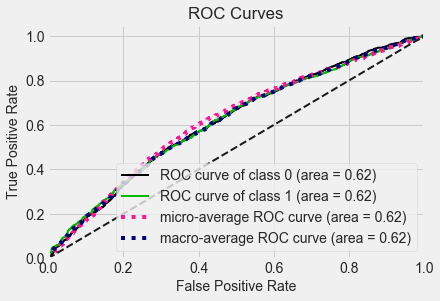

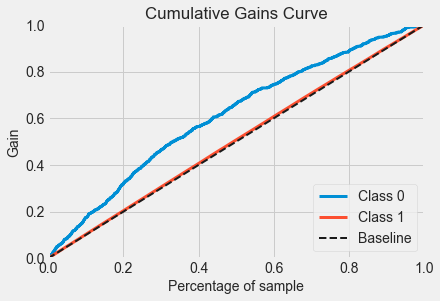

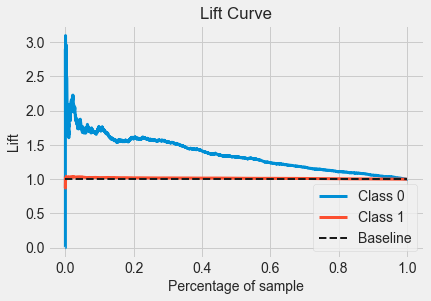

In [329]:
prc(y_test, y_pred1_prob)
pcg(y_test, y_pred1_prob)
plc(y_test, y_pred1_prob)

### RandomForest Classifier

In [330]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
params_rf = {'max_depth': 11,
 'max_leaf_nodes': 29,
 'min_samples_leaf': 18,
 'min_samples_split': 20,
 'n_estimators': 390,
 'n_jobs': -1,
'random_state':0,'class_weight':"balanced"}

In [332]:
rf = RandomForestClassifier(**params_rf)
#rfecv_rf = RFECV(estimator=rf, step=1, cv=KFold(5),scoring='roc_auc')
rf.fit(X_train[col_lr],y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=29, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=18,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=390, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

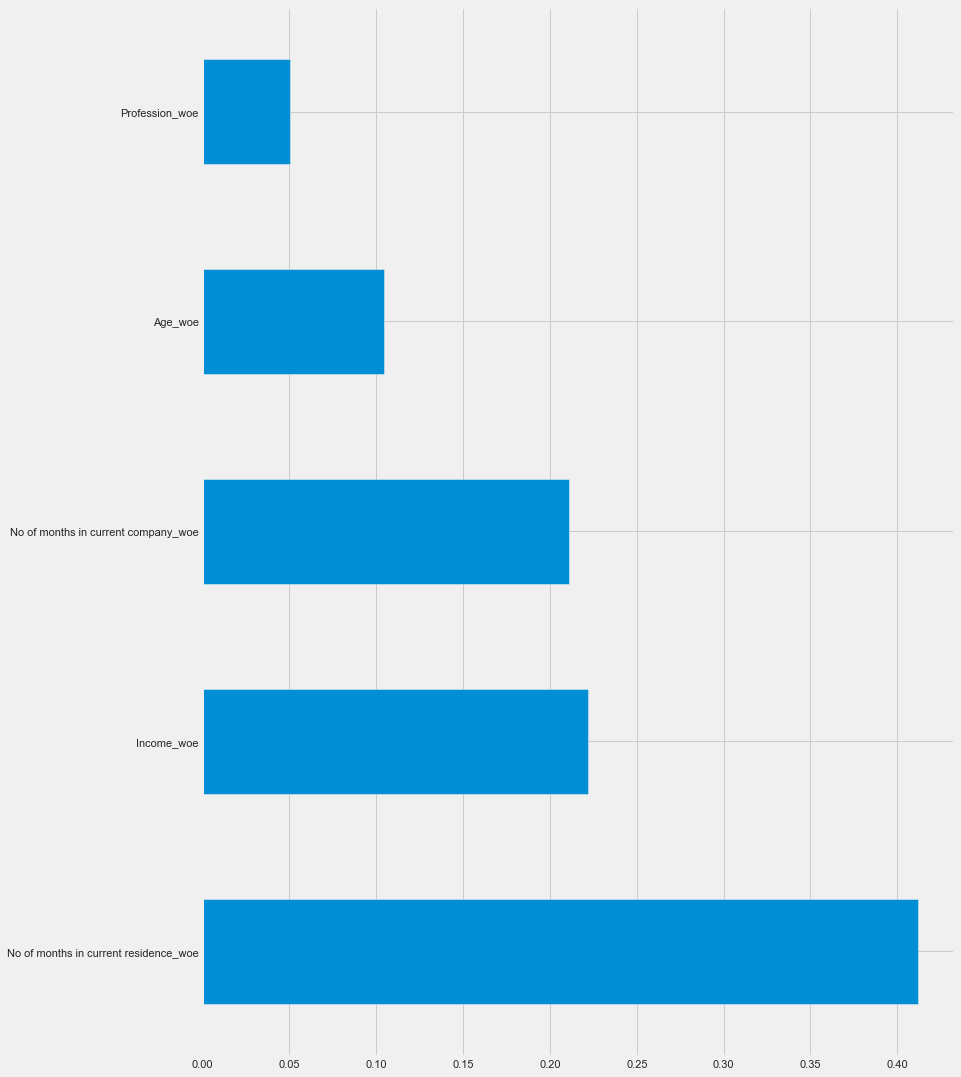

In [333]:
## Sort feature importances in descending order
plt.figure(figsize=(12,18))
feat_importances = pd.Series(rf.feature_importances_, index=X_train[col_lr].columns)
feat_importances.nlargest(10).plot(kind='barh')

In [334]:
train_pred_rf =rf.predict_proba(X_train[col_lr])[:,1]
test_pred_rf = rf.predict_proba(X_test[col_lr])[:,1]

In [335]:
# Predicting the Test set results
y_pred_rf = rf.predict(X_test[col_lr])

# Making the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print (cm_rf)

print (classification_report(y_test, y_pred_rf))
print("Accuracy:- ",metrics.accuracy_score(y_test, y_pred_rf))

[[  444   457]
 [ 6626 13395]]
              precision    recall  f1-score   support

           0       0.06      0.49      0.11       901
           1       0.97      0.67      0.79     20021

    accuracy                           0.66     20922
   macro avg       0.51      0.58      0.45     20922
weighted avg       0.93      0.66      0.76     20922

Accuracy:-  0.6614568396902781


##### Metrics beyond simply accuracy

In [336]:
TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives

In [337]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6690475001248689

In [338]:
# Let us calculate specificity
TN / float(TN+FP)

0.49278579356270813

In [339]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.5072142064372919


In [340]:
# positive predictive value 
print (TP / float(TP+FP))

0.9670083742419867


In [341]:
# Negative predictive value
print (TN / float(TN+ FN))

0.0628005657708628


In [342]:
y_pred1_prob_rf = rf.predict_proba(X_test[col_lr])

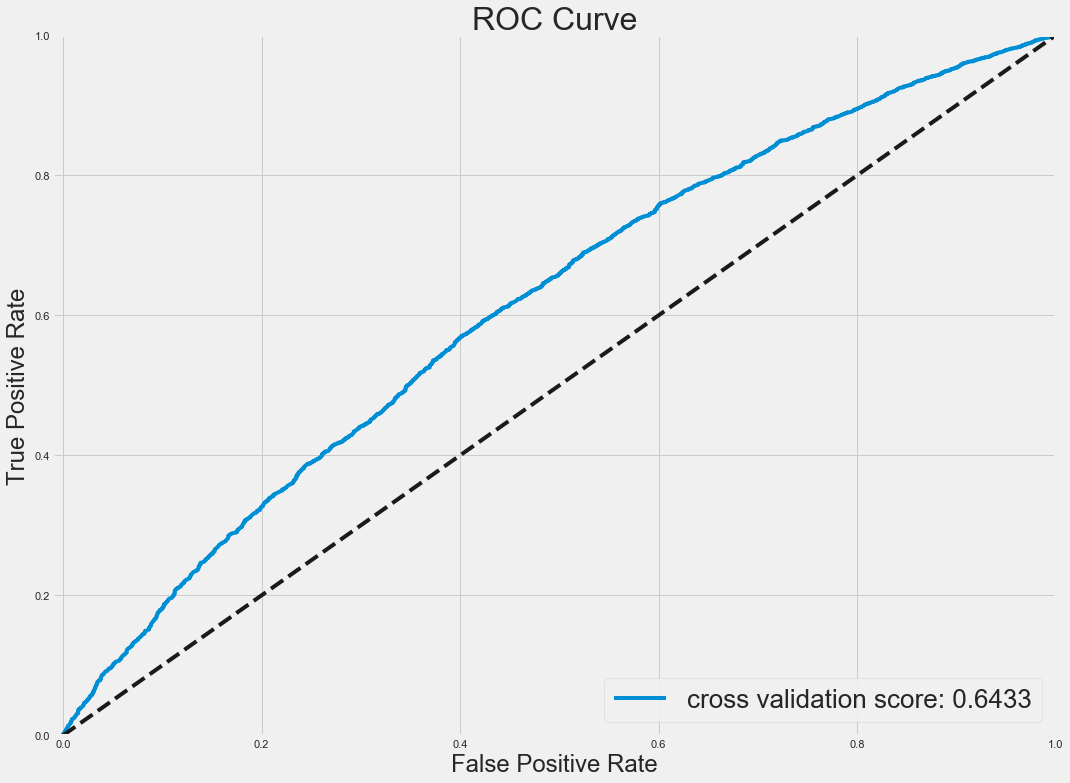

In [343]:
# %%
from sklearn.metrics import roc_curve
fpr, tpr, thresold = roc_curve(y_train, train_pred)
plt.style.use('fivethirtyeight')
def graph_roc_curve(fpr, tpr, y, predict):
    plt.figure(figsize=(16,12))
    plt.title('ROC Curve', fontsize=32)
    plt.plot(fpr, tpr, label='cross validation score: {:.4f}'.format(roc_auc_score(y, predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=24)
    plt.ylabel('True Positive Rate', fontsize=24)
    plt.legend(loc='lower right', prop={'size': 26})
graph_roc_curve(fpr, tpr, y_train, train_pred_rf)

In [344]:
# %% Lift Curve
def graph_lift_curve(y_actual, y_predict):
    df = pd.DataFrame({0:1- y_predict, 1:y_predict}).values
    from matplotlib.ticker import FuncFormatter
    import scikitplot as skplt
    ax = skplt.metrics.plot_lift_curve(y_actual, df,
                                      figsize = (16,12),
                                      title_fontsize = 36,
                                      text_fontsize = 24)
    ax.legend(['Y = 0', 'Y = 1', 'Baseline'], loc = 'upper right', fontsize=36)
    ax.xaxis.set_ticks(np.arange(0, 11, 1.0)/10)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.xaxis.label.set_size(32)
    ax.yaxis.label.set_size(32)

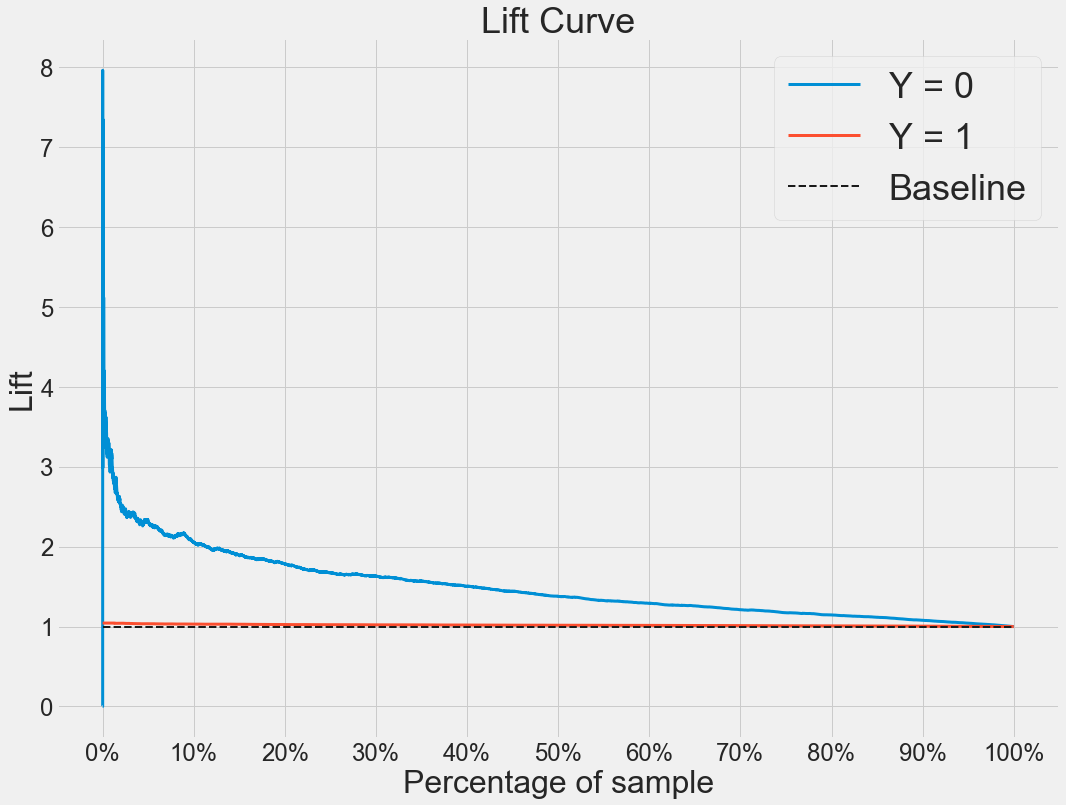

In [345]:
graph_lift_curve(y_train, train_pred_rf)

<Figure size 864x648 with 0 Axes>

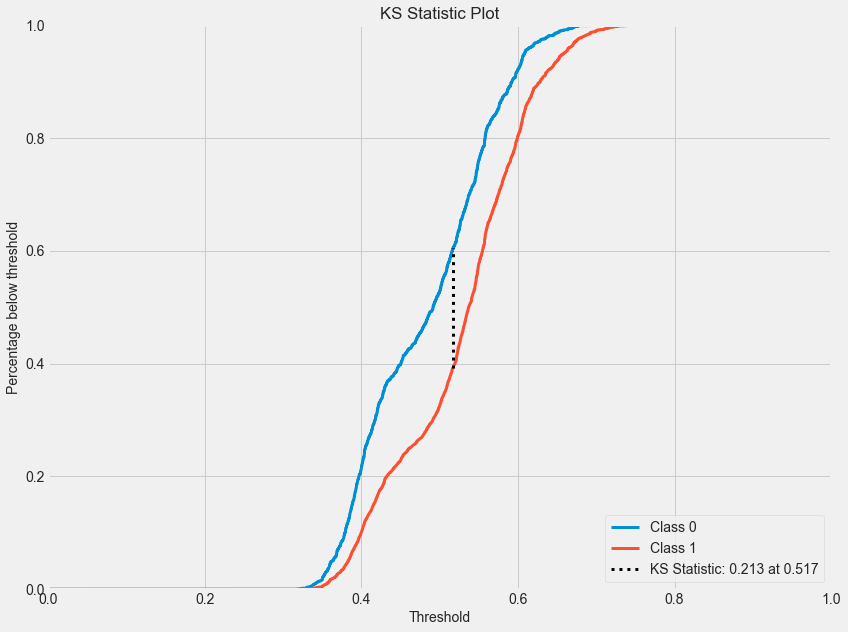

In [346]:
### K-S curve
import scikitplot as skplt
plt.figure(figsize=(12,9))
pred = rf.predict_proba(X_train[col_lr])
fig, ax = plt.subplots(figsize=(12,9), tight_layout=True)
skplt.metrics.plot_ks_statistic(y_train, pred, ax=ax)
plt.show()

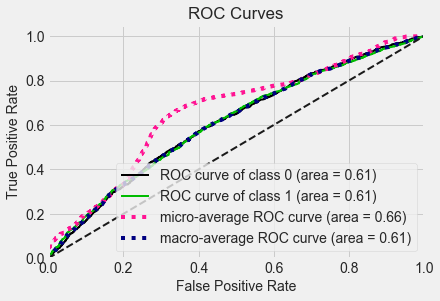

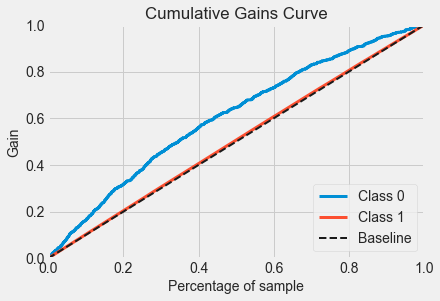

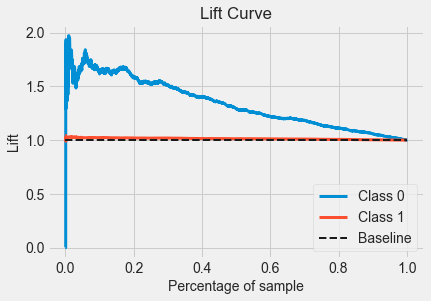

In [347]:
prc(y_test, y_pred1_prob_rf)
pcg(y_test, y_pred1_prob_rf)
plc(y_test, y_pred1_prob_rf)

### Model Building and Evaluation for merged data (without performance tag missing records)

### Creating WOE Dataframe of Merged Data

In [348]:
merged_df = pd.merge(demo_df_clean, credit_df_clean, on=['Application ID'], how='inner')
merged_df.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'target_x', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
   

In [349]:
merged_df['target']=merged_df['target_y']

In [350]:
#Removing application ID and Performance tag variables before checking correlation
merged_df.drop(["Application ID","target_y","target_x"], axis = 1, inplace = True) 
merged_df.head()

Age Gender Marital Status (at the time of application) No of dependents  \
0   48      F                                     Married              2.0   
1   31      M                                     Married              4.0   
2   32      M                                      Single              2.0   
3   43      M                                     Married              1.0   
4   35      F                                     Married              5.0   

   Income     Education Profession Type of residence  \
0    40.0      Bachelor        SAL            Rented   
1    55.0  Professional    SE_PROF            Rented   
2    46.0      Bachelor    SE_PROF            Rented   
3    53.0      Bachelor         SE            Rented   
4    44.0  Professional        SAL            Rented   

   No of months in current residence  No of months in current company  ...  \
0                                113                               56  ...   
1                                112                               46  ...   
2                                104                               49  ...   
3                                 94                               53  ...   
4                                112                               43  ...   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         1.0            2999395.0                   4   
1                         0.0               3078.0                   5   
2                         1.0            3004972.0                   2   
3                         1.0            3355373.0                   4   
4                         1.0            3014283.0                   4   

   Presence of open auto loan  target  
0                           0       1  
1                           0       1  
2                           0       1  
3                           1       1  
4                           0       1  

[5 rows x 28 columns]

In [351]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
merged_data_numeric=merged_df.select_dtypes(include=numerics)

In [352]:
# Let's plot this correlation
cor = merged_data_numeric.corr()

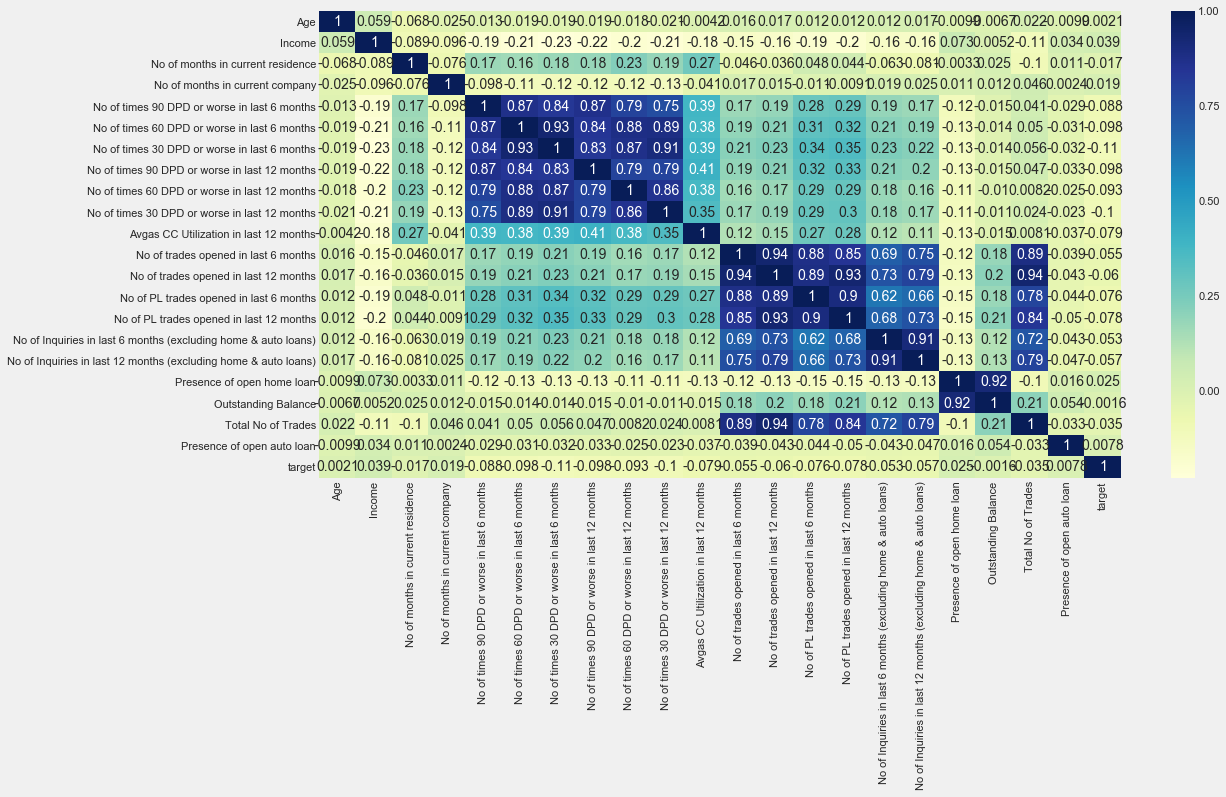

In [353]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [354]:
##Binning Categorical Demographic Data
cat_merged_data_demo = merged_df.select_dtypes('object')
cat_merged_data_demo['target'] = merged_df['target']
cat_merged_data_demo.nunique().sort_values(ascending=False)
cat_combine_merged_data_bin = woebin(cat_merged_data_demo, y="target", stop_limit=0.01)

In [355]:
# Binning Numerical Demographic Data
num_merged_data = merged_df.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
num_combine_merged_data_bin = woebin(num_merged_data, y="target", stop_limit=0.01)

Binning on 69737 rows and 22 columns in 00:00:11


In [356]:
num_merged_data_woe = woebin_ply(num_merged_data, num_combine_merged_data_bin)
cat_merged_data_woe = woebin_ply(cat_merged_data_demo, cat_combine_merged_data_bin)

In [357]:
all_combine_bin = dict(cat_combine_merged_data_bin, **num_combine_merged_data_bin)

In [358]:
del_by_iv = []
iv_list_merge = {}
for feature, df in all_combine_bin.items():
    iv = df['total_iv'].iloc[0]
    iv_list_merge[feature + '_woe'] = iv
df_iv_merge_list=pd.DataFrame(list(iv_list_merge.items()),columns = ['Variable', 'IV'])
df_iv_merge_list.sort_values(by='IV', ascending=False)

Variable        IV
19         Avgas CC Utilization in last 12 months_woe  0.307859
13       No of PL trades opened in last 12 months_woe  0.297757
12          No of trades opened in last 12 months_woe  0.297070
6   No of Inquiries in last 12 months (excluding h...  0.294731
17                             Total No of Trades_woe  0.245290
14                            Outstanding Balance_woe  0.242113
18   No of times 30 DPD or worse in last 6 months_woe  0.234070
9         No of PL trades opened in last 6 months_woe  0.219452
22  No of times 30 DPD or worse in last 12 months_woe  0.216964
21  No of times 90 DPD or worse in last 12 months_woe  0.209562
16   No of times 60 DPD or worse in last 6 months_woe  0.205774
24  No of Inquiries in last 6 months (excluding ho...  0.205617
15           No of trades opened in last 6 months_woe  0.189444
8   No of times 60 DPD or worse in last 12 months_woe  0.160523
25              No of months in current residence_woe  0.094518
11                                         Income_woe  0.045757
7                 No of months in current company_woe  0.033358
23                                            Age_woe  0.006919
3                                No of dependents_woe  0.002653
4                                      Profession_woe  0.002172
5                                          Gender_woe  0.000334
0                                       Education_woe  0.000283
1                               Type of residence_woe  0.000108
2     Marital Status (at the time of application)_woe  0.000100
20   No of times 90 DPD or worse in last 6 months_woe  0.000000
10                     Presence of open home loan_woe  0.000000
26                     Presence of open auto loan_woe  0.000000

In [359]:
merged_data_woe=pd.merge(left=num_merged_data_woe, right=cat_merged_data_woe.drop(columns='target'),
                     left_index=True, right_index=True)

In [360]:
merged_data_woe.head()

target  No of PL trades opened in last 6 months_woe  \
0       1                                     0.649719   
1       1                                     0.649719   
2       1                                     0.649719   
3       1                                     0.649719   
4       1                                     0.649719   

   No of trades opened in last 6 months_woe  \
0                                  0.477427   
1                                  0.477427   
2                                  0.662715   
3                                  0.477427   
4                                  0.662715   

   No of times 60 DPD or worse in last 6 months_woe  \
0                                          0.336558   
1                                          0.336558   
2                                          0.336558   
3                                          0.336558   
4                                          0.336558   

   No of times 30 DPD or worse in last 6 months_woe  \
0                                          0.387057   
1                                          0.387057   
2                                          0.387057   
3                                          0.387057   
4                                          0.387057   

   No of times 90 DPD or worse in last 6 months_woe  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   No of Inquiries in last 12 months (excluding home & auto loans)_woe  \
0                                           1.070215                     
1                                           1.070215                     
2                                           1.070215                     
3                                           1.070215                     
4                                           1.070215                     

   No of months in current company_woe  \
0                             0.194051   
1                             0.110955   
2                             0.110955   
3                             0.404637   
4                             0.110955   

   No of times 60 DPD or worse in last 12 months_woe  \
0                                           0.352044   
1                                           0.352044   
2                                           0.352044   
3                                           0.352044   
4                                           0.352044   

   Presence of open home loan_woe  ...  \
0                             0.0  ...   
1                             0.0  ...   
2                             0.0  ...   
3                             0.0  ...   
4                             0.0  ...   

   No of times 30 DPD or worse in last 12 months_woe   Age_woe  \
0                                           0.376577 -0.038804   
1                                           0.376577  0.028339   
2                                           0.376577  0.028339   
3                                           0.376577 -0.025320   
4                                           0.376577 -0.074643   

   No of months in current residence_woe  Presence of open auto loan_woe  \
0                               0.058858                             0.0   
1                               0.058858                             0.0   
2                               0.058858                             0.0   
3                               0.058858                             0.0   
4                               0.058858                             0.0   

   Education_woe  Type of residence_woe  \
0      -0.019988               0.006003   
1       0.017501               0.006003   
2      -0.019988               0.006003   
3      -0.019988               0.006003   
4       0.017501     

In [361]:
merged_data_woe.columns

Index(['target', 'No of PL trades opened in last 6 months_woe',
       'No of trades opened in last 6 months_woe',
       'No of times 60 DPD or worse in last 6 months_woe',
       'No of times 30 DPD or worse in last 6 months_woe',
       'No of times 90 DPD or worse in last 6 months_woe',
       'No of Inquiries in last 12 months (excluding home & auto loans)_woe',
       'No of months in current company_woe',
       'No of times 60 DPD or worse in last 12 months_woe',
       'Presence of open home loan_woe', 'Income_woe',
       'No of trades opened in last 12 months_woe',
       'No of PL trades opened in last 12 months_woe',
       'Outstanding Balance_woe',
       'No of Inquiries in last 6 months (excluding home & auto loans)_woe',
       'Total No of Trades_woe', 'Avgas CC Utilization in last 12 months_woe',
       'No of times 90 DPD or worse in last 12 months_woe',
       'No of times 30 DPD or worse in last 12 months_woe', 'Age_woe',
       'No of months in current residence

In [362]:
merged_data_woe['target'].value_counts()

1    66792
0     2945
Name: target, dtype: int64

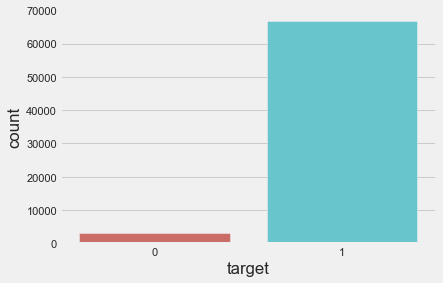

In [363]:
sns.countplot(x='target',data=merged_data_woe, palette='hls')
plt.show()

In [364]:
len(merged_data_woe[merged_data_woe['target']==0])/len(merged_data_woe[merged_data_woe['target']==1])*100

4.4092106839142415

##### Only around 4.4% of observations are under default category. The data is highly imbalanced and hence class balancing is to be performed.

### Looking at Correlations

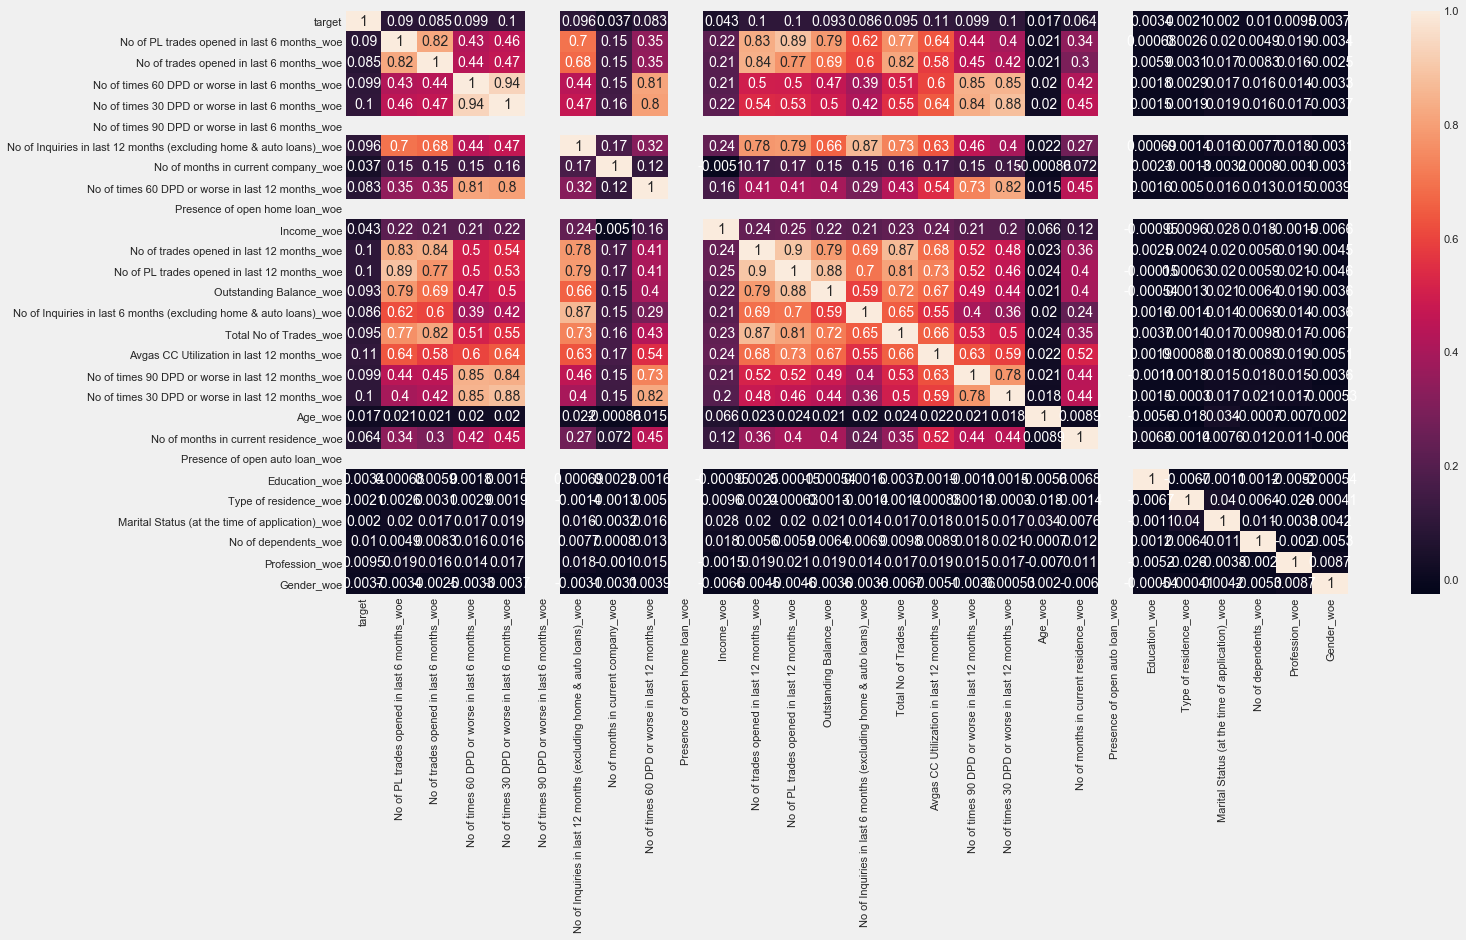

In [365]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(merged_data_woe.corr(),annot = True)
plt.show()

### Test-Train Split

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
merged_data_woe.columns

Index(['target', 'No of PL trades opened in last 6 months_woe',
       'No of trades opened in last 6 months_woe',
       'No of times 60 DPD or worse in last 6 months_woe',
       'No of times 30 DPD or worse in last 6 months_woe',
       'No of times 90 DPD or worse in last 6 months_woe',
       'No of Inquiries in last 12 months (excluding home & auto loans)_woe',
       'No of months in current company_woe',
       'No of times 60 DPD or worse in last 12 months_woe',
       'Presence of open home loan_woe', 'Income_woe',
       'No of trades opened in last 12 months_woe',
       'No of PL trades opened in last 12 months_woe',
       'Outstanding Balance_woe',
       'No of Inquiries in last 6 months (excluding home & auto loans)_woe',
       'Total No of Trades_woe', 'Avgas CC Utilization in last 12 months_woe',
       'No of times 90 DPD or worse in last 12 months_woe',
       'No of times 30 DPD or worse in last 12 months_woe', 'Age_woe',
       'No of months in current residence

In [368]:
# Putting feature variable to X
X = merged_data_woe.drop(['target'], axis=1)

X.head()

No of PL trades opened in last 6 months_woe  \
0                                     0.649719   
1                                     0.649719   
2                                     0.649719   
3                                     0.649719   
4                                     0.649719   

   No of trades opened in last 6 months_woe  \
0                                  0.477427   
1                                  0.477427   
2                                  0.662715   
3                                  0.477427   
4                                  0.662715   

   No of times 60 DPD or worse in last 6 months_woe  \
0                                          0.336558   
1                                          0.336558   
2                                          0.336558   
3                                          0.336558   
4                                          0.336558   

   No of times 30 DPD or worse in last 6 months_woe  \
0                                          0.387057   
1                                          0.387057   
2                                          0.387057   
3                                          0.387057   
4                                          0.387057   

   No of times 90 DPD or worse in last 6 months_woe  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   No of Inquiries in last 12 months (excluding home & auto loans)_woe  \
0                                           1.070215                     
1                                           1.070215                     
2                                           1.070215                     
3                                           1.070215                     
4                                           1.070215                     

   No of months in current company_woe  \
0                             0.194051   
1                             0.110955   
2                             0.110955   
3                             0.404637   
4                             0.110955   

   No of times 60 DPD or worse in last 12 months_woe  \
0                                           0.352044   
1                                           0.352044   
2                                           0.352044   
3                                           0.352044   
4                                           0.352044   

   Presence of open home loan_woe  Income_woe  ...  \
0                             0.0    0.300228  ...   
1                             0.0    0.386253  ...   
2                             0.0    0.116218  ...   
3                             0.0    0.386253  ...   
4                             0.0    0.300228  ...   

   No of times 30 DPD or worse in last 12 months_woe   Age_woe  \
0                                           0.376577 -0.038804   
1                                           0.376577  0.028339   
2                                           0.376577  0.028339   
3                                           0.376577 -0.025320   
4                                           0.376577 -0.074643   

   No of months in current residence_woe  Presence of open auto loan_woe  \
0                               0.058858                             0.0   
1                               0.058858                             0.0   
2                               0.058858                             0.0   
3                               0.058858                             0.0   
4                               0.058858                             0.0   

   Education_woe  Type of residence_woe  \
0      -0.019988               0.006003   
1       0.017501               0.006003   
2      -0.019988               0.006003   
3      -0.019988               0.006003 

In [369]:
# Putting response variable to y
y = merged_data_woe['target']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [370]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [371]:
X_train.head()

No of PL trades opened in last 6 months_woe  \
17941                                     0.649719   
61274                                    -0.361062   
29930                                    -0.437880   
21286                                     0.649719   
7550                                      0.649719   

       No of trades opened in last 6 months_woe  \
17941                                  0.662715   
61274                                 -0.470958   
29930                                  0.001372   
21286                                  0.662715   
7550                                   0.662715   

       No of times 60 DPD or worse in last 6 months_woe  \
17941                                          0.336558   
61274                                         -0.622022   
29930                                          0.336558   
21286                                          0.336558   
7550                                           0.336558   

       No of times 30 DPD or worse in last 6 months_woe  \
17941                                          0.387057   
61274                                         -0.616715   
29930                                          0.387057   
21286                                          0.387057   
7550                                           0.387057   

       No of times 90 DPD or worse in last 6 months_woe  \
17941                                               0.0   
61274                                               0.0   
29930                                               0.0   
21286                                               0.0   
7550                                                0.0   

       No of Inquiries in last 12 months (excluding home & auto loans)_woe  \
17941                                           1.070215                     
61274                                          -0.521531                     
29930                                          -0.521531                     
21286                                          -0.153394                     
7550                                            1.070215                     

       No of months in current company_woe  \
17941                             0.110955   
61274                             0.110955   
29930                            -0.120225   
21286                             0.020323   
7550                              0.020323   

       No of times 60 DPD or worse in last 12 months_woe  \
17941                                           0.352044   
61274                                          -0.462138   
29930                                           0.352044   
21286                                           0.352044   
7550                                           -0.462138   

       Presence of open home loan_woe  Income_woe  ...  \
17941                             0.0   -0.028985  ...   
61274                             0.0   -0.028985  ...   
29930                             0.0   -0.332041  ...   
21286                             0.0   -0.088902  ...   
7550                              0.0   -0.028985  ...   

       No of times 30 DPD or worse in last 12 months_woe   Age_woe  \
17941                                           0.376577  0.028339   
61274                                          -0.799146 -0.074643   
29930                                           0.376577 -0.074643   
21286                                           0.376577  0.111339   
7550                                           -0.070446  0.028339   

       No of months in current residence_woe  Presence of open auto loan_woe  \
17941                               0.303214                             0.0   
61274                               0.058858                             0.0   
29930                               0.303214                             0.0   
21286                               0.303214                             0.0   
7550                             

### Feature Scaling

In [372]:
from sklearn.preprocessing import StandardScaler

In [373]:
num_col=X.columns
num_col

Index(['No of PL trades opened in last 6 months_woe',
       'No of trades opened in last 6 months_woe',
       'No of times 60 DPD or worse in last 6 months_woe',
       'No of times 30 DPD or worse in last 6 months_woe',
       'No of times 90 DPD or worse in last 6 months_woe',
       'No of Inquiries in last 12 months (excluding home & auto loans)_woe',
       'No of months in current company_woe',
       'No of times 60 DPD or worse in last 12 months_woe',
       'Presence of open home loan_woe', 'Income_woe',
       'No of trades opened in last 12 months_woe',
       'No of PL trades opened in last 12 months_woe',
       'Outstanding Balance_woe',
       'No of Inquiries in last 6 months (excluding home & auto loans)_woe',
       'Total No of Trades_woe', 'Avgas CC Utilization in last 12 months_woe',
       'No of times 90 DPD or worse in last 12 months_woe',
       'No of times 30 DPD or worse in last 12 months_woe', 'Age_woe',
       'No of months in current residence_woe',
   

In [374]:
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

X_train.head()

No of PL trades opened in last 6 months_woe  \
17941                                     1.106038   
61274                                    -0.947950   
29930                                    -1.104052   
21286                                     1.106038   
7550                                      1.106038   

       No of trades opened in last 6 months_woe  \
17941                                  1.283821   
61274                                 -1.255588   
29930                                 -0.197577   
21286                                  1.283821   
7550                                   1.283821   

       No of times 60 DPD or worse in last 6 months_woe  \
17941                                          0.587483   
61274                                         -1.702177   
29930                                          0.587483   
21286                                          0.587483   
7550                                           0.587483   

       No of times 30 DPD or worse in last 6 months_woe  \
17941                                          0.625980   
61274                                         -1.597495   
29930                                          0.625980   
21286                                          0.625980   
7550                                           0.625980   

       No of times 90 DPD or worse in last 6 months_woe  \
17941                                               0.0   
61274                                               0.0   
29930                                               0.0   
21286                                               0.0   
7550                                                0.0   

       No of Inquiries in last 12 months (excluding home & auto loans)_woe  \
17941                                           1.490202                     
61274                                          -1.089944                     
29930                                          -1.089944                     
21286                                          -0.493211                     
7550                                            1.490202                     

       No of months in current company_woe  \
17941                             0.523510   
61274                             0.523510   
29930                            -0.747949   
21286                             0.025044   
7550                              0.025044   

       No of times 60 DPD or worse in last 12 months_woe  \
17941                                           0.719835   
61274                                          -1.389207   
29930                                           0.719835   
21286                                           0.719835   
7550                                           -1.389207   

       Presence of open home loan_woe  Income_woe  ...  \
17941                             0.0   -0.226152  ...   
61274                             0.0   -0.226152  ...   
29930                             0.0   -1.634646  ...   
21286                             0.0   -0.504623  ...   
7550                              0.0   -0.226152  ...   

       No of times 30 DPD or worse in last 12 months_woe   Age_woe  \
17941                                           0.662876  0.299977   
61274                                          -2.103387 -0.929413   
29930                                           0.662876 -0.929413   
21286                                           0.662876  1.290821   
7550                                           -0.388889  0.299977   

       No of months in current residence_woe  Presence of open auto loan_woe  \
17941                               0.876328                             0.0   
61274                               0.054830                             0.0   
29930                               0.876328                             0.0   
21286                               0.876328                             0.0   
7550                             

In [375]:

X_test[num_col] = scaler.transform(X_test[num_col])

X_test.head()

No of PL trades opened in last 6 months_woe  \
22720                                     1.106038   
12908                                     1.106038   
31185                                    -0.947950   
4562                                      1.106038   
29792                                    -0.617958   

       No of trades opened in last 6 months_woe  \
22720                                  0.868778   
12908                                  0.868778   
31185                                 -0.197577   
4562                                   1.283821   
29792                                 -0.721439   

       No of times 60 DPD or worse in last 6 months_woe  \
22720                                          0.587483   
12908                                          0.587483   
31185                                          0.587483   
4562                                           0.587483   
29792                                          0.587483   

       No of times 30 DPD or worse in last 6 months_woe  \
22720                                           0.62598   
12908                                           0.62598   
31185                                           0.62598   
4562                                            0.62598   
29792                                           0.62598   

       No of times 90 DPD or worse in last 6 months_woe  \
22720                                               0.0   
12908                                               0.0   
31185                                               0.0   
4562                                                0.0   
29792                                               0.0   

       No of Inquiries in last 12 months (excluding home & auto loans)_woe  \
22720                                          -0.493211                     
12908                                           1.490202                     
31185                                          -1.089944                     
4562                                            1.490202                     
29792                                          -0.493211                     

       No of months in current company_woe  \
22720                             0.523510   
12908                             0.025044   
31185                            -1.148145   
4562                              0.467067   
29792                             0.523510   

       No of times 60 DPD or worse in last 12 months_woe  \
22720                                           0.719835   
12908                                           0.719835   
31185                                           0.719835   
4562                                            0.719835   
29792                                           0.719835   

       Presence of open home loan_woe  Income_woe  ...  \
22720                             0.0    1.303916  ...   
12908                             0.0   -0.226152  ...   
31185                             0.0    1.703728  ...   
4562                              0.0   -0.226152  ...   
29792                             0.0   -1.634646  ...   

       No of times 30 DPD or worse in last 12 months_woe   Age_woe  \
22720                                           0.662876 -0.501576   
12908                                           0.662876 -0.340608   
31185                                           0.662876  1.536837   
4562                                            0.662876  0.299977   
29792                                           0.662876 -0.929413   

       No of months in current residence_woe  Presence of open auto loan_woe  \
22720                               0.876328                             0.0   
12908                               0.876328                             0.0   
31185                               0.876328                             0.0   
4562                                0.054830                             0.0   
29792                            

### Model Building

#### parallel K-fold crossover, combined performance

In [376]:
from sklearn.model_selection import train_test_split, KFold

In [377]:
from sklearn.feature_selection import RFECV
from sklearn import metrics

In [378]:
params_lr = {'solver':'liblinear', 'n_jobs':-1,'random_state':0, 'class_weight':'balanced'}
scores_dict = {'validation': [], 'test': []}

In [379]:
lr = LogisticRegression(**params_lr)
rfecv = RFECV(estimator=lr, step=1, cv=KFold(5),scoring='roc_auc')
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
print("Max score of features : {0}".format(rfecv.grid_scores_.max()))

Optimal number of features : 7
Max score of features : 0.6763304489836022


In [380]:
train_pred = rfecv.predict_proba(X_train)[:,1]
test_pred = rfecv.predict_proba(X_test)[:,1]

In [381]:
# Predicting the Test set results
y_pred0 = rfecv.predict(X_test)

# Making the Confusion Matrix
cm0 = confusion_matrix(y_test, y_pred0)
print (cm0)

print (classification_report(y_test, y_pred0))
print("Accuracy:- ",metrics.accuracy_score(y_test, y_pred0))

[[  602   299]
 [ 8246 11775]]
              precision    recall  f1-score   support

           0       0.07      0.67      0.12       901
           1       0.98      0.59      0.73     20021

    accuracy                           0.59     20922
   macro avg       0.52      0.63      0.43     20922
weighted avg       0.94      0.59      0.71     20922

Accuracy:-  0.5915782429978014


##### Metrics beyond simply accuracy

In [382]:
TP = cm0[1,1] # true positive 
TN = cm0[0,0] # true negatives
FP = cm0[0,1] # false positives
FN = cm0[1,0] # false negatives

In [383]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5881324609160382

In [384]:
# Let us calculate specificity
TN / float(TN+FP)

0.6681465038845728

In [385]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3318534961154273


In [386]:
# positive predictive value 
print (TP / float(TP+FP))

0.9752360443929103


In [387]:
# Negative predictive value
print (TN / float(TN+ FN))

0.0680379746835443


In [388]:
y_pred1_prob = rfecv.predict_proba(X_test)

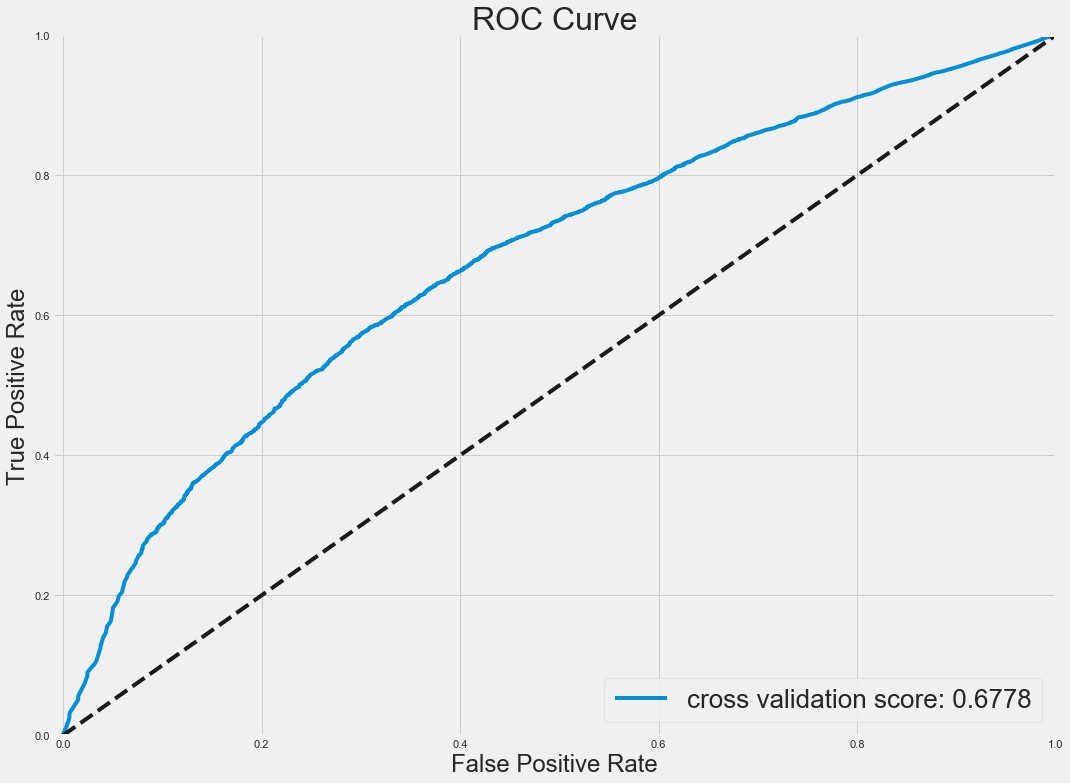

In [389]:
# %%
from sklearn.metrics import roc_curve
fpr, tpr, thresold = roc_curve(y_train, train_pred)
plt.style.use('fivethirtyeight')
def graph_roc_curve(fpr, tpr, y, predict):
    plt.figure(figsize=(16,12))
    plt.title('ROC Curve', fontsize=32)
    plt.plot(fpr, tpr, label='cross validation score: {:.4f}'.format(roc_auc_score(y, predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=24)
    plt.ylabel('True Positive Rate', fontsize=24)
    plt.legend(loc='lower right', prop={'size': 26})
graph_roc_curve(fpr, tpr, y_train, train_pred)

In [390]:
# %% Lift Curve
def graph_lift_curve(y_actual, y_predict):
    df = pd.DataFrame({0:1- y_predict, 1:y_predict}).values
    from matplotlib.ticker import FuncFormatter
    import scikitplot as skplt
    ax = skplt.metrics.plot_lift_curve(y_actual, df,
                                      figsize = (16,12),
                                      title_fontsize = 36,
                                      text_fontsize = 24)
    ax.legend(['Y = 0', 'Y = 1', 'Baseline'], loc = 'upper right', fontsize=36)
    ax.xaxis.set_ticks(np.arange(0, 11, 1.0)/10)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.xaxis.label.set_size(32)
    ax.yaxis.label.set_size(32)

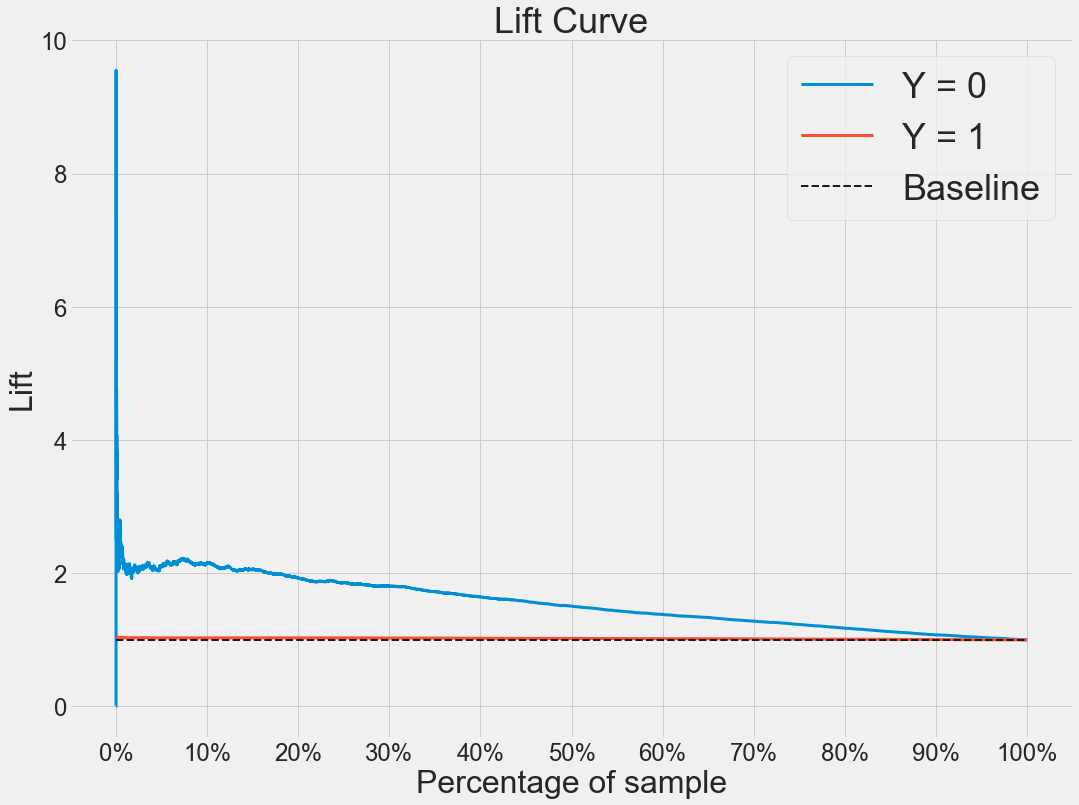

In [391]:
graph_lift_curve(y_train, train_pred)

<Figure size 864x648 with 0 Axes>

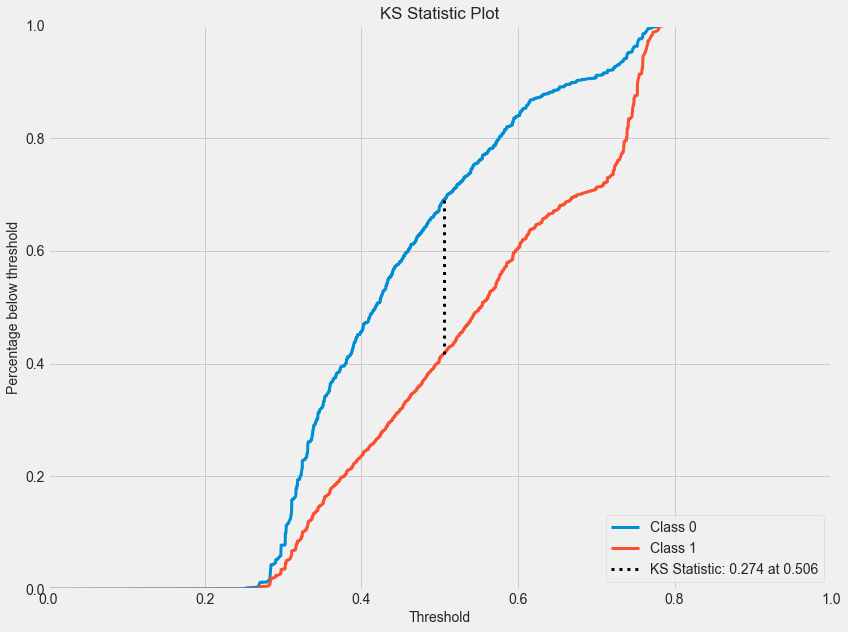

In [392]:
### K-S curve
import scikitplot as skplt
plt.figure(figsize=(12,9))
pred = rfecv.predict_proba(X_train)
fig, ax = plt.subplots(figsize=(12,9), tight_layout=True)
skplt.metrics.plot_ks_statistic(y_train, pred, ax=ax)
plt.show()

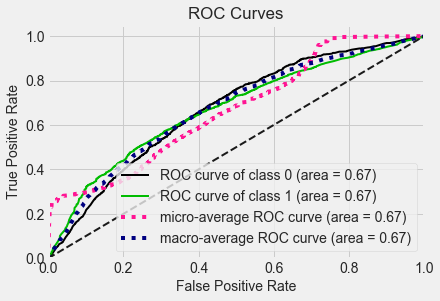

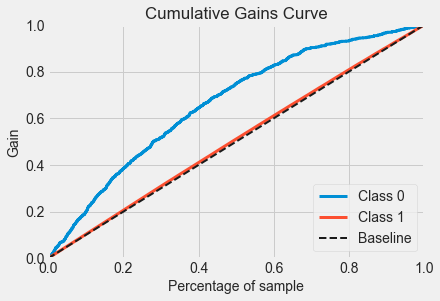

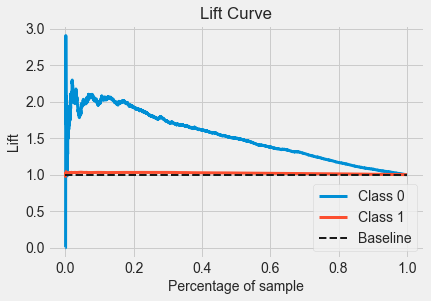

In [393]:
prc(y_test, y_pred1_prob)
pcg(y_test, y_pred1_prob)
plc(y_test, y_pred1_prob)

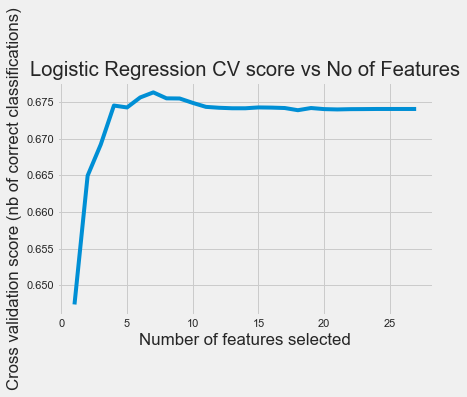

In [394]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [395]:
feature_importance = list(zip(X_train.columns, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['No of times 30 DPD or worse in last 6 months_woe', 'No of Inquiries in last 12 months (excluding home & auto loans)_woe', 'No of months in current company_woe', 'No of times 60 DPD or worse in last 12 months_woe', 'No of trades opened in last 12 months_woe', 'Avgas CC Utilization in last 12 months_woe', 'No of times 30 DPD or worse in last 12 months_woe']


### Improtant Features Obtained By RFECV are :- 
<br>'No of times 30 DPD or worse in last 12 months_woe' </br>
<br> 'No of times 30 DPD or worse in last 6 months_woe'</br>
<br>'No of Inquiries in last 12 months (excluding home & auto loans)_woe'</br>
<br>'No of months in current company_woe' </br>
<br>'No of trades opened in last 12 months_woe'</br>
<br>'Avgas CC Utilization in last 12 months_woe'</br>
<br>'No of times 60 DPD or worse in last 12 months_woe'

#### We can do a comparison of the model with original features and the RFECV selected features to see if there is an improvement in the accuracy scores.

#### Creating Model by Selectiing Important Features

In [396]:
col_lr=['No of times 30 DPD or worse in last 12 months_woe', 'No of times 30 DPD or worse in last 6 months_woe', 'No of Inquiries in last 12 months (excluding home & auto loans)_woe', 'No of months in current company_woe', 'No of trades opened in last 12 months_woe', 'Avgas CC Utilization in last 12 months_woe', 'No of times 60 DPD or worse in last 12 months_woe']
lr_col= LogisticRegression(random_state=0, class_weight='balanced')
#rfecv_new = RFECV(estimator=lr, step=1, cv=KFold(5),scoring='roc_auc')
lr_col.fit(X_train[col_lr], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [397]:
train_pred = lr_col.predict_proba(X_train[col_lr])[:,1]
test_pred = lr_col.predict_proba(X_test[col_lr])[:,1]

In [398]:
# Predicting the Test set results
y_pred_lr = lr_col.predict(X_test[col_lr])

# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred_lr)
print (cm1)
print (classification_report(y_test, y_pred_lr))
print("Accuracy:- ",metrics.accuracy_score(y_test, y_pred_lr))

[[  602   299]
 [ 8246 11775]]
              precision    recall  f1-score   support

           0       0.07      0.67      0.12       901
           1       0.98      0.59      0.73     20021

    accuracy                           0.59     20922
   macro avg       0.52      0.63      0.43     20922
weighted avg       0.94      0.59      0.71     20922

Accuracy:-  0.5915782429978014


###### By observing the accuracy there is a slight increase in the accuracy after feeding the selected features to the model.

In [399]:
TP = cm1[1,1] # true positive 
TN = cm1[0,0] # true negatives
FP = cm1[0,1] # false positives
FN = cm1[1,0] # false negatives

In [400]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5881324609160382

In [401]:
# Let us calculate specificity
TN / float(TN+FP)

0.6681465038845728

In [402]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3318534961154273


In [403]:
# positive predictive value 
print (TP / float(TP+FP))

0.9752360443929103


In [404]:
# Negative predictive value
print (TN / float(TN+ FN))

0.0680379746835443


In [405]:
y_pred1_prob =lr_col.predict_proba(X_test[col_lr])

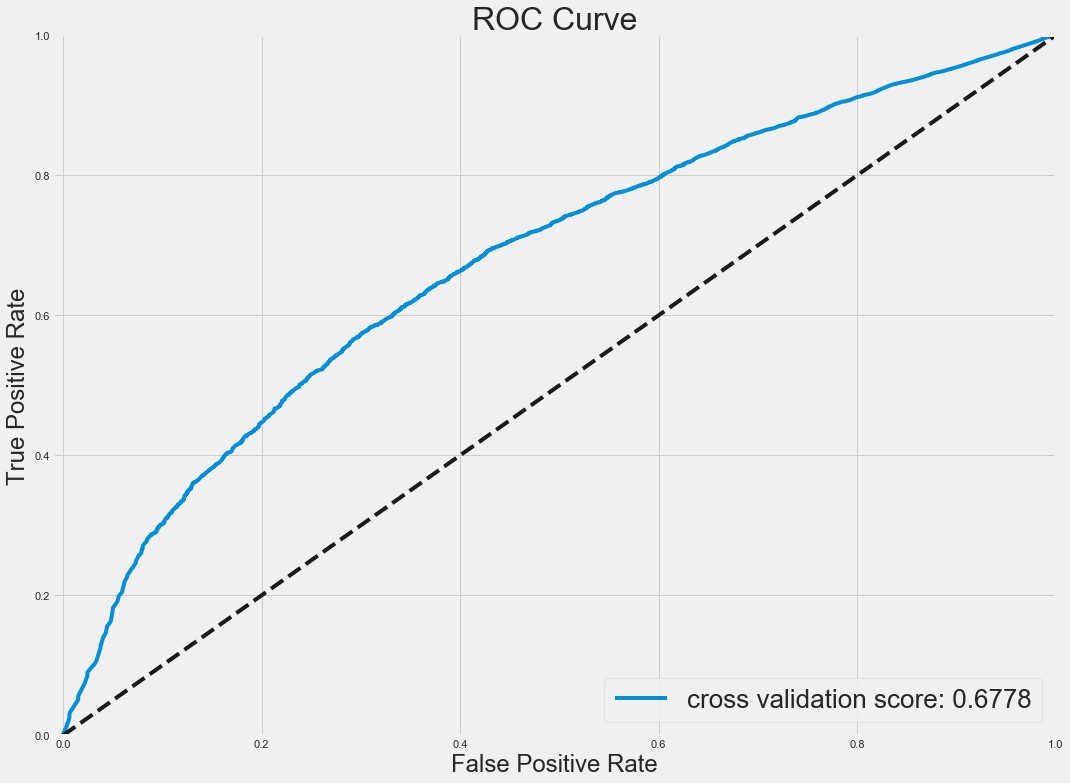

In [406]:
# %%
from sklearn.metrics import roc_curve
fpr, tpr, thresold = roc_curve(y_train, train_pred)
plt.style.use('fivethirtyeight')
def graph_roc_curve(fpr, tpr, y, predict):
    plt.figure(figsize=(16,12))
    plt.title('ROC Curve', fontsize=32)
    plt.plot(fpr, tpr, label='cross validation score: {:.4f}'.format(roc_auc_score(y, predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=24)
    plt.ylabel('True Positive Rate', fontsize=24)
    plt.legend(loc='lower right', prop={'size': 26})
graph_roc_curve(fpr, tpr, y_train, train_pred)

In [407]:
# %% Lift Curve
def graph_lift_curve(y_actual, y_predict):
    df = pd.DataFrame({0:1- y_predict, 1:y_predict}).values
    from matplotlib.ticker import FuncFormatter
    import scikitplot as skplt
    ax = skplt.metrics.plot_lift_curve(y_actual, df,
                                      figsize = (16,12),
                                      title_fontsize = 36,
                                      text_fontsize = 24)
    ax.legend(['Y = 0', 'Y = 1', 'Baseline'], loc = 'upper right', fontsize=36)
    ax.xaxis.set_ticks(np.arange(0, 11, 1.0)/10)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.xaxis.label.set_size(32)
    ax.yaxis.label.set_size(32)

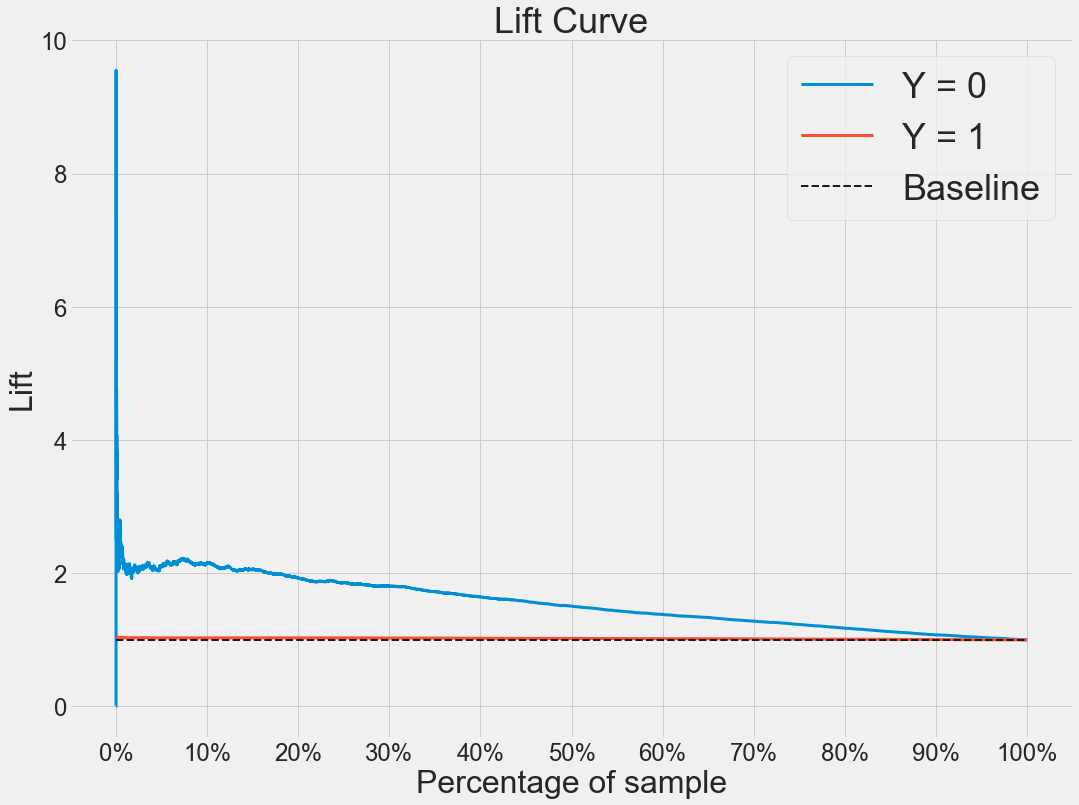

In [408]:
graph_lift_curve(y_train, train_pred)

<Figure size 864x648 with 0 Axes>

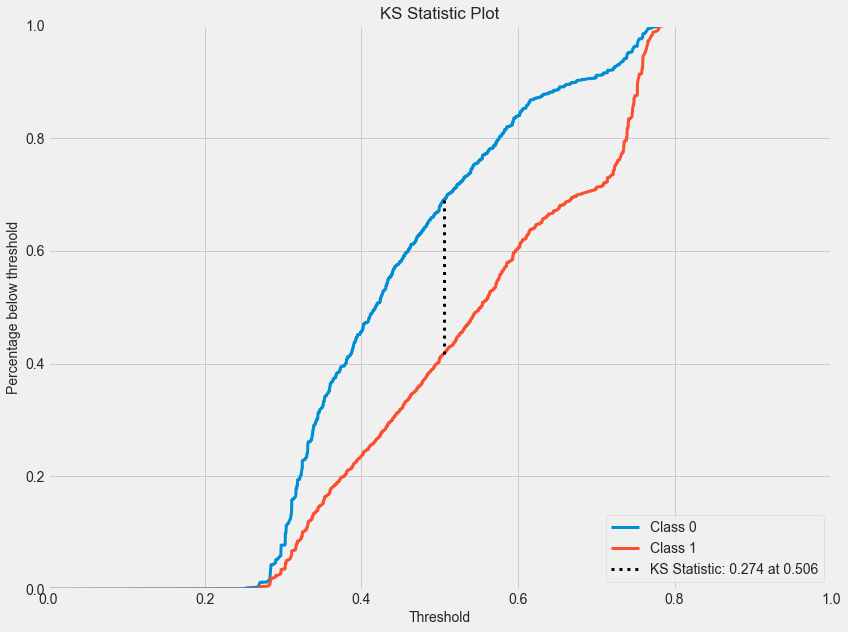

In [409]:
### K-S curve
import scikitplot as skplt
plt.figure(figsize=(12,9))
pred = lr_col.predict_proba(X_train[col_lr])
fig, ax = plt.subplots(figsize=(12,9), tight_layout=True)
skplt.metrics.plot_ks_statistic(y_train, pred, ax=ax)
plt.show()

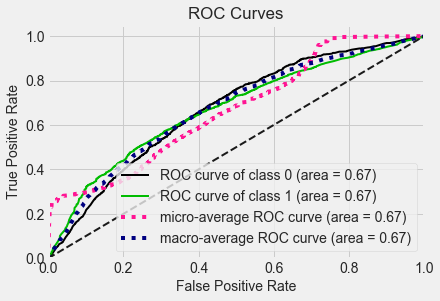

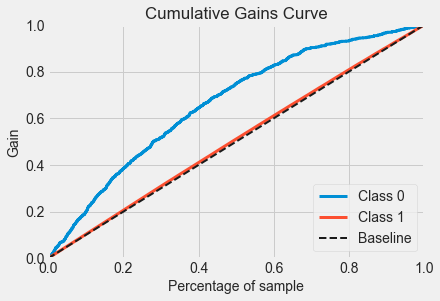

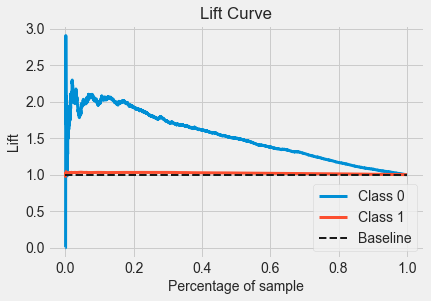

In [410]:
prc(y_test, y_pred1_prob)
pcg(y_test, y_pred1_prob)
plc(y_test, y_pred1_prob)

### RandomForest Classifier

In [411]:
from sklearn.ensemble import RandomForestClassifier

In [412]:
params_rf = {'max_depth': 11,
 'max_leaf_nodes': 29,
 'min_samples_leaf': 18,
 'min_samples_split': 20,
 'n_estimators': 390,
 'n_jobs': -1,
'random_state':0,'class_weight':"balanced"}

In [413]:
rf = RandomForestClassifier(**params_rf)
#rfecv_rf = RFECV(estimator=rf, step=1, cv=KFold(5),scoring='roc_auc')
rf.fit(X_train[col_lr],y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=29, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=18,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=390, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

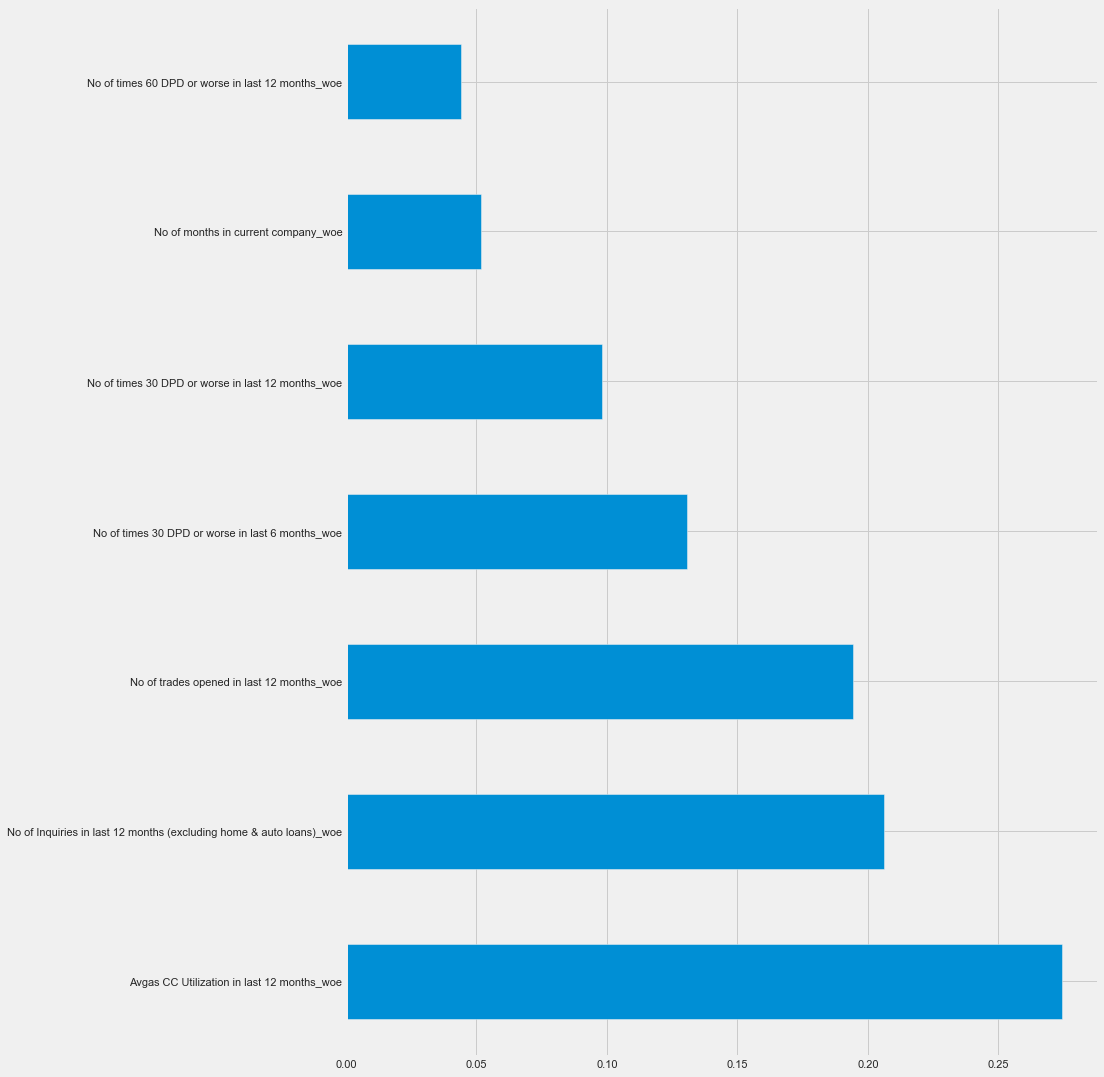

In [414]:
## Sort feature importances in descending order
plt.figure(figsize=(12,18))
feat_importances = pd.Series(rf.feature_importances_, index=X_train[col_lr].columns)
feat_importances.nlargest(10).plot(kind='barh')

In [415]:
train_pred_rf =rf.predict_proba(X_train[col_lr])[:,1]
test_pred_rf = rf.predict_proba(X_test[col_lr])[:,1]

In [416]:
# Predicting the Test set results
y_pred_rf = rf.predict(X_test[col_lr])

# Making the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print (cm_rf)

print (classification_report(y_test, y_pred_rf))
print("Accuracy:- ",metrics.accuracy_score(y_test, y_pred_rf))

[[  618   283]
 [ 8491 11530]]
              precision    recall  f1-score   support

           0       0.07      0.69      0.12       901
           1       0.98      0.58      0.72     20021

    accuracy                           0.58     20922
   macro avg       0.52      0.63      0.42     20922
weighted avg       0.94      0.58      0.70     20922

Accuracy:-  0.580632826689609


##### Metrics beyond simply accuracy

In [417]:
TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives

In [418]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5758953099245792

In [419]:
# Let us calculate specificity
TN / float(TN+FP)

0.6859045504994451

In [420]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.31409544950055496


In [421]:
# positive predictive value 
print (TP / float(TP+FP))

0.9760433420807585


In [422]:
# Negative predictive value
print (TN / float(TN+ FN))

0.06784498847293885


In [423]:
y_pred1_prob_rf = rf.predict_proba(X_test[col_lr])

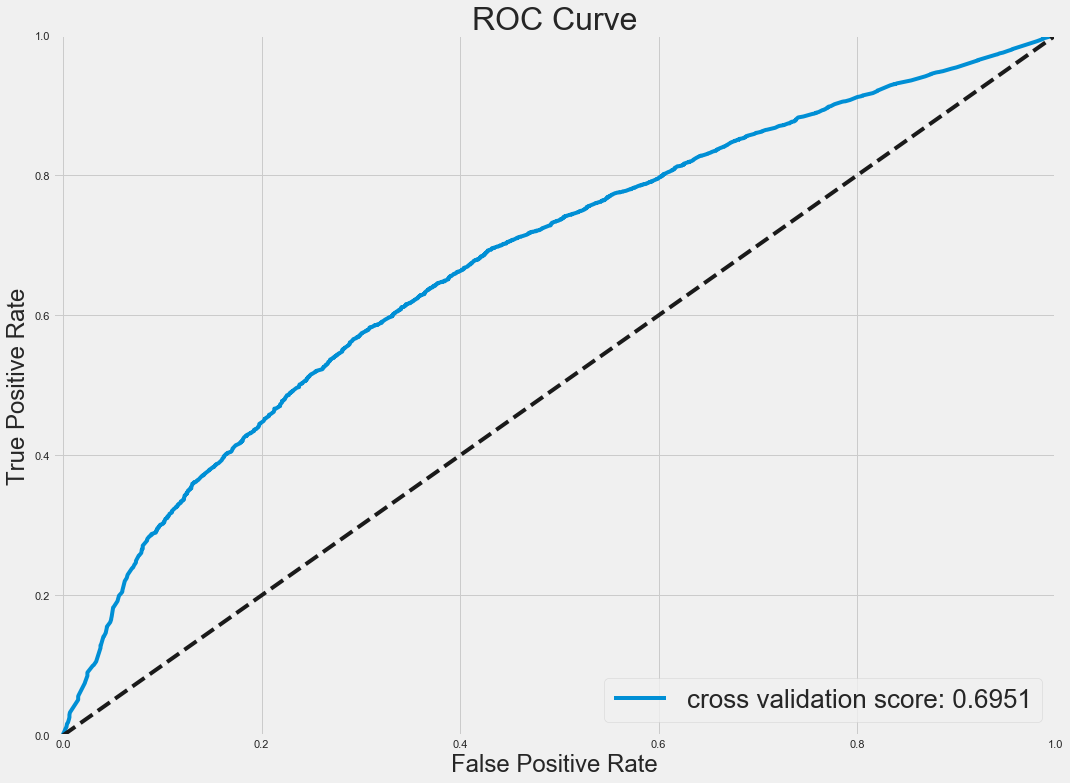

In [424]:
# %%
from sklearn.metrics import roc_curve
fpr, tpr, thresold = roc_curve(y_train, train_pred)
plt.style.use('fivethirtyeight')
def graph_roc_curve(fpr, tpr, y, predict):
    plt.figure(figsize=(16,12))
    plt.title('ROC Curve', fontsize=32)
    plt.plot(fpr, tpr, label='cross validation score: {:.4f}'.format(roc_auc_score(y, predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=24)
    plt.ylabel('True Positive Rate', fontsize=24)
    plt.legend(loc='lower right', prop={'size': 26})
graph_roc_curve(fpr, tpr, y_train, train_pred_rf)

In [425]:
# %% Lift Curve
def graph_lift_curve(y_actual, y_predict):
    df = pd.DataFrame({0:1- y_predict, 1:y_predict}).values
    from matplotlib.ticker import FuncFormatter
    import scikitplot as skplt
    ax = skplt.metrics.plot_lift_curve(y_actual, df,
                                      figsize = (16,12),
                                      title_fontsize = 36,
                                      text_fontsize = 24)
    ax.legend(['Y = 0', 'Y = 1', 'Baseline'], loc = 'upper right', fontsize=36)
    ax.xaxis.set_ticks(np.arange(0, 11, 1.0)/10)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.xaxis.label.set_size(32)
    ax.yaxis.label.set_size(32)

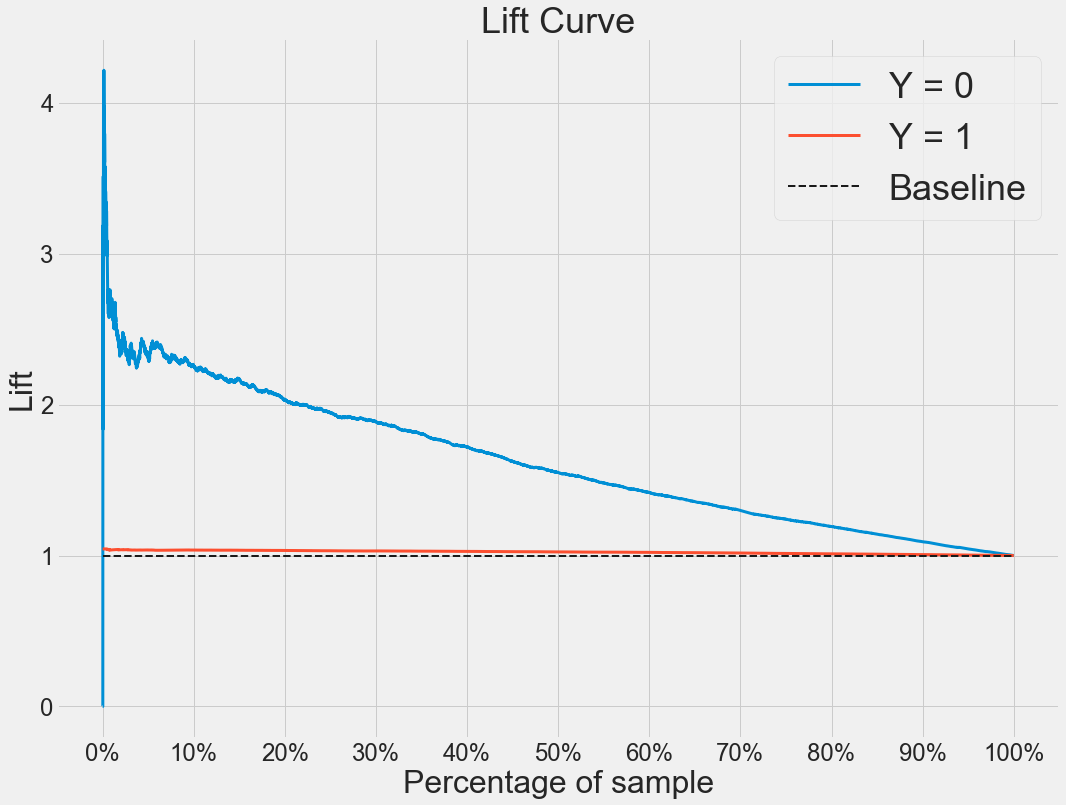

In [426]:
graph_lift_curve(y_train, train_pred_rf)

<Figure size 864x648 with 0 Axes>

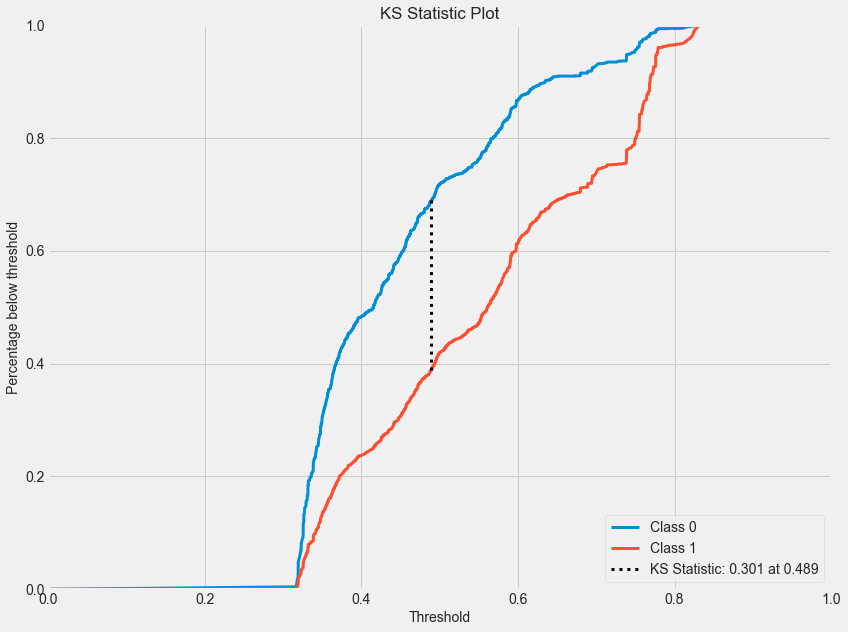

In [427]:
### K-S curve
import scikitplot as skplt
plt.figure(figsize=(12,9))
pred = rf.predict_proba(X_train[col_lr])
fig, ax = plt.subplots(figsize=(12,9), tight_layout=True)
skplt.metrics.plot_ks_statistic(y_train, pred, ax=ax)
plt.show()

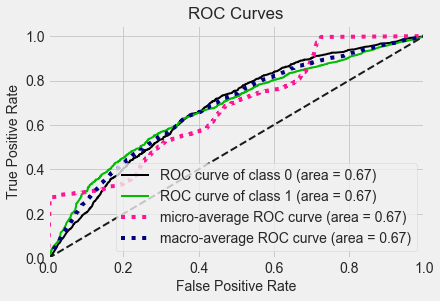

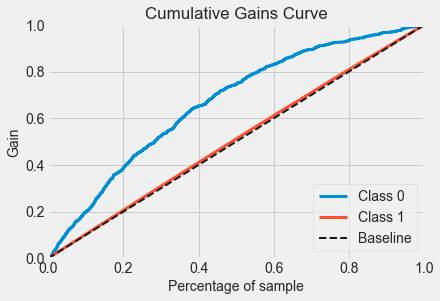

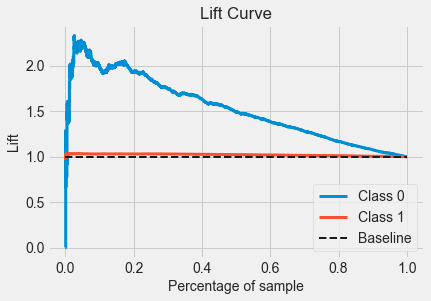

In [428]:
prc(y_test, y_pred1_prob_rf)
pcg(y_test, y_pred1_prob_rf)
plc(y_test, y_pred1_prob_rf)

### XGBBoost Classifier

In [429]:
param_xgb = {'learning_rate' :0.1,'n_estimators':1000,'max_depth':5, 'min_child_weight':1,'gamma':0,'subsample':0.8,
             'colsample_bytree':0.8,'objective': 'binary:logistic','nthread':4,'scale_pos_weight':1,'seed':27}

In [430]:
from xgboost import XGBClassifier
xg = XGBClassifier(**param_xgb)
#rfecv_rf = RFECV(estimator=rf, step=1, cv=KFold(5),scoring='roc_auc')
xg.fit(X_train[col_lr],y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

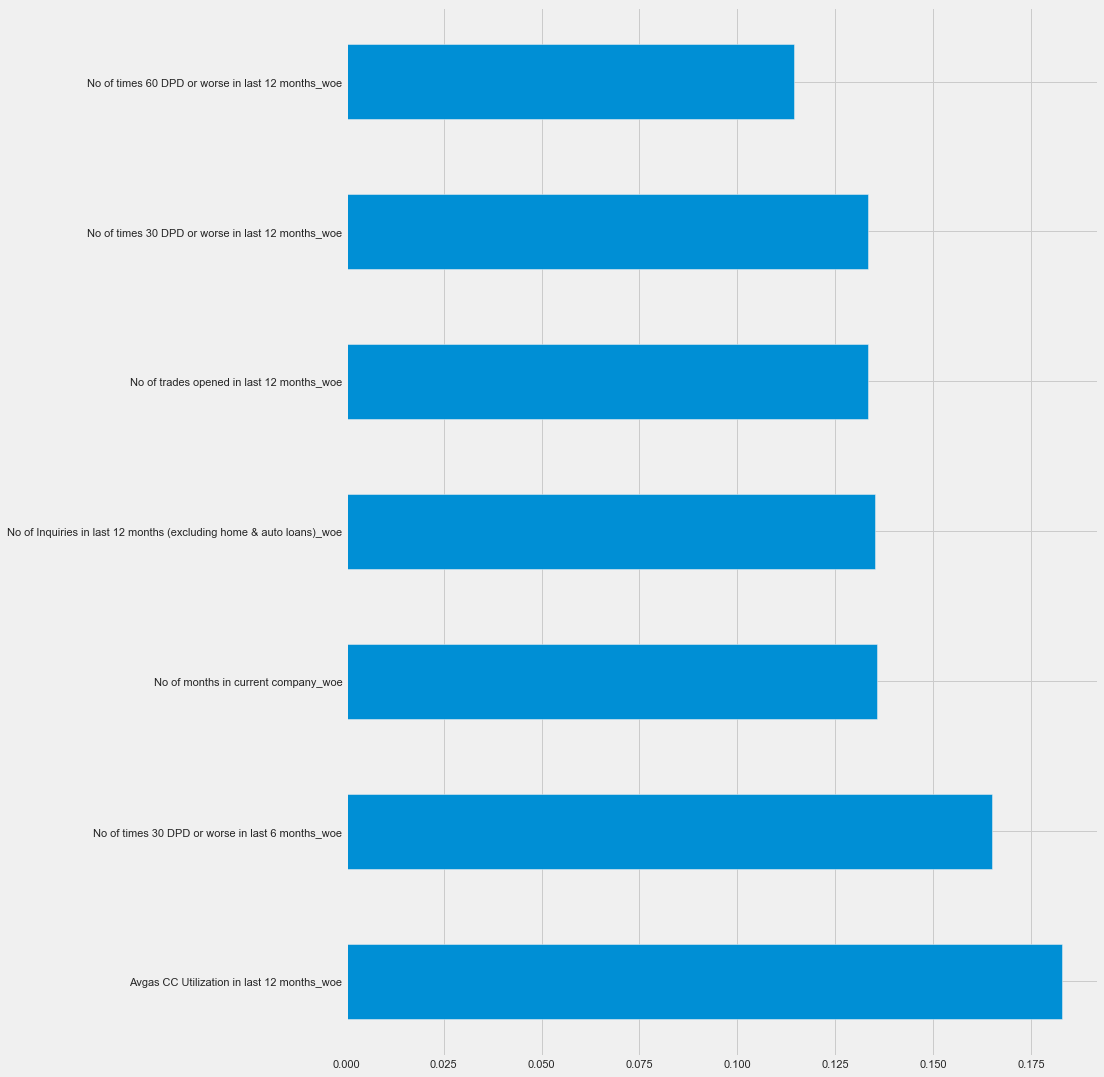

In [431]:
## Sort feature importances in descending order
plt.figure(figsize=(12,18))
feat_importances = pd.Series(xg.feature_importances_, index=X_train[col_lr].columns)
feat_importances.nlargest(10).plot(kind='barh')

In [432]:
train_pred_xg =xg.predict_proba(X_train[col_lr])[:,1]
test_pred_xg= rf.predict_proba(X_test[col_lr])[:,1]

In [433]:
# Predicting the Test set results
y_pred_xg = xg.predict(X_test[col_lr])

# Making the Confusion Matrix
cm_xg = confusion_matrix(y_test, y_pred_xg)
print (cm_xg)

print (classification_report(y_test, y_pred_xg))
print("Accuracy:- ",metrics.accuracy_score(y_test, y_pred_xg))

[[    0   901]
 [    4 20017]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       901
           1       0.96      1.00      0.98     20021

    accuracy                           0.96     20922
   macro avg       0.48      0.50      0.49     20922
weighted avg       0.92      0.96      0.94     20922

Accuracy:-  0.956744097122646


##### Metrics beyond simply accuracy

In [434]:
TP = cm_xg[1,1] # true positive 
TN = cm_xg[0,0] # true negatives
FP = cm_xg[0,1] # false positives
FN = cm_xg[1,0] # false negatives

In [435]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9998002097797313

In [436]:
# Let us calculate specificity
TN / float(TN+FP)

0.0

In [437]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

1.0


In [438]:
# positive predictive value 
print (TP / float(TP+FP))

0.9569270484749977


In [439]:
# Negative predictive value
print (TN / float(TN+ FN))

0.0


In [440]:
y_pred1_prob_xg = xg.predict_proba(X_test[col_lr])

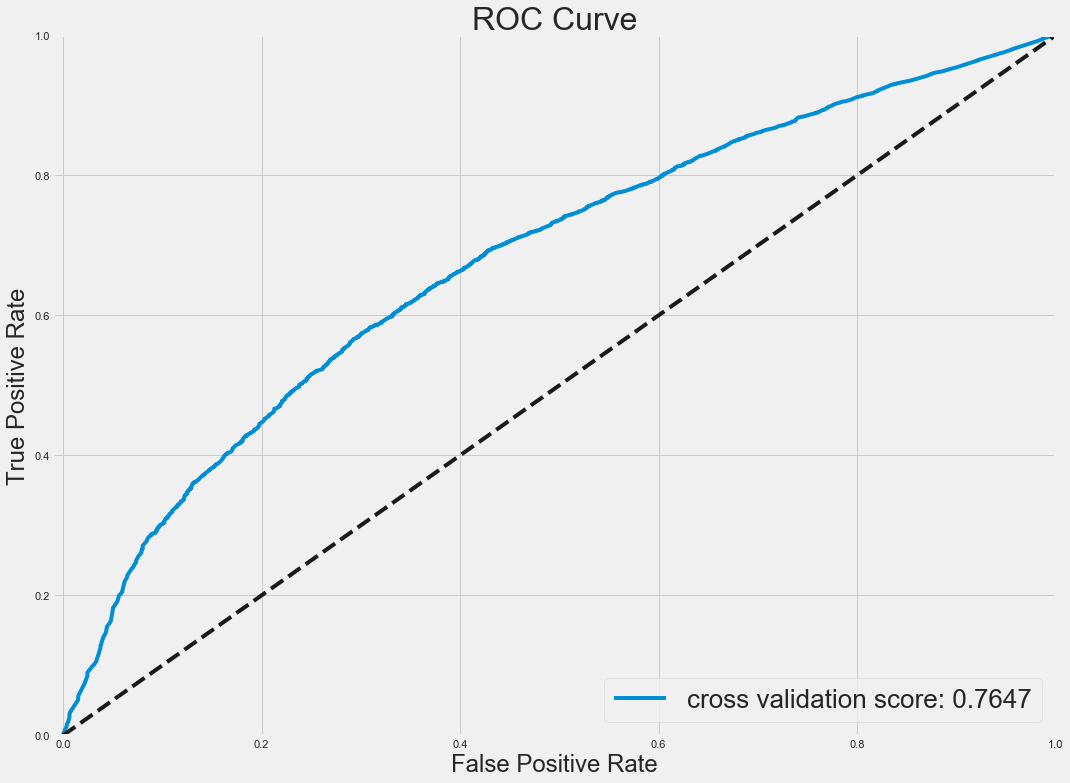

In [441]:
# %%
from sklearn.metrics import roc_curve
fpr, tpr, thresold = roc_curve(y_train, train_pred)
plt.style.use('fivethirtyeight')
def graph_roc_curve(fpr, tpr, y, predict):
    plt.figure(figsize=(16,12))
    plt.title('ROC Curve', fontsize=32)
    plt.plot(fpr, tpr, label='cross validation score: {:.4f}'.format(roc_auc_score(y, predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=24)
    plt.ylabel('True Positive Rate', fontsize=24)
    plt.legend(loc='lower right', prop={'size': 26})
graph_roc_curve(fpr, tpr, y_train, train_pred_xg)

In [442]:
# %% Lift Curve
def graph_lift_curve(y_actual, y_predict):
    df = pd.DataFrame({0:1- y_predict, 1:y_predict}).values
    from matplotlib.ticker import FuncFormatter
    import scikitplot as skplt
    ax = skplt.metrics.plot_lift_curve(y_actual, df,
                                      figsize = (16,12),
                                      title_fontsize = 36,
                                      text_fontsize = 24)
    ax.legend(['Y = 0', 'Y = 1', 'Baseline'], loc = 'upper right', fontsize=36)
    ax.xaxis.set_ticks(np.arange(0, 11, 1.0)/10)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.xaxis.label.set_size(32)
    ax.yaxis.label.set_size(32)

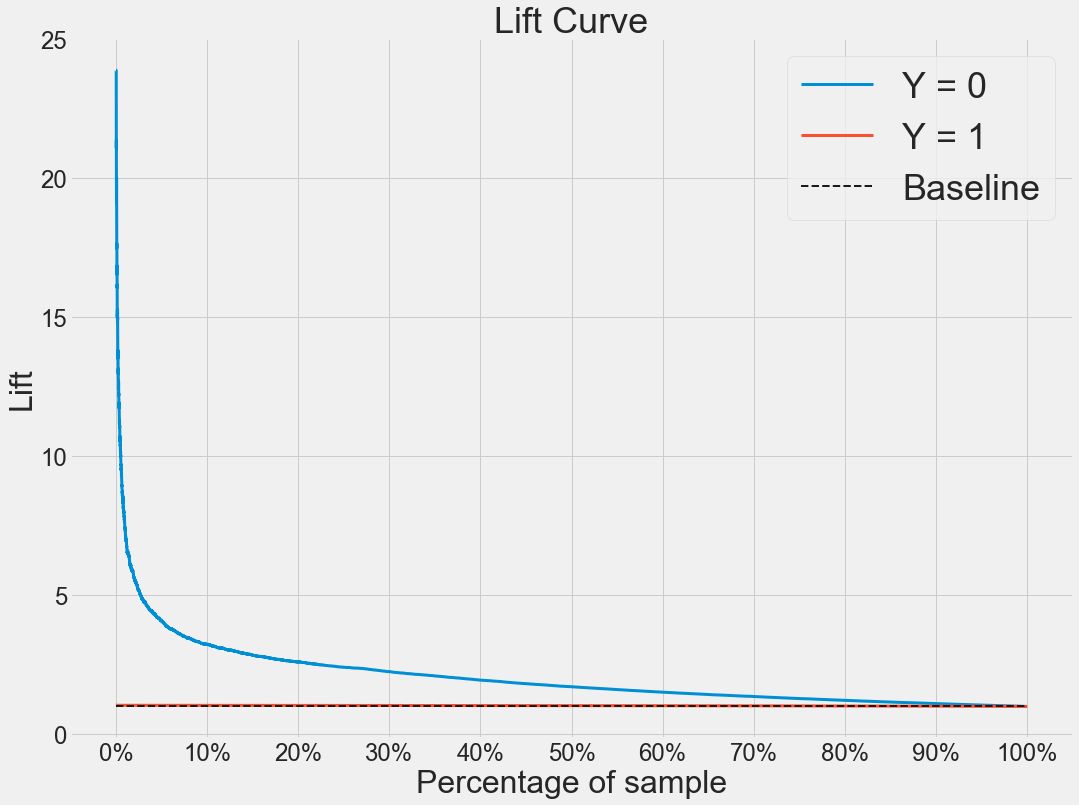

In [443]:
graph_lift_curve(y_train, train_pred_xg)

<Figure size 864x648 with 0 Axes>

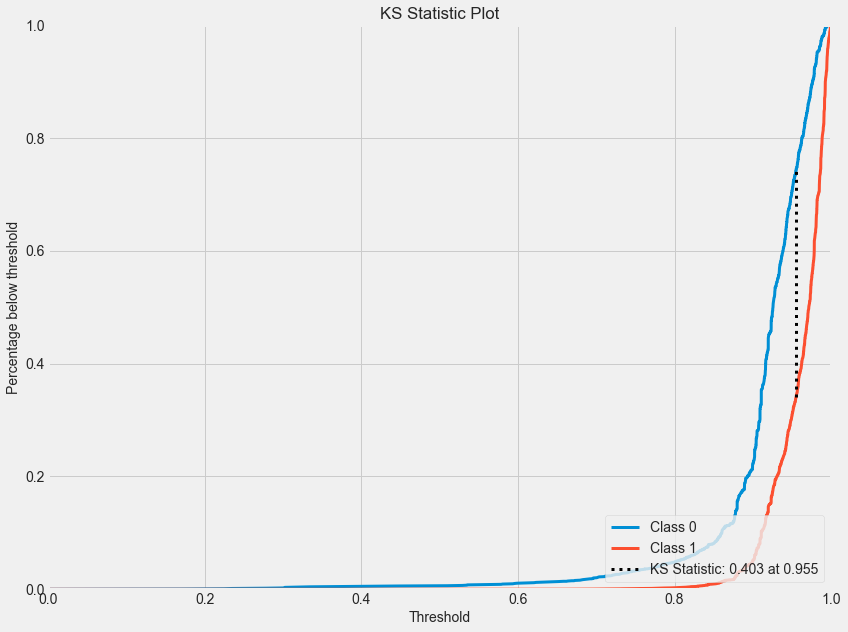

In [444]:
### K-S curve
import scikitplot as skplt
plt.figure(figsize=(12,9))
pred = xg.predict_proba(X_train[col_lr])
fig, ax = plt.subplots(figsize=(12,9), tight_layout=True)
skplt.metrics.plot_ks_statistic(y_train, pred, ax=ax)
plt.show()

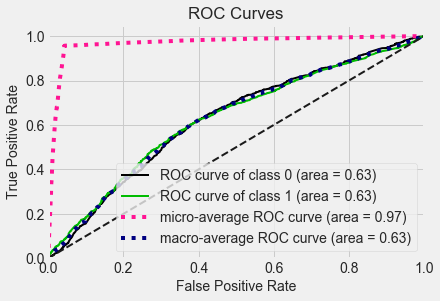

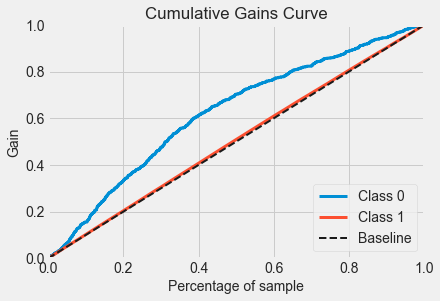

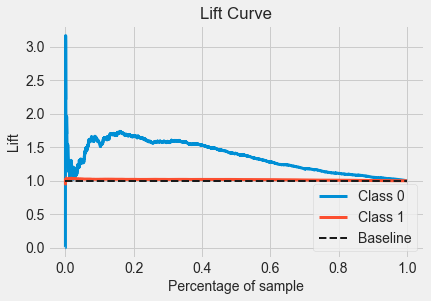

In [445]:
prc(y_test, y_pred1_prob_xg)
pcg(y_test, y_pred1_prob_xg)
plc(y_test, y_pred1_prob_xg)

In [446]:
### ScoreCard

In [447]:
def get_score(coe,woe,p):
    scores=[]
    for w in woe:
        score=round(coe*w*p,0)
        scores.append(score)
    return scores

def compute_score(series,cut,scores):
    i=0
    list=[]
    while i<len(series):
        value=series[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j=j-1
                m=m-1
        list.append(scores[m])
        i=i+1  
    return list

In [448]:
coe=[9.738849,0.638002,0.505995,1.032246,1.790041,1.131956]    
import math
p = 20 / math.log(2)     
q = 400 - 20 * math.log(20) / math.log(2)    
basescore = round(q + p * coe[0], 0)

In [449]:
#del_by_iv = []
#iv_list = {})

In [450]:
from scorecardpy import scorecard
score_card = scorecard(all_combine_bin, lr_col, col_lr)
df_bin = pd.concat(all_combine_bin)\
            .reset_index(drop=True)\
            .set_index(['variable', 'bin'])
df_score_card = pd.concat(score_card).reset_index()\
                  .set_index(['variable', 'bin'])

In [451]:
df_score_card

level_0  \
variable                                           bin                                                              
Avgas CC Utilization in last 12 months             [-inf,10.0)             Avgas CC Utilization in last 12 months   
                                                   [10.0,14.0)             Avgas CC Utilization in last 12 months   
                                                   [14.0,18.0)             Avgas CC Utilization in last 12 months   
                                                   [18.0,24.0)             Avgas CC Utilization in last 12 months   
                                                   [24.0,94.0)             Avgas CC Utilization in last 12 months   
                                                   [94.0,inf)              Avgas CC Utilization in last 12 months   
No of Inquiries in last 12 months (excluding ho... [-inf,1.0)   No of Inquiries in last 12 months (excluding h...   
                                                   [1.0,2.0)    No of Inquiries in last 12 months (excluding h...   
                                                   [2.0,4.0)    No of Inquiries in last 12 months (excluding h...   
                                                   [4.0,5.0)    No of Inquiries in last 12 months (excluding h...   
                                                   [5.0,9.0)    No of Inquiries in last 12 months (excluding h...   
                                                   [9.0,inf)    No of Inquiries in last 12 months (excluding h...   
No of months in current company                    [-inf,4.0)                     No of months in current company   
                                                   [4.0,8.0)                      No of months in current company   
                                                   [8.0,22.0)                     No of months in current company   
                                                   [22.0,38.0)                    No of months in current company   
                                                   [38.0,50.0)                    No of months in current company   
                                                   [50.0,54.0)                    No of months in current company   
                                                   [54.0,65.0)                    No of months in current company   
                                                   [65.0,inf)                     No of months in current company   
No of times 30 DPD or worse in last 12 months      [-inf,1.0)       No of times 30 DPD or worse in last 12 months   
                                                   [1.0,2.0)        No of times 30 DPD or worse in last 12 months   
                                                   [2.0,3.0)        No of times 30 DPD or worse in last 12 months   
                                                   [3.0,inf)        No of times 30 DPD or worse in last 12 months   
No of times 30 DPD or worse in last 6 months       [-inf,1.0)        No of times 30 DPD or worse in last 6 months   
                                                   [1.0,inf)         No of times 30 DPD or worse in last 6 months   
No of times 60 DPD or worse in last 12 months      [-inf,1.0)       No of times 60 DPD or worse in last 12 months   
                                                   [1.0,inf)        No of times 60 DPD or worse in last 12 months   
No of trades opened in last 12 months              [-inf,1.0)               No of trades opened in last 12 months   
                                                   [1.0,2.0)                No of trades opened in last 12 months   
                                                   [2.0,3.0)                No of trades opened in last 12 months   
                                                   [3.0,6.0)                No of trades opened in last 12 months   
                                                   [6.0,14.0)               No of trades opened in last 12 months   
           

In [452]:
from scorecardpy import scorecard_ply
import re
col_lr_ori = [re.sub('_woe$', '', col) for col in col_lr]
df_score_test = merged_df.loc[X_test.index, col_lr_ori]
df_score_test.head()

<bound method NDFrame.head of        No of times 30 DPD or worse in last 12 months  \
22720                                              0   
12908                                              0   
31185                                              0   
4562                                               0   
29792                                              0   
49570                                              1   
34056                                              0   
41337                                              0   
47019                                              0   
3138                                               0   
48972                                              0   
67293                                              3   
24011                                              0   
61665                                              2   
21912                                              0   
31612                                              0   
45779             

In [453]:
from scorecardpy import scorecard_ply
score_test = scorecard_ply(df_score_test.sort_index(), score_card)

In [460]:
len(score_test[(score_test["y"] == 0) & (score_test["y_pred"] ==0)])

372

In [454]:
score_test['y'] = y_test
score_test['y_pred'] = y_pred_lr

In [455]:
score_test.groupby('y')['score'].describe()

count        mean        std    min    25%    50%    75%    max
y                                                                   
0    901.0  380.758047  23.006165  325.0  366.0  386.0  400.0  408.0
1  20021.0  364.717597  27.119104  325.0  332.0  365.0  389.0  412.0